In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords  # Importing Natural Language Toolkit
from nltk.stem import WordNetLemmatizer

In [2]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\hVACCINATION_COMBINE.CSV',header=None,names=["created_at","text","screen_name","location"])
#np.random.seed(0)

In [3]:
df.head(20)

,created_at,text,screen_name,location
0,30-01-2022 06:34,b'#RajasthanAgainstCovidVaccineMandates we don...,b'SS_Aryaveer',b''
1,30-01-2022 06:31,"b""Over 75 pc of India's adult population fully...",b'thefirstindia',"b'Jaipur, India'"
2,30-01-2022 06:25,"b""Please get ur second dose of the #vaccinatio...",b'jdissanayaka',b'Dubai & Kandy'
3,30-01-2022 06:21,b'#PrimeMinister #NarendraModi congratulates c...,b'themojostory',b''
4,30-01-2022 06:12,b'Union health minister #MansukhMandaviya on S...,b'livemint',b'India'
5,30-01-2022 06:11,b'We\xe2\x80\x99ll never know how many people ...,b'wavetop',b'Vancouver'
6,30-01-2022 06:11,b'#Covid_19 #COVID #CovidVaccine #mandate not ...,b'StevenHarp_',b''
7,30-01-2022 06:09,"b""Esther missed out on the polio vaccine. Her ...",b'PostPolioVic',b''
8,30-01-2022 06:05,b'A person with [regular name]string of number...,b'WitchesFor',b'Texas'
9,30-01-2022 06:02,b'Prime Minister #NarendraModi congratulates t...,b'Therealtalkin',b''


In [4]:
df.shape

(5176, 4)

In [5]:

    df['text'] = df['text'].astype(str).str.replace('http\S+|www.\S+', '', case=False)  # Removing URL's from data set
df ['text']= df['text'].str.replace('RT ', '', case=False)  # Removing the phrase 'RT" from all strings
df['text'] = df['text'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
#df['text'] = df['text'].str.replace('[' 'b]','')
#df['text'] = df['text'].str.replace('[x[a-z]]','')
df ['text']= df['text'].str.replace('\r\n', ' ')  # Removing '\r\n' which is present in some strings
df['text'] = df['text'].str.replace('\d+', '').str.lower().str.strip()  # Removing numbers, capitalisation and white space


C:\Users\DELL\AppData\Local\Temp/ipykernel_13752/1243268230.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].astype(str).str.replace('http\S+|www.\S+', '', case=False)  # Removing URL's from data set
C:\Users\DELL\AppData\Local\Temp/ipykernel_13752/1243268230.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
C:\Users\DELL\AppData\Local\Temp/ipykernel_13752/1243268230.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+', '').str.lower().str.strip()  # Removing numbers, capitalisation and white space


In [6]:
df.head(10)

,created_at,text,screen_name,location
0,30-01-2022 06:34,b rajasthanagainstcovidvaccinemandates we don...,b'SS_Aryaveer',b''
1,30-01-2022 06:31,b over pc of india s adult population fully v...,b'thefirstindia',"b'Jaipur, India'"
2,30-01-2022 06:25,b please get ur second dose of the vaccinatio...,b'jdissanayaka',b'Dubai & Kandy'
3,30-01-2022 06:21,b primeminister narendramodi congratulates c...,b'themojostory',b''
4,30-01-2022 06:12,b union health minister mansukhmandaviya on s...,b'livemint',b'India'
5,30-01-2022 06:11,b we xe x xll never know how many people are d...,b'wavetop',b'Vancouver'
6,30-01-2022 06:11,b covid_ covid covidvaccine mandate not in...,b'StevenHarp_',b''
7,30-01-2022 06:09,b esther missed out on the polio vaccine her ...,b'PostPolioVic',b''
8,30-01-2022 06:05,b a person with regular name string of number...,b'WitchesFor',b'Texas'
9,30-01-2022 06:02,b prime minister narendramodi congratulates t...,b'Therealtalkin',b''


In [7]:
 nltk.download('stopwords')  # Downloading stop words
#stop = set(stopwords.words('english'))  # Selecting English stop words
#df['text'] = df['text'] .apply(lambda x: [item for item in x if item not in stop])  # Removing stop words from each string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
df.shape[0]

5176

In [9]:
lemmatizer = WordNetLemmatizer()
for i in range(df.shape[0]):
    words=nltk.word_tokenize(df['text'][i])
    words = [lemmatizer.lemmatize(w, pos='a') for w in words if w not in set(stopwords.words("english")) ]
    df['text'][i]=' '.join(words)

In [10]:
df['text'][10]

'b canadian pm family moved safe location vaccine mandate protests canada justintrudeau vaccination xe x xa'

In [11]:
df.head(10)

,created_at,text,screen_name,location
0,30-01-2022 06:34,b rajasthanagainstcovidvaccinemandates xe x xt...,b'SS_Aryaveer',b''
1,30-01-2022 06:31,b pc india adult population fully vaccinated c...,b'thefirstindia',"b'Jaipur, India'"
2,30-01-2022 06:25,b please get ur second dose vaccination get bo...,b'jdissanayaka',b'Dubai & Kandy'
3,30-01-2022 06:21,b primeminister narendramodi congratulates cit...,b'themojostory',b''
4,30-01-2022 06:12,b union health minister mansukhmandaviya satur...,b'livemint',b'India'
5,30-01-2022 06:11,b xe x xll never know many people dead rupertm...,b'wavetop',b'Vancouver'
6,30-01-2022 06:11,b covid_ covid covidvaccine mandate place obit...,b'StevenHarp_',b''
7,30-01-2022 06:09,b esther missed polio vaccine children miss co...,b'PostPolioVic',b''
8,30-01-2022 06:05,b person regular name string numbers amp zero ...,b'WitchesFor',b'Texas'
9,30-01-2022 06:02,b prime minister narendramodi congratulates ci...,b'Therealtalkin',b''


In [12]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

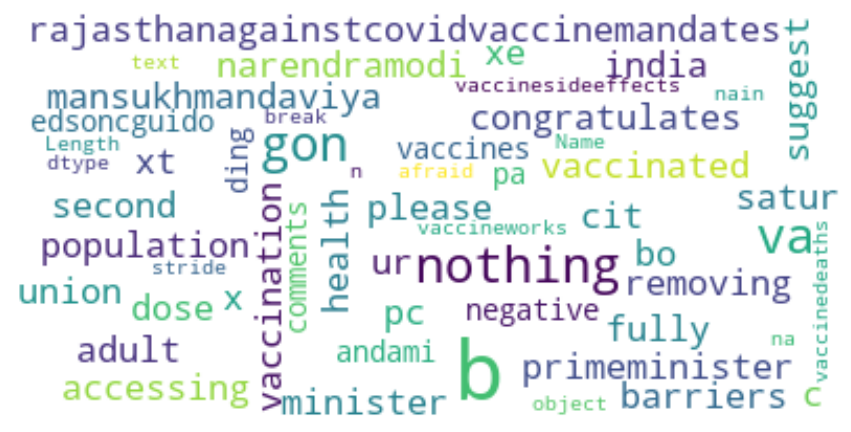

In [13]:
#wordcloud after preprocessing and removing stopwords
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df['text'])

In [14]:
df.shape

(5176, 4)

In [15]:
df.isna().sum
tweet=df.copy()

In [16]:
tweet.head()

,created_at,text,screen_name,location
0,30-01-2022 06:34,b rajasthanagainstcovidvaccinemandates xe x xt...,b'SS_Aryaveer',b''
1,30-01-2022 06:31,b pc india adult population fully vaccinated c...,b'thefirstindia',"b'Jaipur, India'"
2,30-01-2022 06:25,b please get ur second dose vaccination get bo...,b'jdissanayaka',b'Dubai & Kandy'
3,30-01-2022 06:21,b primeminister narendramodi congratulates cit...,b'themojostory',b''
4,30-01-2022 06:12,b union health minister mansukhmandaviya satur...,b'livemint',b'India'


In [17]:
tweet['sentiment'] = ' '
tweet['polarity'] = None
for i,tweets in enumerate(tweet.text) :
    blob = TextBlob(tweets)
    tweet['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet['sentiment'][i] = 'negative'
    else :
        tweet['sentiment'][i] = 'neutral'
tweet.head()

,created_at,text,screen_name,location,sentiment,polarity
0,30-01-2022 06:34,b rajasthanagainstcovidvaccinemandates xe x xt...,b'SS_Aryaveer',b'',neutral,0.0
1,30-01-2022 06:31,b pc india adult population fully vaccinated c...,b'thefirstindia',"b'Jaipur, India'",positive,0.1
2,30-01-2022 06:25,b please get ur second dose vaccination get bo...,b'jdissanayaka',b'Dubai & Kandy',neutral,0.0
3,30-01-2022 06:21,b primeminister narendramodi congratulates cit...,b'themojostory',b'',positive,0.425
4,30-01-2022 06:12,b union health minister mansukhmandaviya satur...,b'livemint',b'India',neutral,0.0


In [18]:
tweet['sentiment'].value_counts()

neutral     2769
positive    1663
negative     744
Name: sentiment, dtype: int64

In [19]:
sentiment_df = pd.DataFrame(tweet, columns=[ "text","polarity","sentiment"])

sentiment_df.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINE_COMBINE pol sent.csv")

In [20]:

sentiment_df.head(10)

,text,polarity,sentiment
0,b rajasthanagainstcovidvaccinemandates xe x xt...,0.0,neutral
1,b pc india adult population fully vaccinated c...,0.1,positive
2,b please get ur second dose vaccination get bo...,0.0,neutral
3,b primeminister narendramodi congratulates cit...,0.425,positive
4,b union health minister mansukhmandaviya satur...,0.0,neutral
5,b xe x xll never know many people dead rupertm...,0.1125,positive
6,b covid_ covid covidvaccine mandate place obit...,0.0,neutral
7,b esther missed polio vaccine children miss co...,0.0,neutral
8,b person regular name string numbers amp zero ...,0.1,positive
9,b prime minister narendramodi congratulates ci...,0.35,positive


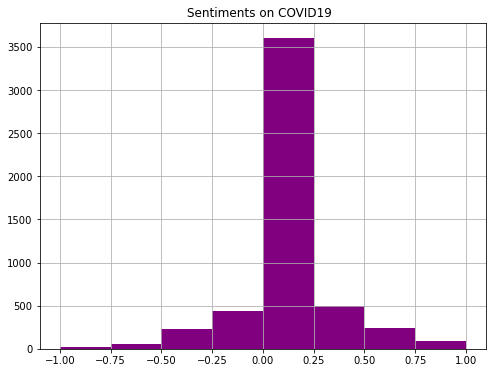

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
tweet['polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments on COVID19  ")
plt.show()

In [22]:
#feature extraction(only feature)
y=tweet['sentiment'].values
y.shape

(5176,)

In [23]:
x=tweet['text'].values
x.shape

(5176,)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
y_test.shape

(4140,)
(4140,)
(1036,)


(1036,)

neutral     2769
positive    1663
negative     744
Name: sentiment, dtype: int64


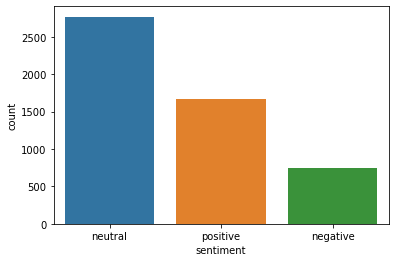

In [26]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);

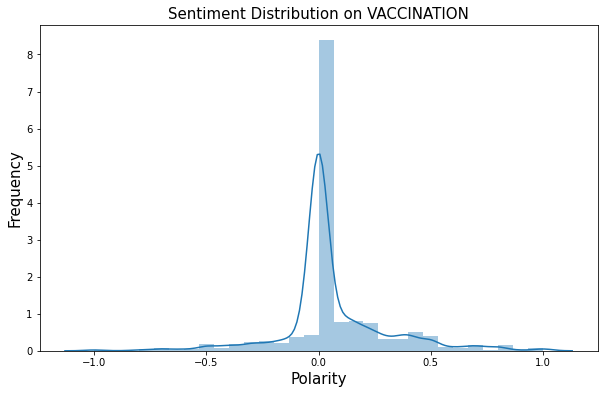

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(tweet['polarity'], bins=30)
plt.title('Sentiment Distribution on VACCINATION',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

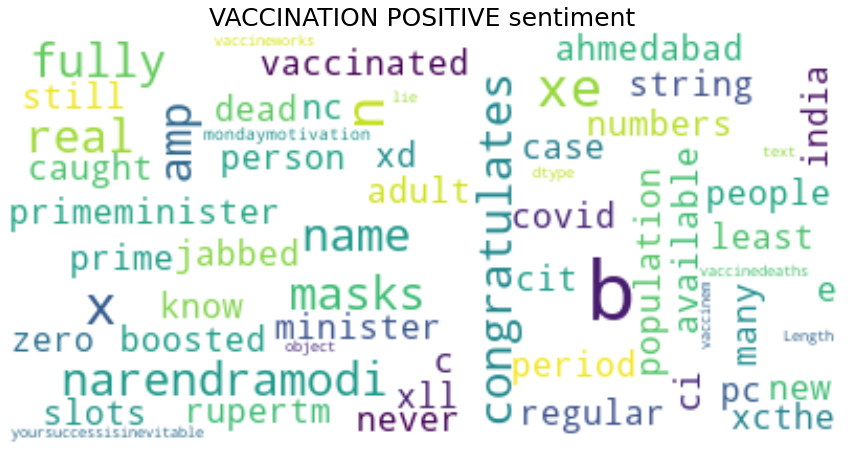

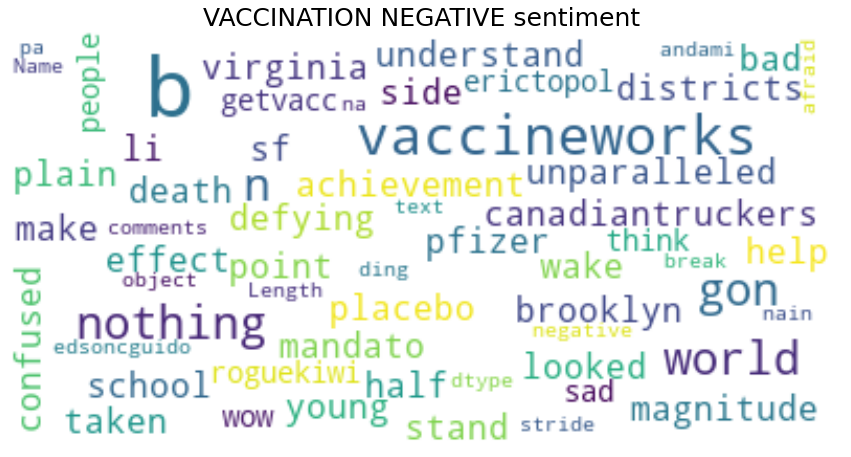

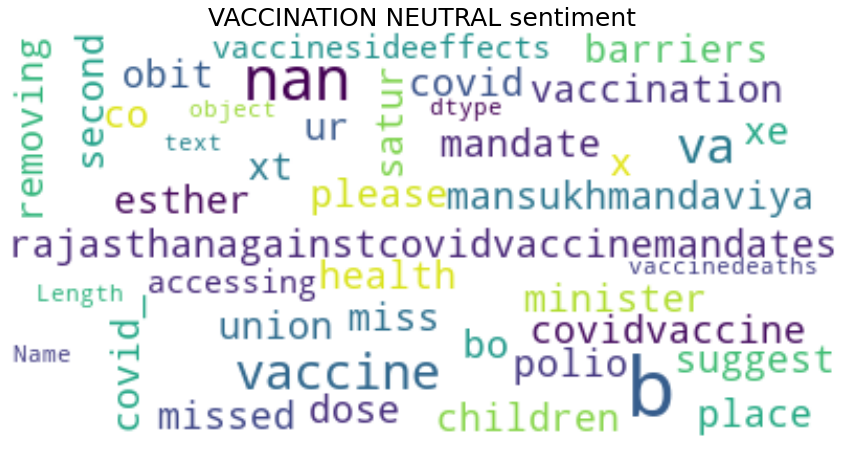

In [28]:
#wordcount with sentiment
pos = tweet['text'][tweet['sentiment'] == 'positive']
show_wordcloud(pos , 'VACCINATION POSITIVE sentiment ')

neg = tweet['text'][tweet['sentiment'] == 'negative']
show_wordcloud(neg , 'VACCINATION NEGATIVE sentiment ')

neutral = tweet['text'][tweet['sentiment'] == 'neutral']
show_wordcloud(neutral , 'VACCINATION NEUTRAL sentiment ')

In [29]:
count = pd.DataFrame(tweet.groupby('sentiment').sum())
count

,created_at,text,screen_name,location,polarity
sentiment,,,,,
negative,30-01-2022 05:5230-01-2022 05:0530-01-2022 04:...,b pfizer worlds bad placebo death side effect ...,b'PeterFr70231703'b'shanttweets'b'EyesPrizeRes...,b''b'Not on this Planet'b''b''b'Baltimore/DC '...,-192.745744
neutral,30-01-2022 06:3430-01-2022 06:2530-01-2022 06:...,b rajasthanagainstcovidvaccinemandates xe x xt...,b'SS_Aryaveer'b'jdissanayaka'b'livemint'b'Stev...,b''b'Dubai & Kandy'b'India'b''b''b'M.B. Road S...,0.000000
positive,30-01-2022 06:3130-01-2022 06:2130-01-2022 06:...,b pc india adult population fully vaccinated c...,b'thefirstindia'b'themojostory'b'wavetop'b'Wit...,"b'Jaipur, India'b''b'Vancouver'b'Texas'b''b'Ca...",496.853551


In [30]:
words = []
words = [word for i in tweet.text for word in i.split()]

In [31]:
words

['b',
 'rajasthanagainstcovidvaccinemandates',
 'xe',
 'x',
 'xt',
 'want',
 'mandatoryvaccination',
 'vaccinemandate',
 'vaccination',
 'b',
 'pc',
 'india',
 'adult',
 'population',
 'fully',
 'vaccinated',
 'covid',
 'n',
 'n',
 'b',
 'please',
 'get',
 'ur',
 'second',
 'dose',
 'vaccination',
 'get',
 'booster',
 'u',
 'hv',
 'passed',
 'month',
 'since',
 'nd',
 'jab',
 'xe',
 'x',
 'xa',
 'b',
 'primeminister',
 'narendramodi',
 'congratulates',
 'citizens',
 'successful',
 'vaccination',
 'adult',
 'population',
 'xe',
 'x',
 'xa',
 'b',
 'union',
 'health',
 'minister',
 'mansukhmandaviya',
 'saturday',
 'held',
 'discussion',
 'regarding',
 'promotion',
 'telemedicine',
 'xe',
 'x',
 'xa',
 'b',
 'xe',
 'x',
 'xll',
 'never',
 'know',
 'many',
 'people',
 'dead',
 'rupertmurdoch',
 'xe',
 'x',
 'xs',
 'anti',
 'vax',
 'propaganda',
 'first',
 'line',
 'fo',
 'xe',
 'x',
 'xa',
 'b',
 'covid_',
 'covid',
 'covidvaccine',
 'mandate',
 'place',
 'obituaryoftheday',
 'pandemic',


In [32]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head(20)

,word,frequency
0,x,8449
1,xe,6294
2,xa,5236
3,b,5185
4,xf,3887
5,n,3133
6,vaccination,2345
7,covid,1961
8,xd,937
9,vaccine,753


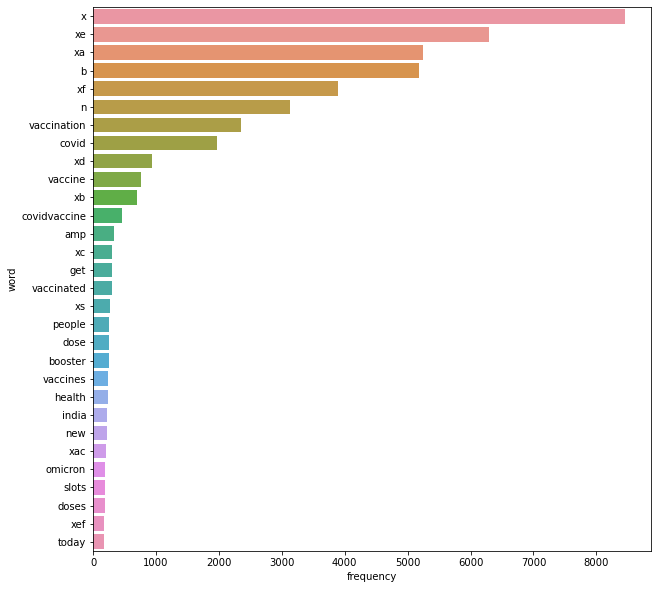

In [33]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);

In [34]:
tweet.to_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_Final_sent_analysis.csv',index=False)

In [35]:
sentiment_df.head()

,text,polarity,sentiment
0,b rajasthanagainstcovidvaccinemandates xe x xt...,0.0,neutral
1,b pc india adult population fully vaccinated c...,0.1,positive
2,b please get ur second dose vaccination get bo...,0.0,neutral
3,b primeminister narendramodi congratulates cit...,0.425,positive
4,b union health minister mansukhmandaviya satur...,0.0,neutral


In [36]:
sentiment_df.describe()

,text,polarity,sentiment
count,5176,5176.0,5176
unique,4572,401.0,3
top,nan,0.0,neutral
freq,29,2769.0,2769


In [37]:
sentiment_df.groupby('sentiment').size()

sentiment
negative     744
neutral     2769
positive    1663
dtype: int64

In [38]:
print(sentiment_df.groupby('polarity').size())

polarity
-1.000    12
-0.900     1
-0.800     5
-0.800     5
-0.750     3
          ..
 0.775     1
 0.800    48
 0.850     2
 0.900     7
 1.000    27
Length: 401, dtype: int64


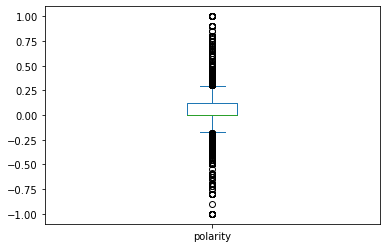

In [39]:
import matplotlib.pyplot as plt
sentiment_df.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()

In [40]:
clo=['sentiment','polarity','text']
dataset2=sentiment_df.reindex(columns=clo)
#dataset2.head()
dataset2[:10]

,sentiment,polarity,text
0,neutral,0.0,b rajasthanagainstcovidvaccinemandates xe x xt...
1,positive,0.1,b pc india adult population fully vaccinated c...
2,neutral,0.0,b please get ur second dose vaccination get bo...
3,positive,0.425,b primeminister narendramodi congratulates cit...
4,neutral,0.0,b union health minister mansukhmandaviya satur...
5,positive,0.1125,b xe x xll never know many people dead rupertm...
6,neutral,0.0,b covid_ covid covidvaccine mandate place obit...
7,neutral,0.0,b esther missed polio vaccine children miss co...
8,positive,0.1,b person regular name string numbers amp zero ...
9,positive,0.35,b prime minister narendramodi congratulates ci...


In [41]:
dataset2.describe()#dataset2.hist()
#plt.show()

,sentiment,polarity,text
count,5176,5176.0,5176
unique,3,401.0,4572
top,neutral,0.0,nan
freq,2769,2769.0,29


In [42]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'text'})

In [43]:
df1.head()

,text
0,b call delay compulsory covid vaccines nhs sta...
1,b pure evil ishere satan g vaccination vaccinatie
2,b annoying hopefully jabs make mild xe x xm th...
3,b xf xf x xbfalse prophet pope francis declare...
4,b covid vaccines fertility need know tarahaell...


In [44]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [45]:
df_train.head()

,text,sentiment
0,b call delay compulsory covid vaccines nhs sta...,neutral
1,b pure evil ishere satan g vaccination vaccinatie,negative
2,b annoying hopefully jabs make mild xe x xm th...,negative
3,b xf xf x xbfalse prophet pope francis declare...,positive
4,b covid vaccines fertility need know tarahaell...,neutral


In [46]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'text'})

In [47]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [48]:
df_test.head()

,text,sentiment
0,b like vaccines n anonymous wakeup truth realn...,neutral
1,b data show n increasedrisk myocarditis vaccin...,negative
2,b gronk usaa ads punishment country xe x xs lo...,negative
3,b short agree cigarette prices going every yea...,positive
4,b anti covid vaccination migrant land workers ...,neutral


In [49]:
import string
string.punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [50]:
#storing the puntuation free text in a new column called clean_msg
df_train['text']= df_train['text'].apply(lambda x:remove_punctuation(x))
df_test['text']= df_test['text'].apply(lambda x:remove_punctuation(x))

In [51]:
df_train.head()
#punctuations are removed from news column in train dataset

,text,sentiment
0,b call delay compulsory covid vaccines nhs sta...,neutral
1,b pure evil ishere satan g vaccination vaccinatie,negative
2,b annoying hopefully jabs make mild xe x xm th...,negative
3,b xf xf x xbfalse prophet pope francis declare...,positive
4,b covid vaccines fertility need know tarahaell...,neutral


In [52]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [54]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [55]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xbfalse', 'prophet', 'pope', 'francis', 'declares', 'covid', 'vaccines', 'morally', 'acceptable', 'necessary', 'great', 'good', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'trucking', 'troubles', 'nothing', 'new', 'fresh', 'produce', 'industry', 'recent', 'vaccination', 'mandates', 'gov', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'craigkellymp', 'moved', 'consensus', 'covid', 'vaccination', 'reduces', 'chances', 'becoming', 'severel', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dabawenyos', 'warned', 'particularly', 'cautious', 'face', 'covid', 'increase', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'qatar', 'contribute', 'p', 'million', 'worth', 'vaccines', 'philippines', 'n', 'n']
Sentence after removing stopwords: ['b', 'eu', 'turns', 'contracts', 'accessible', 'us', 'eu', 'experimenting', 'using', 'text', 'messages', 'smileys', 'xe', 'x', 'xa']
Sentence after r

Sentence after removing stopwords: ['b', 'make', 'use', 'free', 'vaccination', 'facility', 'okhla', 'n', 'n', 'hsfindia', 'azadsubhani', 'followcii']
Sentence after removing stopwords: ['b', 'high', 'vaccination', 'rates', 'seeing', 'level', 'hospitalization', 'icu', 'admissions', 'deaths', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'newyork', 'covid', 'update', 'positivity', 'going', 'certain', 'vaccination', 'facemasks', 'following', 'protocol', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'course', 'media', 'amp', 'spotifyusa', 'spotify', 'xe', 'x', 'xt', 'give', 'background', 'neilyoung', 'adamant', 'citizens', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'addressing', 'nation', 'eve', 'rd', 'republicday', 'president', 'ramnathkovind', 'said', 'india', 'good', 'placed', 'mee', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'free', 'covid', 'vaccines', 'today', 'san', 'marcos', 'xe', 'x', 'xt', 'wait', 'see', 'xf', 'xf', 'x', 'x', 

Sentence after removing stopwords: ['b', 'proud', 'suppoand', 'recognized', 'arlingtonva', 'covid', 'outreach', 'work', 'n', 'nhope', 'arlington', 'lead', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'getting', 'vaccinated', 'covid', 'significantly', 'reduces', 'risk', 'getting', 'virus', 'importantly', 'preven', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pre', 'print', 'findings', 'paof', 'long', 'thread', 'interesting', 'n', 'n', 'covid', 'omicron', 'vaccination']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'never', 'late', 'get', 'covid', 'vaccination', 'number', 'clinics', 'ready', 'waiting', 'oldham', 'prov', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ruttodibosco', 'sylvie', 'live', 'bruxelles', 'vaccination', 'plandemic', 'nwo', 'billgates', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'denisedewald', 'herd', 'immunity', 'achieved', 'xe', 'x', 'xcnatural', 'xe', 'x', 'xd', 'infection', 'declared', 'great', '

Sentence after removing stopwords: ['b', 'jonimitchell', 'xc', 'xais', 'joining', 'neil', 'young', 'xc', 'xain', 'music', 'catalog', 'pulled', 'xc', 'xa', 'spotify', 'xc', 'xaover', 'concerns', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'governments', 'really', 'plus', 'never', 'trust', 'governments', 'amp', 'cooperation', 'illuminati', 'nnow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'meantloaf', 'die', 'covid', 'lack', 'vaccination', 'many', 'tried', 'say', 'nwatch', 'meat', 'loaf', 'last', 'video', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sincere', 'thanks', 'organising', 'team', 'covid', 'vaccination', 'camp', 'held', 'educrafter', 'institute', 'b', 'block', 'ashok', 'nagar', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'know', 'xe', 'x', 'xcoriginal', 'antigenic', 'sin', 'xe', 'x', 'xd', 'occurs', 'first', 'immune', 'response', 'pathogen', 'followed', 'red', 'xe', 'x', 'xa']
Sentence after removing stopwords

Sentence after removing stopwords: ['b', 'another', 'video', 'large', 'protest', 'vaccine', 'passports', 'central', 'stockholm', 'capital', 'sweden', 'n', 'n', 'protest', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'normal', 'pain', 'biontech', 'vaccination', 'expands', 'arm', 'armpit', 'towards', 'chest', 'xf', 'xf', 'x', 'xf']
Sentence after removing stopwords: ['b', 'large', 'scale', 'vaccination', 'covishield', 'containment', 'covid', 'infection', 'testimony', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'around', 'fauci', 'told', 'us', 'xe', 'x', 'xccrisis', 'unvaccinated', 'xe', 'x', 'xd', 'new', 'cases', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'helpful', 'ways', 'help', 'calm', 'child', 'fear', 'vaccination', 'get', 'child', 'vaccinated', 'today', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'questions', 'testing', 'vaccination', 'asked', 'expert', 'becky', 'fox', 'founder', 'vital', 'circle', 'vaccination', 'xe', 'x

Sentence after removing stopwords: ['b', 'good', 'morning', 'xf', 'xf', 'xc', 'xa', 'eu', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'x', 'xba', 'germany', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xaa', 'nice', 'day', 'forget', 'war', 'covid', 'act', 'accordingly', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'zealand', 'pm', 'jacindaardern', 'shrugs', 'car', 'chase', 'anti', 'vaccination', 'protesters', 'n', 'n', 'xe', 'x', 'xcat', 'point', 'worried', 'ab', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'morning', 'nplease', 'click', 'link', 'hselive', 'date', 'clinic', 'details', 'covid', 'vaccines', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'radiology', 'cardiology', 'pediatric', 'covidvaccine', 'n', 'n', 'previously', 'healthy', 'year', 'old', 'experienced', 'chest', 'pain', 'days', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pity', 'vaccination', 'coverage', 'russia', 'despite', 'sputnikv', 'covivac', 'freely', 'avai',

Sentence after removing stopwords: ['b', 'see', 'great', 'achievement', 'mass', 'vaccination', 'covid', 'national', 'socialism', 'regime']
Sentence after removing stopwords: ['b', 'got', 'boosted', 'mvc', 'f', 'time', 'kudos', 'team', 'dhoislamabad', 'managing', 'best', 'vaccination', 'centre', 'islamaba', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'achieved', 'target', 'adult', 'population', 'administered', 'doses', 'vaccine', 'health', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dangerangel', 'exactly', 'choose', 'whether', 'get', 'vaccinated', 'single', 'place', 'world', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'think', 'businesses', 'follow', 'conscious', 'covid', 'vaccination']
Sentence after removing stopwords: ['b', 'desantis', 'surgeongeneral', 'pick', 'stumbles', 'evasions', 'instead', 'straight', 'answers', 'via', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cdcgov', 'cdcmmwr', 'impact', 'full', 'vaccinatio

Sentence after removing stopwords: ['b', 'person', 'regular', 'name', 'string', 'numbers', 'amp', 'zero', 'followers', 'pushing', 'narrative', 'know', 'much', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'prosociality', 'positively', 'predicts', 'covid', 'vaccination', 'intentions', 'belief', 'conspiracytheories', 'religiosity', 'ar', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hamilton', 'main', 'dr', 'nora', 'dagher', 'urges', 'get', 'child', 'vaccinated', 'today', 'call', 'schedule', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'massive', 'thanks', 'covid', 'vaccination', 'team', 'bridge', 'clinic', 'vaccinated', 'year', 'old', 'son', 'morn', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'justintrudeau', 'yup', 'justin', 'real', 'results', 'costs', 'canadians', 'priority', 'inflation', 'caused', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sometime', 'feel', 'covid', 'become', 'good', 'weapon', 'control', 'movem

Sentence after removing stopwords: ['b', 'keheliya', 'grateful', 'efforts', 'towards', 'successful', 'vaccination', 'drive', 'n', 'n', 'lka', 'srilanka', 'covidsl', 'covidlk', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'brilliant', 'people', 'hopkins', 'put', 'together', 'free', 'coursera', 'course', 'talk', 'parents', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'one', 'successful', 'public', 'health', 'measures', 'modern', 'times', 'preventing', 'three', 'million', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thank', 'chennaicorp', 'door', 'step', 'vaccination', 'service', 'sply', 'sr', 'citizens', 'booster', 'huge', 'apprec', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'australia', 'wants', 'kanye', 'west', 'fully', 'vaccinated', 'concetour', 'n', 'nhip', 'hop', 'artist', 'kanye', 'west', 'ful', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'updated', 'new', 'cdc', 'guidance', 'shing

Sentence after removing stopwords: ['b', 'read', 'carefully', 'tell', 'injection', 'saves', 'lives', 'b', 'xe', 'x', 'xs', 'safe', 'effective', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'position', 'taken', 'business', 'org', 'likely', 'based', 'disproportionate', 'economic', 'cost', 'incurred', 'versus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xt', 'trust', 'someone', 'wants', 'reduce', 'population', 'things', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'nhealthcare', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'nreproductive', 'health', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'live', 'ny', 'child', 'still', 'needs', 'covidvaccine', 'xe', 'x', 'xs', 'good', 'resource', 'find', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nhs', 'staff', 'protest', 'mandatory', 'covid', 'vaccination', 'plans', 'government', 'really', 'afford', 'lose', 'thousands', 'healthca', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yes',

Sentence after removing stopwords: ['b', 'budget', 'industry', 'top', 'voices', 'mirror', 'n', 'nthe', 'increased', 'budget', 'allocation', 'played', 'great', 'role', 'india', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'significant', 'uptick', 'covid', 'cehelpline', 'calls', 'n', 'n', 'hselive', 'covidireland', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'surprised', 'sheepish', 'people', 'dc', 'become', 'requiring', 'vaccination', 'card', 'jist', 'enter', 'store', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gop', 'obstructs', 'potus', 'covid', 'plans', 'blames', 'biden', 'xe', 'x', 'xcfailure', 'xe', 'x', 'xd', 'rich', 'xf', 'xf', 'xa', 'xa', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'n', 'n', 'covid', 'death', 'rates', 'hospitali', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'last', 'saturday', 'vida', 'senior', 'centers', 'held', 'yet', 'another', 'vaccination', 'event', 'adults', 'children', 'able', 'get', 'xe', 'x

Sentence after removing stopwords: ['b', 'general', 'article', 'sciencemagazine', 'yalesph', 'paper', 'low', 'transmission', 'covidvaccine', 'n']
Sentence after removing stopwords: ['b', 'drive', 'walk', 'available', 'kai', 'medical', 'laboratory', 'offering', 'covid', 'vaccination', 'booster', 'pro', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'absolute', 'madness', 'jonimitchell', 'neilyoung', 'leaving', 'spotify', 'kidrock', 'going', 'opposite', 'direction', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'free', 'hour', 'presentation', 'communication', 'skills', 'training', 'caregivers', 'discussing', 'covid', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'anandmarket', 'bozo', 'sarahpalinusa', 'dined', 'several', 'nyc', 'restaurants', 'positive', 'covid', 'going', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'think', 'xe', 'x', 'xs', 'fair', 'insurance', 'companies', 'started', 'charging', 'high', 'premiums', 'people'

Sentence after removing stopwords: ['b', 'achieve', 'super', 'immunity', 'xe', 'x', 'xt', 'matter', 'whether', 'covidvaccine', 'comes', 'infection', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mobile', 'vax', 'drive', 'set', 'pitx', 'via', 'philstar', 'n', 'nread', 'full', 'story', 'michael', 'varcas', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'large', 'pharmaceutical', 'companies', 'need', 'present', 'need', 'speed', 'transfer', 'technology', 'ensur', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covidvaccine', 'drugs', 'controller', 'general', 'india', 'dcgi', 'given', 'approval', 'bharatbiotech', 'trials', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'despite', 'record', 'number', 'new', 'cases', 'per', 'day', 'nl', 'opening', 'number', 'deaths', 'last', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yes', 'omicron', 'loosening', 'hold', 'pandemic', 'ended', 'spotty', 'immunity', 'churn', 'new', 'varia', 'xe',

Sentence after removing stopwords: ['b', 'xe', 'x', 'xt', 'analyzed', 'covid', 'vaccination', 'data', 'cdcgov', 'cdcdirector', 'though', 'analyzed', 'huge', 'official', 'da', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xc', 'xe', 'x', 'xa', 'always', 'worth', 'xe', 'x', 'xd', 'nyep', 'xe', 'x', 'xd', 'agree', 'n', 'saturdaymotivation', 'n', 'thinkbigsundaywithmarsha', 'n', 'wisdom', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'manhattan', 'beach', 'usd', 'pacific', 'elementary', 'school', 'holds', 'covid', 'testing', 'clinic', 'every', 'wed', 'mbusdnews', 'sup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'watch', 'senator', 'ron', 'johnson', 'live', 'stream', 'ncovid', 'second', 'opinion', 'n', 'covid', 'ronjohnson', 'doctors', 'vaccination', 'n']
Sentence after removing stopwords: ['b', 'colorado', 'drops', 'vaccine', 'requirement', 'large', 'indoor', 'gatherings', 'never', 'happened', 'first', 'place', 'xe', 'x', 'xa']
Sentence a

Sentence after removing stopwords: ['b', 'greenswelfares', 'gurmeetramrahim', 'great', 'humanity', 'work', 'covidvaccine']
Sentence after removing stopwords: ['b', 'yveerangnayen', 'nitiaayog', 'one', 'best', 'solution', 'vaccination', 'protect', 'corona', 'omicron', 'n', 'getvaccinated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kids', 'group', 'get', 'first', 'dose', 'vaccine', 'first', 'days', 'n', 'n', 'newcov', 'covid', 'largestvaccinationdrive']
Sentence after removing stopwords: ['b', 'let', 'xe', 'x', 'xs', 'make', 'clear', 'vaccinated', 'xe', 'x', 'xt', 'prevent', 'virus', 'xe', 'x', 'x', 'transmission', 'hence', 'unvaccinated', 'status', 'affec', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'duh', 'n', 'naturalimmunity', 'six', 'times', 'strong', 'vaccination']
Sentence after removing stopwords: ['b', 'bombshell', 'cdc', 'admits', 'natural', 'immunity', 'superior', 'vaccinated', 'immunity', 'alone', 'preventing', 'covid', 'hospitalizations', 'amp

Sentence after removing stopwords: ['b', 'covidvaccine', 'helping', 'protect', 'year', 'olds', 'family', 'friends', 'may', 'experience', 'mild', 'side', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'prime', 'minister', 'narendramodi', 'congratulates', 'citizens', 'full', 'vaccination', 'adults', 'country', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'let', 'us', 'responsible', 'get', 'vaccinated', 'stay', 'safe', 'n', 'nfor', 'slot', 'booking', 'call', 'find', 'apollo', 'clinic', 'zoo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'imho', 'elio', 'restaurant', 'nyc', 'needs', 'fined', 'permitting', 'palin', 'tested', 'positive', 'dine', 'two', 'nights', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'albertbourla', 'sees', 'annual', 'covid', 'vaccine', 'rather', 'frequent', 'boosters', 'n', 'n', 'healthnewsnextme', 'globalhealth', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bangladesh', 'top', 'recipient', 'vaccines', 'c

Sentence after removing stopwords: ['b', 'imagine', 'amazing', 'things', 'might', 'xe', 'x', 'xaif', 'allow', 'n', 'n', 'saturdaymotivation', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'worldwide', 'covid', 'vaccination', 'doses', 'rate', 'usa', 'new', 'york', 'times', 'saying', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'much', 'vaccines', 'xf', 'xf', 'xa', 'xa', 'xf', 'xf', 'xf', 'xbb', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xa', 'xa', 'justforlaugh', 'cheeruppeople', 'vaccination']
Sentence after removing stopwords: ['b', 'techno', 'group', 'happy', 'share', 'coming', 'new', 'venture', 'apolloclinic', 'hazratganj', 'lucknow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccination', 'certificate', 'n', 'nleft', 'usa', 'handwritten', 'card', 'nright', 'india', 'digital', 'pdf', 'unique', 'qr', 'code', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'be

Sentence after removing stopwords: ['b', 'myelomauk', 'many', 'covid', 'vaccinations', 'people', 'myeloma', 'stem', 'cell', 'transplant', 'first', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'around', 'fauci', 'told', 'us', 'crisis', 'unvaccinated', 'new', 'cases', 'ful', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccination', 'walk', 'clinics', 'open', 'get', 'first', 'second', 'booster', 'vaccine', 'need', 'book', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'say', 'covid', 'vaccination', 'mandates', 'time', 'sensitive', 'settings', 'like', 'construction', 'make', 'importa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'proud', 'moment', 'university', 'bath', 'achieve', 'new', 'accreditation', 'natural', 'sciences', 'courses', 'click', 'bel', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mkolken', 'spotify', 'emmet', 'otter', 'jug', 'band', 'new', 'covidvaccine', 'variant']
Sentence after removing stopword

Sentence after removing stopwords: ['b', 'vast', 'majority', 'people', 'exactly', 'asked', 'says', 'adriandix', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'umojahealth', 'love', 'action', 'communityunity', 'communitycare', 'testing', 'vaccination', 'boostershot', 'info', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'trucker', 'convoy', 'news', 'live', 'musk', 'trump', 'jr', 'back', 'vaccine', 'passpoprotest', 'heading', 'ottawa', 'canada', 'n', 'truckers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'read', 'acting', 'presidential', 'spokesperson', 'karlo', 'nograles', 'reiterates', 'clear', 'confidence', 'covid', 'booster', 'sh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'clinical', 'trials', 'great', 'xf', 'xf', 'x', 'xd', 'options', 'clinicaltrials', 'clinicaltrial', 'research', 'clinicalresearch', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'q', 'pregnant', 'women', 'get', 'covidvaccine', 'first', 'tri

Sentence after removing stopwords: ['b', 'help', 'randpaul', 'see', 'xf', 'xf', 'x', 'xnatural', 'immunity', 'x', 'strong', 'vaccine', 'sister', 'nurse', 'fir', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'great', 'analogy', 'excellent', 'explanation', 'thank', 'n', 'vaccination', 'covidisairborne', 'n', 'urgencyofnormal', 'urgencyofequity', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nhsenglandldn', 'get', 'rid', 'non', 'vaccinated', 'staff', 'want', 'member', 'family', 'risking', 'catching', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccination', 'going', 'teenagers', 'yrs', 'old', 'youths', 'hurry', 'guys', 'hero', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'far', 'good', 'lessons', 'coronavirus', 'pandemic', 'n', 'n', 'coronavirus', 'coronavirusupdates', 'vaccination']
Sentence after removing stopwords: ['b', 'rare', 'complication', 'anti', 'sarscov', 'vaccination', 'septic', 'arthritis', 'sternoclavicular',

Sentence after removing stopwords: ['b', 'neilyoung', 'joerogan', 'old', 'man', 'meme', 'know', 'coming', 'bothered', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'know', 'whole', 'cell', 'pertussis', 'vaccine', 'failed', 'give', 'full', 'protection', 'disease', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'drzax', 'wow', 'maybe', 'xe', 'x', 'xscientists', 'xe', 'x', 'x', 'actually', 'know', 'trust', 'regarding', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ridiculous', 'experienced', 'impacts', 'covid', 'within', 'florida', 'department', 'health', 'various', 'counties', 'en', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cabinet', 'division', 'announced', 'set', 'restrictions', 'curb', 'spread', 'covid', 'effective', 'january', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'close', 'organizations', 'received', 'funding', 'evidence', 'based', 'culturally', 'relevant', 'projects', 'support', 'xe', 'x', 'xa']
Sentence after

Sentence after removing stopwords: ['b', 'good', 'discussion', 'topic', 'including', 'vaccination', 'violence']
Sentence after removing stopwords: ['b', 'picture', 'worth', 'thousand', 'words', 'hang', 'everyone', 'heading', 'right', 'direction', 'get', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccination', 'india', 'eligible', 'population', 'given', 'first', 'dose', 'coronavirus', 'vaccine', 'says', 'health', 'mini', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fantastic', 'see', 'newly', 'published', 'paper', 'tcells', 'proven', 'respond', 'omicron', 'infection', 'amp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covidvaccine', 'yet', 'n', 'nif', 'xe', 'x', 'xt', 'received', 'first', 'second', 'booster', 'dose', 'offering', 'wa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'interesting', 'move', 'today', 'sajidjavid', 'suggests', 'national', 'vaccination', 'service', 'required', 'long', 'term', 'plan', 'xe

Sentence after removing stopwords: ['b', 'janoschdahmen', 'timroehn', 'genetic', 'distinction', 'omicron', 'primarily', 'arose', 'selective', 'pressures', 'spike', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'happy', 'first', 'vaccination', 'anniversary', 'shout', 'astrazeneca', 'generation', 'xf', 'xf', 'xa', 'xb']
Sentence after removing stopwords: ['b', 'vaccines', 'work', 'chaos', 'around', 'us', 'seems', 'like', 'perfect', 'time', 'revisit', 'wonderful', 'artic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccinate', 'remain', 'safe', 'covid', 'please', 'find', 'list', 'vaccination', 'centres', 'today', 'th', 'january', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dammit', 'dang', 'like', 'friends', 'covid', 'right', 'covid', 'omicron', 'getvaccinatednow', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'findings', 'two', 'new', 'studies', 'us', 'norway', 'reassuring', 'changes', 'menstrual', 'cycle', 'occur

Sentence after removing stopwords: ['b', 'first', 'dose', 'vaccination', 'coverage', 'second', 'dose', 'coverage', 'country', 'far', 'lakh', 'eligible', 'popula', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'voilame', 'video', 'tiktok', 'n', 'ndon', 'xe', 'x', 'xt', 'surprised', 'happens', 'ur', 'vaccinated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'greenswelfares', 'gurmeetramrahim', 'corona', 'vaccination', 'camp', 'organised', 'dss', 'volunteers', 'hisar', 'great', 'task']
Sentence after removing stopwords: ['b', 'go', 'doctor', 'visit', 'absolutely', 'nothing', 'covid', 'asked', 'repeatedly', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'current', 'covid', 'vaccination', 'rate', 'available', 'nflalumnihealth', 'website', 'info']
Sentence after removing stopwords: ['b', 'care', 'worker', 'refused', 'vaccination', 'various', 'reasons', 'prior', 'new', 'legislation', 'nov', 'dismissed', 'f', 'xe', 'x', 'xa']
Sentence after removing

Sentence after removing stopwords: ['b', 'union', 'health', 'ministry', 'informed', 'percent', 'india', 'adult', 'population', 'given', 'first', 'dose', 'covidvaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'stopthemandate', 'tell', 'us', 'safe', 'vaccination']
Sentence after removing stopwords: ['b', 'good', 'morning', 'berlin', 'way', 'shift', 'vaccination', 'center', 'icc', 'funkturm', 'messeberlin', 'charlo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xamen', 'regional', 'league', 'fezile', 'dabi', 'xf', 'xf', 'xa', 'xa', 'n', 'n', 'xf', 'xf', 'x', 'xa', 'xef', 'xb', 'xfnica', 'boys', 'v', 'young', 'chiefs', 'viljoenskroon', 'n', 'xf', 'xf', 'x', 'x', 'december', 'n', 'xf', 'xf', 'xf', 'xfroma', 'ground', 'n', 'xe', 'xf', 'xb', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'remember', 'poliomyelitis', 'polio', 'short', 'n', 'na', 'nephew', 'mine', 'one', 'last', 'victims', 'region', 'early', 'xe', 'x', 'xa']
Sentence

Sentence after removing stopwords: ['b', 'sc', 'decision', 'striking', 'suspension', 'bjp', 'mlas', 'historic', 'fadnavis', 'covidvaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'policies', 'strong', 'high', 'income', 'countries', 'whereas', 'low', 'income', 'countries', 'weak', 'amp', 'limited', 'poli', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xcthe', 'government', 'certainly', 'oblivion', 'terms', 'early', 'treatment', 'xe', 'x', 'xd', 'mccullough', 'said', 'n', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'undated', 'repoby', 'correctional', 'association', 'new', 'york', 'cany', 'n', 'n', 'decarcerat', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'cases', 'spiking', 'countries', 'high', 'vaccination', 'rate', 'vaccine', 'vaccination', 'vaccinesideeffects']
Sentence after removing stopwords: ['b', 'cuddlefish', 'cdcgov', 'measures', 'general', 'public', 'mitigate', 'covid'

In [56]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['b', 'pure', 'evil', 'ishere', 'satan', 'g', 'vaccination', 'vaccinatie']
Sentence after removing stopwords: ['b', 'annoying', 'hopefully', 'jabs', 'make', 'mild', 'xe', 'x', 'xm', 'though', 'xe', 'x', 'xa', 'n', 'booster', 'omicron', 'covid', 'covidvaccine']
Sentence after removing stopwords: ['b', 'due', 'cold', 'climate', 'change', 'experiencing', 'people', 'usually', 'prone', 'flu', 'harmattan', 'season', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'louisiana', 'vaccine', 'stalemate', 'long', 'road', 'ahead', 'state', 'vaccination', 'rate', 'stagnated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pnp', 'active', 'cases', 'dropped', 'k', 'recoveries', 'n', 'n', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'begin', 'vaccinating', 'children', 'aged', 'coronavirus', 'february', 'end', 'xf', 'xf', 'x', 'x', 'n', 'nread', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ensure', 'v

Sentence after removing stopwords: ['b', 'oil', 'remains', 'chronically', 'supplied', 'opec', 'u', 'shale', 'firms', 'unable', 'unwilling', 'meet', 'rapidly', 'reco', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'disgusting', 'humanity', 'gone', 'people', 'whole', 'purpose', 'vaccination', 'save', 'lives', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covidgr', 'n', 'nthe', 'regular', 'briefing', 'national', 'vaccination', 'committee', 'held', 'every', 'monday', 'postponed', 'due', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'premierscottmoe', 'us', 'law', 'requiring', 'vaccination', 'foreign', 'truck', 'drivers', 'entering', 'country', 'go', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'austria', 'austriahasfallen', 'covid', 'vaccine', 'mandates', 'citizens', 'wakeup', 'forced', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'never', 'universalstudios', 'check', 'late', 'video', 'help', 'f', 'xe', 'x', 'xa'

Sentence after removing stopwords: ['b', 'people', 'stupid', 'think', 'government', 'need', 'give', 'shot', 'track', 'literally', 'holding', 'mi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nj', 'gov', 'phil', 'murphy', 'said', 'getting', 'vaccinated', 'irresponsible', 'n', 'xe', 'x', 'xci', 'think', 'xe', 'x', 'xs', 'akin', 'drunk', 'driving', 'xe', 'x', 'xd', 'sai', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'forgot', 'wife', 'xe', 'x', 'xs', 'birthday', 'try', 'xe', 'x', 'xcsupply', 'chain', 'issues', 'xe', 'x', 'xd', 'excuse', 'n', 'n', 'covid', 'n', 'truckers', 'n', 'vaccination']
Sentence after removing stopwords: ['b', 'trying', 'get', 'number', 'pmoindia', 'issuing', 'fake', 'vaccination', 'certificates', 'n', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'masks', 'vaccination', 'protects', 'children', 'amp', 'vulnerable', 'populations', 'n', 'children', 'vaccination', 'masks', 'n', 'n', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xf', 'xb

Sentence after removing stopwords: ['b', 'missing', 'something', 'anti', 'vax', 'protestors', 'still', 'protesting', 'american', 'federal', 'government', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'leaders', 'still', 'pushing', 'mandates', 'passes', 'criminal', 'point', 'vaccination', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'course', 'ample', 'room', 'improvement', 'remains', 'vaccination', 'coverage', 'region', 'completed', 'least', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'know', 'xe', 'x', 'xm', 'late', 'party', 'joe', 'rogan', 'dr', 'malone', 'xf', 'xf', 'xa', 'xaf', 'anyone', 'explain', 'listen', 'dr', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'always', 'carry', 'vaccination', 'certificate', 'negative', 'covid', 'test', 'travelling', 'per', 'airline', 'rules', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccine', 'vaccinesideeffects', 'vaccination', 'vaccinedeaths', 'vaccinepassports', '

Sentence after removing stopwords: ['b', 'omicron', 'wave', 'begun', 'malaysia', 'number', 'xc', 'xacovid', 'cases', 'country', 'expected', 'xc', 'xato', 'rise', 'xc', 'xasaid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nathanmackbrown', 'wish', 'nothing', 'ill', 'thoughts', 'prayers', 'vaccination']
Sentence after removing stopwords: ['b', 'two', 'dose', 'passpo', 'almost', 'worthless', 'ottawa', 'area', 'public', 'health', 'experts', 'would', 'like', 'see', 'province', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xs', 'late', 'get', 'st', 'nd', 'booster', 'covidvaccine', 'xf', 'xf', 'x', 'x', 'n', 'nbook', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'less', 'vaccination', 'deaths', 'africa', 'vaccination', 'deaths', 'developed', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'people', 'disappointed', 'ceo', 'carhartt', 'mandating', 'workers', 'covid', 'vaccination', 'justice']

Sentence after removing stopwords: ['b', 'questions', 'covidvaccine', 'sicklecell', 'n', 'ndr', 'kofi', 'anie', 'teamlnwh', 'consultant', 'suffers', 'sickl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rejecting', 'idea', 'expeagencies', 'power', 'decide', 'complicated', 'questions', 'env', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'passionate', 'c', 'educators', 'conversation', 'n', 'ncelebrity', 'doctor', 'john', 'campbell', 'getting', 'masterclass', 'veteran', 'australi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'words', 'visit', 'sick', 'kid', 'hospital', 'unless', 'covidvaccine', 'beyond', 'sick', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'uptodate', 'adequate', 'vaccination', 'n', 'nstates', 'bad', 'covid', 'vaccination', 'rates', 'n', 'n']
Sentence after removing stopwords: ['b', 'read', 'newblogpost', 'medium', 'first', 'two', 'covid', 'jabs', 'made', 'ill', 'xe', 'x', 'xahere', 'xe', 'x', 'xs', 'went', 'back', 'th

Sentence after removing stopwords: ['b', 'scientists', 'divided', 'covid', 'vaccination', 'imagine', 'confused', 'average', 'guys']
Sentence after removing stopwords: ['b', 'fordnation', 'corrupt', 'privatizing', 'healthcare', 'votefordout', 'stophealthcareprivatization', 'onpoli', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'absconding', 'nine', 'months', 'late', 'ssr', 'neighbour', 'finally', 'arrested', 'lockdown', 'breakingnews', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ronfilipkowski', 'unfortunately', 'even', 'covidvaccine', 'cure', 'stupid', 'administered', 'getvaccinatednow', 'getboostednow']
Sentence after removing stopwords: ['b', 'late', 'wave', 'covid', 'water', 'well', 'project', 'busy', 'delivering', 'covid', 'health', 'education', 'session', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'means', 'rfkjr', 'n', 'neven', 'despicable', 'comparison', 'rhetoric', 'malevolent', 'people', 'died', 'f', 'xe', 'x', 'xa']
Sentence after re

Sentence after removing stopwords: ['b', 'pfizer', 'worlds', 'bad', 'placebo', 'death', 'side', 'effect', 'prove', 'wrong', 'nhsk', 'vaccinesideeffects', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'afghanistan', 'population', 'facing', 'extreme', 'hunger', 'afghanistancrisis', 'nthe', 'west', 'hysteria', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccination', 'appointment', 'details', 'n', 'nsecond', 'dose', 'covishield', 'nreference', 'id', 'n', 'nvaccine', 'center', 'addres', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'examine', 'cognitivedissonance', 'nit', 'late', 'getvaccinated', 'scicomm', 'sciencecommunication', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'infection', 'may', 'low', 'long', 'covid', 'symptoms', 'study', 'n', 'n', 'vaccination', 'infection', 'covidsymptoms', 'yespunjab', 'n', 'n']
Sentence after removing stopwords: ['b', 'three', 'jabs', 'green', 'tick', 'likely', 'victoria', 'say

Sentence after removing stopwords: ['b', 'update', 'wife', 'week', 'apart', 'tested', 'negative', 'yesterday', 'first', 'time', 'week', 'though', 'seeme', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'idiots', 'n', 'ndoes', 'include', 'employers', 'n', 'nnew', 'bill', 'would', 'make', 'crime', 'ask', 'someone', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whitehouse', 'still', 'stockpiles', 'need', 'pushed', 'americans', 'even', 'effectiveness', 'minimal', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nytimes', 'vaccine', 'remarkably', 'effective', 'preventing', 'serious', 'illness', 'xe', 'x', 'xachances', 'getting', 'sick', 'extremely', 'low', 'e', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looking', 'parents', 'children', 'aged', 'years', 'living', 'ireland', 'participate', 'research', 'study', 'examining', 'vacci', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'xe', 'xa', 'xe', 'xa', 'xd', 'xe'

Sentence after removing stopwords: ['b', 'make', 'bad', 'person', 'every', 'person', 'xe', 'x', 'xs', 'covidvaccine', 'catches', 'covid', 'make', 'feel', 'vi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'auschwitzmuseum', 'bkopernikus', 'oneunderscore', 'disturbing', 'ease', 'terms', 'like', 'genocide', 'get', 'used', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'find', 'chilling', 'holocaustmemorialday', 'protection', 'disabled', 'people', 'covid', 'uk', 'b', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fake', 'news', 'nthat', 'lots', 'stupied', 'brain', 'washed', 'ppl', 'n', 'brainwashed', 'stupidity', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kill', 'us', 'u', 'lol', 'nat', 'least', 'thin', 'species', 'idiots', 'keep', 'getting', 'every', 'new', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yayyy', 'survived', 'xd', 'nat', 'least', 'today', 'p', 'ni', 'hope', 'tomorrow', 'bad', 'today', 'would', 'nif'

Sentence after removing stopwords: ['b', 'watch', 'video', 'health', 'dept', 'facilitate', 'covid', 'vaccination', 'drive', 'j', 'k', 'baramulla', 'amid', 'heavy', 'snowfall', 'n', 'n', 'watch', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'travel', 'amp', 'within', 'eu', 'become', 'difficult', 'persons', 'holding', 'expiring', 'vaccination', 'passes', 'via', 'schengeninfo']
Sentence after removing stopwords: ['b', 'two', 'weeks', 'late', 'getting', 'rd', 'dose', 'covid', 'vaccine', 'hope', 'xe', 'x', 'xt', 'make', 'feel', 'bad', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'denmark', 'late', 'stop', 'illegal', 'covid', 'mandates', 'n', 'stoptheshot', 'wakeupamerica', 'standyourground', 'freedomflu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'might', 'explain', 'drop', 'pfizer', 'moderna', 'stock', 'exchange', 'prosecutor', 'reporting', 'unbelievable', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xba', 'xf', 'xf',

Sentence after removing stopwords: ['b', 'newscomauhq', 'anyone', 'half', 'brain', 'knew', 'story', 'lie', 'incite', 'rabid', 'antivaxxers', 'n', 'nif', 'anyone', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'opinion', 'high', 'cost', 'disparaging', 'naturalimmunity', 'covid', 'vaccines', 'wasted', 'xe', 'x', 'xt', 'need', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cnn', 'drug', 'cartels', 'hypocrite', 'media', 'peddling', 'lie', 'misleading', 'people', 'endless', 'pandemic', 'covid', 'nonsense', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'criminal', 'nhsmandate', 'pressurises', 'people', 'get', 'vaccinated', 'vaccination', 'known', 'cause', 'injurie', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'baseballfirst', 'halfmykingdom', 'news', 'blood', 'clots', 'common', 'nw', 'birth', 'control', 'xe', 'x', 'xa', 'nand', 'covid', 'n', 'nif', 'xe', 'x', 'xre', 'wo', 'xe', 'x', 'xa']
Sentence after removing stopword

In [57]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['b', 'call', 'delay', 'compulsory', 'covid', 'vaccines', 'nhs', 'staff', 'feel', 'like', 'vaccination', 'needs', 'mandate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccines', 'fertility', 'need', 'know', 'tarahaelle', 'via', 'medium', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'boostershots', 'n', 'uptodate', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'vaccination', 'january', 'th', 'n']
Sentence after removing stopwords: ['b', 'headed', 'towards', 'endemic', 'n', 'nhere', 'epidemiologists', 'immunologists', 'evolutionary', 'biologists', 'hav', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'overall', 'vaccinations', 'fallen', 'even', 'daily', 'case', 'numbers', 'rise', 'n', 'n', 'sachinmampatta', 'reports', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'list', 'cvc', 'n', 'kamrupmetropolitan', 'n', 'staysafe', 'n', 'largestvaccinationdrive', 'n', 'turnfortheteens', 'xe', 'x', 'xa'

Sentence after removing stopwords: ['b', 'tafrishaala', 'prime', 'time', 'n', 'n', 'snowstorm', 'us', 'hongkong', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'moral', 'responsibility', 'nto', 'bring', 'awareness', 'informative', 'covidexhibition', 'children', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'indiafightscorona', 'n', 'n', 'xf', 'xf', 'x', 'xd', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xf', 'lakh', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xf', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xe', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xf', 'xf', 'xd', 'x', 'xa', 'xf', 'xd',

Sentence after removing stopwords: ['b', 'mdlhenning', 'currently', 'applying', 'doses', 'sarscov', 'vaccine', 'children', 'yo', 'coronavac', 'w', 'interval', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looked', 'states', 'lg', 'state', 'mask', 'mandates', 'pt', 'difference', 'vaccines', 'rate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'recently', 'caught', 'miltonpark', 'based', 'company', 'emergexvaccines', 'learning', 'team', 'xe', 'x', 'xs', 'work', 'tr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lot', 'vaccination', 'opportunities', 'week', 'n', 'nwe', 'vaccinations', 'amp', 'boosters', 'pm', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'comedian', 'actor', 'louieanderson', 'die', 'covid', 'vaccine', 'booster', 'dose', 'n', 'nhere', 'facts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jarrad', 'doc', 'rat', 'dr', 'docrat', 'covid', 'immunisation', 'vaccination']
Sentence after removing stopwords: ['b

Sentence after removing stopwords: ['b', 'think', 'levels', 'corruption', 'clinical', 'research', 'cheated', 'fda', 'shares', 'data', 'conflict', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'utpal', 'parrikar', 'denied', 'ticket', 'rejected', 'constituencies', 'fadnavis']
Sentence after removing stopwords: ['b', 'republicans', 'gambling', 'american', 'lives', 'promoting', 'vaccination', 'lies', 'gun', 'every', 'hand', 'policy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xc', 'xe', 'global', 'covid', 'vaccine', 'rollout', 'n', 'n', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'estimate', 'n', 'nvaccine', 'doses', 'deployed', 'b', 'nthe', 'rollout', 'see', 'xe', 'x',

Sentence after removing stopwords: ['b', 'programmes', 'universities', 'adapt', 'number', 'overseas', 'students', 'increased', 'tap', 'know', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'considering', 'healthinsurance', 'premium', 'surcharges', 'unvaccinated', 'ways', 'improve', 'effectiveness', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yes', 'colorado', 'want', 'lies', 'covid', 'aaronrodgers', 'broncoscountry', 'nfl', 'football', 'denver', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'since', 'vaccination', 'children', 'began', 'nilgiris', 'district', 'administered', 'vaccine', 'doses', 'student', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'updates', 'n', 'covid', 'omicronvariant', 'coronavirus', 'coronavirusupdates', 'vaccination', 'newssting', 'n', 'n']
Sentence after removing stopwords: ['b', 'italy', 'ease', 'covid', 'restrictions', 'europeanunion', 'countries', 'feb', 'travellers', 'need', 'greenpass', 'showi', '

Sentence after removing stopwords: ['b', 'unvaxxed', 'comedian', 'christian', 'cabrera', 'dies', 'covid', 'celebritydeaths', 'coronavirus', 'covidvaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'governor', 'hochul', 'announces', 'temporary', 'extension', 'mask', 'vax', 'policy', 'february', 'masks', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'greenswelfares', 'gurmeetramrahim', 'dss', 'volunteers', 'organise', 'vaccination', 'camp', 'people', 'coronasaftey']
Sentence after removing stopwords: ['b', 'fordnation', 'dare', 'remove', 'democratically', 'elected', 'officials', 'caucus', 'undergoing', 'medical', 'procedure', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'cases', 'world', 'deaths', 'n', 'recovered', 'n', 'nuk', 'deaths', 'rec', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pfizer', 'launches', 'study', 'omicron', 'specific', 'covid', 'vaccine', 'know', 'risk', 'xe', 'x', 'xa']
Sentence after re

Sentence after removing stopwords: ['b', 'v', 'punjabi', 'grill', 'family', 'run', 'restaurant', 'known', 'indian', 'delicacies', 'since', 'january', 'scores', 'peop', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'parties', 'amp', 'get', 'together', 'wait', 'vaccination', 'xf', 'xf', 'x', 'x', 'n', 'n', 'xe', 'xb', 'xe', 'xe', 'xb', 'xa', 'xe', 'xb', 'xd', 'xe', 'xb', 'xb', 'xe', 'xb', 'xaf', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'vaccination', 'xe', 'xb', 'xe', 'xe', 'xb', 'xf', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xd', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'x', 'xbc', 'xef', 'xb', 'xf', 'n', 'nkeep', 'following', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'menstrual', 'cups', 'market', 'vietnam', 'witness', 'rise', 'revenues', 'n', 'menstrual', 'cups', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jarrad', 'covid', 'shot', 'doc', 'rat', 'dr', 'docrat'

Sentence after removing stopwords: ['b', 'currently', 'candidates', 'nout', 'candidates', 'phase', 'n', 'coronavirus', 'covid', 'covid', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'reassuring', 'safety', 'data', 'covidvaccine', 'pregnancy']
Sentence after removing stopwords: ['b', 'news', 'article', 'hub', 'xe', 'x', 'xdefinitely', 'unvaccinated', 'xe', 'x', 'x', 'staff', 'one', 'trust', 'via', 'hsjnews', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'inquiring', 'apartment', 'asked', 'covid', 'vaccination', 'include', 'booster', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'joenbc', 'aaron', 'rogers', 'got', 'vaxxed', 'g', 'signal', 'would', 'helped', 'hear', 'coaches', 'sideline', 'n', 'n', 'g', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gmb', 'gbnews', 'vaccination', 'boosterjab', 'experiment', 'crucial', 'recipient', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'news', 'story', 'concerned', 'vi

Sentence after removing stopwords: ['b', 'several', 'covid', 'vaccines', 'approved', 'amp', 'distributed', 'various', 'countries', 'initiated', 'mass', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pune', 'schools', 'colleges', 'reopen', 'offline', 'classes', 'st', 'february', 'n', 'vaccination', 'camps', 'set', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'booster', 'drive', 'losing', 'steam', 'us', 'per', 'cent', 'fully', 'vaccinated', 'americans', 'received', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'sites', 'district', 'north', 'n', 'n', 'ltgovdelhi', 'n', 'cmodelhi', 'n', 'mohfwindia', 'n', 'divisionalcomm', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'saying', 'n', 'covid', 'covid', 'covidvaccine']
Sentence after removing stopwords: ['b', 'truckerconvoy', 'n', 'truckersforfreedom', 'n', 'truckersforfreedom', 'n', 'truckerforfreedom', 'n', 'truckyoutrudeau', 'n', 'truckers', 'xe', 'x', 'xa']
Sentence 

Sentence after removing stopwords: ['b', 'taxing', 'unvaccinated', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'n', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xa', 'n', 'xe', 'x', 'xa', 'xef', 'xb', 'xfstop', 'covid', 'xf', 'xf', 'x', 'x', 'vaccines', 'xe', 'x', 'xbc', 'xef', 'xb', 'xf', 'n', 'vaccine', 'vaccination', 'mandatoryvaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xais', 'beginning', 'end', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'bidenworstpresidentever', 'bidenisalaughingstock', 'putin', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'denmark', 'lift', 'nall', 'covid', 'restrictions', 'nat', 'end', 'january', 'n']
Sentence after removing stopwords: ['b', 'althiaraj', 'vaccination', 'masks', 'capacity', 'levels', 'way', 'amp', 'ensure', 'businesses', 'stay', 'open', 

Sentence after removing stopwords: ['b', 'xf', 'xf', 'xc', 'xe', 'global', 'covid', 'vaccine', 'rollout', 'n', 'n', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'estimate', 'n', 'nvaccine', 'doses', 'deployed', 'b', 'nthe', 'rollout', 'seems', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'volunteers', 'continue', 'suppoto', 'covid', 'vaccination', 'team', 'organise', 'outreach', 'centers', 'reach', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'glimpses', 'covid', 'vaccination', 'program', 'various', 'centres', 'across', 'city', 'n', 'kmcfightscorona', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'beginning', 'folks', 'next', 'overwhel

Sentence after removing stopwords: ['b', 'indiafightscorona', 'n', 'n', 'xf', 'xf', 'x', 'xd', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xf', 'lakh', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xf', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xe', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xf', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xf', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xd', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 

Sentence after removing stopwords: ['b', 'jan', 'covid', 'information', 'xf', 'xf', 'x', 'x', 'n', 'covid', 'covid', 'covid', 'coronavirus', 'corona', 'omicron', 'vaccine', 'vaccinemandate']
Sentence after removing stopwords: ['b', 'heinegiessen', 'motikat', 'fdp', 'reason', 'autria', 'government', 'passing', 'vaccination', 'mandate', 'low', 'implementatio', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'arm', 'hurts', 'vaccination']
Sentence after removing stopwords: ['b', 'vaccine', 'doses', 'pfizer', 'biontech', 'company', 'vaccination', 'children', 'ages', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'urban', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots', 'n', 'covishield', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'city', 'government', 'las', 'pi', 'xc', 'xbas', 'started', 'saturday', 'covid', 'vaccination', 'registration', 'children', 'students', 'xe', 'x', 'xa']
Sentence after removing stopw

Sentence after removing stopwords: ['b', 'finally', 'vaccinated', 'st', 'dose', 'xe', 'xc', 'x', 'xef', 'xb', 'xf', 'n', 'n', 'vaccination', 'covid']
Sentence after removing stopwords: ['b', 'wodarg', 'vs', 'cdrosten', 'n', 'conspiracy', 'vs', 'iamscience', 'nthe', 'german', 'version', 'n', 'pcrtest', 'pcrtestpandemic', 'testpandemic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'retweeting', 'hoping', 'people', 'see', 'covid', 'covid', 'covidaus', 'covidvic', 'covidvicdata', 'melbourne', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'moderna', 'starts', 'trial', 'omicron', 'specific', 'booster', 'shot', 'n', 'n', 'covid', 'covid', 'covid', 'coronavirus', 'coronaupdate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vonderleyen', 'kaunas', 'vaccination', 'army', 'covid', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'non', 'u', 'citizens', 'xe', 'x', 'x', 'including', 'mexican', 'canadian', 'truck', 'drivers', 'xe', 'x',

Sentence after removing stopwords: ['b', 'workforce', 'shortage', 'worsens', 'care', 'sector', 'providers', 'calling', 'government', 'delay', 'imposit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'end', 'xe', 'x', 'xa', 'regret', 'chances', 'xe', 'x', 'xt', 'take', 'like', 'getting', 'covidvaccine', 'wearing', 'mask', 'taking', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'likely', 'develop', 'covid', 'become', 'hospitalized', 'illness', 'people', 'received', 'pfizer', 'vacci', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'grumpyolddoc', 'hugheseilir', 'drtomlinsonep', 'mjb', 'mancunianmedic', 'fitterhappieraj', 'yes', 'another', 'variant', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'go', 'use', 'promo', 'code', 'b', 'save', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ccma', 'dismisses', 'employee', 'challenge', 'vaccination', 'policy', 'commission', 'conciliation', 'mediation', 'arbitrati', 'xe', 'x', 'xa']
Sentenc

Sentence after removing stopwords: ['b', 'lots', 'emotional', 'nhs', 'staff', 'laying', 'uniforms', 'steps', 'trafalgar', 'square', 'protesting', 'g', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'negocc', 'capitol', 'disinfected', 'guv', 'employees', 'infected', 'covid', 'n', 'n']
Sentence after removing stopwords: ['b', 'vaccination', 'auto', 'rickshaw', 'vill', 'madanheri', 'kharar', 'dated', 'n', 'covidvaccination', 'covid', 'vaccination']
Sentence after removing stopwords: ['b', 'opinion', 'one', 'argue', 'advocating', 'vaccination', 'avoidance', 'edges', 'category', 'incitement', 'suicide', 'perhaps', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'damn', 'world', 'want', 'stop', 'pandemic', 'yes', 'share', 'burden', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'robbie', 'gould', 'vaccinated', 'n', 'naaron', 'rodgers', 'n', 'ni', 'think', 'see', 'importance', 'vaccination', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removin

Sentence after removing stopwords: ['b', 'man', 'w', 'kids', 'scottwiener', 'doctor', 'takes', 'tons', 'money', 'pharmaceutical', 'companies', 'drpanmd', 'tryin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'boosted', 'govramil', 'n', 'covidvaccine', 'pfizer']
Sentence after removing stopwords: ['b', 'wendell', 'billius', 'xe', 'x', 'xcliving', 'xe', 'x', 'xd', 'almost', 'unchecked', 'covid', 'current', 'situation', 'continue', 'forev', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xa', 'booster', 'vaccination', 'nevery', 'nine', 'months', 'nthe', 'eu', 'vaccination', 'nsubscription', 'taking', 'shape', 'nthe', 'greenpass', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'camp', 'held', 'co', 'ordination', 'dept', 'health', 'family', 'welfare', 'bagalkot', 'along', 'information', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x',

Sentence after removing stopwords: ['b', 'two', 'crucial', 'age', 'categories', 'years', 'years', 'multiple', 'follow', 'vaccines', 'need', 'b', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ncc', 'n', 'vaccination', 'ncadets', 'assam', 'girls', 'batallion', 'ncc', 'haflong', 'govt', 'college', 'haflong', 'volunteered', 'vaccinati', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'india', 'vaccination', 'coverage', 'crosses', 'crore', 'health', 'ministry', 'n', 'n', 'covid', 'vaccination', 'n']
Sentence after removing stopwords: ['b', 'pandemic', 'rises', 'n', 'nmore', 'details', 'switchtoferncrystal', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gabhr', 'vaccination', 'matter', 'n']
Sentence after removing stopwords: ['b', 'superbowllvi', 'vaccine', 'chuckle', 'n', 'n', 'media', 'required', 'prove', 'rd', 'covid', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'medrxivpreprint', 'study', 'suggests', 'covid', 'pati

Sentence after removing stopwords: ['b', 'rural', 'bengaluru', 'covidvaccine', 'availability', 'nfree', 'slots', 'npaid', 'slots']
Sentence after removing stopwords: ['b', 'vaccine', 'covid', 'coronavirus', 'pandemic', 'health', 'corona', 'vaccines', 'vaccination', 'virus', 'medicine', 'lockdown', 'science', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'covid', 'vaccination', 'update', 'jan', 'pm', 'nview']
Sentence after removing stopwords: ['b', 'hospitals', 'xe', 'x', 'xt', 'collect', 'covid', 'vaccination', 'data', 'patients', 'xe', 'x', 'xs', 'limits', 'know', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'believe', 'entire', 'medical', 'system', 'compromised', 'try', 'making', 'lifestyle', 'changes', 'amp', 'tell', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'smerconish', 'falling', 'either', 'none', 'fallacy', 'applies', 'covid', 'vaccination', 'issue', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rural', 'bengaluru',

Sentence after removing stopwords: ['b', 'vaccination', 'schedule', 'daman']
Sentence after removing stopwords: ['b', 'ghmconline', 'need', 'help', 'vaccination', 'home', 'senior', 'citizen', 'differently', 'abled', 'person', 'facility', 'hyderabad']
Sentence after removing stopwords: ['b', 'croatian', 'eu', 'member', 'tells', 'macron', 'behave', 'vas', 'president', 'eu', 'regards', 'vaccination', 'lie', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'walk', 'book', 'covid', 'vaccination', 'week', 'southend', 'civic', 'centre', 'n', 'nmon', 'sun', 'jan', 'xe', 'x', 'x', 'pm', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vial', 'opened', 'doses', 'injected', 'within', 'four', 'hours', 'vaccination', 'kolkata', 'mykolkata', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'foxnews', 'psaki', 'compared', 'booster', 'vaccines', 'children', 'booster', 'shots', 'explaining', 'americans', 'need', 'stay', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b

Sentence after removing stopwords: ['b', 'hey', 'guys', 'got', 'covid', 'booster', 'shot', 'pfizer', 'today', 'xf', 'xf', 'x', 'x', 'jaysgaming', 'pfizer', 'covid', 'covid', 'vaccine', 'vaccination', 'vaccineswork']
Sentence after removing stopwords: ['b', 'bbmp', 'bengaluru', 'covidvaccine', 'availability', 'nfree', 'slots', 'n', 'covishield', 'dose', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'adults', 'get', 'vaccinated', 'confidence', 'covid', 'talk', 'doctor', 'nurse', 'pharmacist', 'local', 'pub', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'house', 'judiciary', 'committee', 'meeting', 'morning', 'hear', 'bills', 'looking', 'agenda', 'see', 'wh', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'paof', 'vaccine', 'education', 'campaign', 'h', 'partnered', 'manchester', 'lebanon', 'concord', 'amp', 'nashua', 'distribute', 'amp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dear', 'media', 'nnot', 'oppose', 'vaccine', 'man

Sentence after removing stopwords: ['b', 'countries', 'cancel', 'covid', 'tests', 'quarantine', 'procedures', 'vaccinations', 'n', 'nhere', 'facts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hyderabad', 'xe', 'x', 'xs', 'bharatbiotech', 'n', 'nasal', 'covid', 'vaccine', 'received', 'phase', 'clinical', 'trials', 'approval', 'trials', 'evaluat', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'giant', 'plant', 'manufacturing', 'covid', 'vaccine', 'n', 'n', 'xf', 'xf', 'x', 'x', 'sensyo', 'pharmatech', 'dedicated', 'manufacture', 'syringing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ngpnmc', 'almost', 'every', 'district', 'given', 'nod', 'reopen', 'colleges', 'maharashtra', 'request', 'nagpur', 'municipal', 'cor', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'vaccination', 'uk', 'jan', 'pmpmagtoday', 'n', 'n', 'xf', 'xf', 'x', 'x', 'vaccine', 'st', 'doses', 'nd', 'doses', 'rd', 'doses',

Sentence after removing stopwords: ['b', 'myocarditis', 'heartattack', 'covid', 'vaccination', 'killing', 'children', 'watch', 'listen', 'make', 'co', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hannahthibedeau', 'ontario', 'residents', 'said', 'yes', 'vaccination', 'know', 'protects', 'communi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cgdent', 'badn', 'call', 'deferral', 'mandatory', 'vaccination', 'survey', 'suggests', 'quarter', 'dental', 'nurses', 'fu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'return', 'three', 'day', 'quarantine', 'international', 'immigrants', 'pushed', 'back', 'n', 'n']
Sentence after removing stopwords: ['b', 'please', 'make', 'way', 'towcestrians', 'sports', 'club', 'nn', 'aw', 'see', 'vaccination', 'team', 'anyone', 'ag', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'op', 'ed', 'xe', 'x', 'xs', 'cure', 'health', 'authority', 'pig', 'headedness', 'healthauthorities', 'xe', 'x', 'xa']
Sentence aft

Sentence after removing stopwords: ['b', 'drrobertmalone', 'covid', 'vaccination', 'n', 'n', 'xe', 'x', 'xcintegrity', 'dignity', 'community', 'xe', 'x', 'xd']
Sentence after removing stopwords: ['b', 'low', 'vaccination', 'rates', 'vaccine', 'hesitancy', 'distribution', 'barriers', 'topics', 'discuss', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kealohaming', 'senjoemanchin', 'senatorsinema', 'donlemon', 'davidaxelrod', 'without', 'vaccination', 'facemasks', 'healt', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'areas', 'encircled', 'granular', 'lock', 'infections', 'rise', 'number', 'people', 'infected', 'risen', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gullible', 'servility', 'index', 'measures', 'number', 'covid', 'injections', 'tolerate', 'realizing', 'product', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'michaelaleecell', 'catturd', 'johncardillo', 'jackposobiec', 'contact', 'tracing', 'scraped', 'vaccines', 'stop', 'xe

Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xbhere', 'today', 'walk', 'covidvaccine', 'clinics', 'operating', 'walk', 'clinics', 'dose', 'dose', 'booster', 'vac', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'anyone', 'explain', 'uk', 'vaccination', 'service', 'aspirating', 'covid', 'injections', 'delivering', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mohfwindia', 'mansukhmandviya', 'tweet', 'bring', 'notice', 'mockery', 'thats', 'going', 'uttarpradesh', 'whe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'stopped', 'without', 'massive', 'vaccination', 'dr', 'peter', 'mccullough', 'n', 'n']
Sentence after removing stopwords: ['b', 'india', 'administers', 'lakh', 'covid', 'vaccine', 'doses', 'last', 'hours', 'covid', 'covidcases', 'covidvaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'regarding', 'vaccination', 'regional', 'population', 'received', 'initial', 'dose', 'series', 'xe', 'x', 'xa']
Senten

Sentence after removing stopwords: ['b', 'worry', 'footballers', 'fans', 'collapse', 'today', 'vaccination', 'lead', 'ecg', 'kit', 'shove', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'point', 'reason', 'anyone', 'believe', 'superspreader', 'novakdjokovic', 'got', 'vaccination', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'reuters', 'thank', 'report', 'friends', 'n', 'n', 'happens', 'people', 'get', 'vaccinated', 'refusing', 'vaccination', 'e', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'government', 'khyberpakhtunkhwah', 'started', 'covid', 'vaccination', 'booster', 'vaccination', 'process', 'universities', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xa', 'bfi', 'blog', 'england', 'get', 'greenlight', 'return', 'work', 'employers', 'must', 'assess', 'determine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wake', 'nthe', 'lingo', 'changed', 'vaccination', 'doublevaxxed', 'term', 'shots', 'ns

Sentence after removing stopwords: ['b', 'biorxivpreprint', 'studying', 'effect', 'covid', 'mrna', 'vaccine', 'human', 'lung', 'carcinoma', 'epithelial', 'cells', 'using', 'raman', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covaxin', 'covishield', 'deserved', 'padmaaward', 'saving', 'lives', 'pandemic', 'ncongratulations', 'xf', 'xf', 'xe', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'govkathyhochul', 'stop', 'vaccinemandate', 'marginalized', 'group', 'naturalimmunity', 'coerce', 'ge', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'podcasts', 'n', 'njeremy', 'corbyn', 'jeremycorbyn', 'nwhy', 'oppose', 'vaccine', 'mandates', 'covid', 'passports', 'amp', 'big', 'pharma', 'xe', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cosmicray', 'tdsb', 'voted', 'favour', 'mandatory', 'vaccination', 'students', 'despite', 'risks', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'took', 'almost', 'years', 'pandemic', 'dis

Sentence after removing stopwords: ['b', 'xf', 'xf', 'xe', 'x', 'xf', 'xf', 'xe', 'xahappy', 'birthday', 'mzwakhe', 'ramatsebe', 'xf', 'xf', 'xe', 'xa', 'xf', 'xf', 'xe', 'x', 'n', 'n', 'nicaboys', 'xf', 'xf', 'x', 'xa', 'n', 'rajfc', 'xf', 'xf', 'x', 'xae', 'xf', 'xf', 'x', 'xb', 'n', 'rabahurter', 'xf', 'xf', 'x', 'x', 'xe', 'xd', 'xa', 'n', 'vaccination', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'xa', 'xe', 'x', 'xd', 'xf', 'xf', 'x', 'xa', 'xe', 'x', 'xd', 'xf', 'xf', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'xe', 'x', 'xs', 'cumulative', 'covid', 'vaccination', 'coverage', 'exceeds', 'cr', 'n', 'nmore', 'lakh', 'vaccine', 'doses', 'administered', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'schedule', 'daman']
Sentence after removing stopwords: ['b', 'coventry', 'city', 'unison', 'members', 'employed', 'private', 'care', 'settings', 'xe', 'x', 'x', 'vaccination', 'condition', 'deployment', 'xc', 'xa', 'vcod', 'xe', 'x', 'xa']
Sentence

Sentence after removing stopwords: ['b', 'precautionary', 'vaccination', 'administered', 'eligible', 'population', 'delhi', 'n']
Sentence after removing stopwords: ['b', 'cvaccinebot', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb', 'vaccine', 'rollout', 'netherlands', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb', 'n', 'n', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'estimate', 'n', 'nnumber', 'doses', 'administ', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'billmaher', 'bariweiss', 'called', 'someone', 'actually', 'knows', 'going', 'read', 'data', 'trump', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'stephmillershow', 'frangeladuo', 'johnstockton', 'former', 'nb

Sentence after removing stopwords: ['b', 'covid', 'vaccination', 'update', 'malaysia', 'n', 'nread']
Sentence after removing stopwords: ['b', 'rajasthanagainstcovidvaccinemandates', 'rajasthannews', 'rajasthan', 'wake', 'ashokgehlot', 'xe', 'xa', 'xb', 'xe', 'xa', 'xbe', 'xe', 'xa', 'xc', 'xe', 'xa', 'xb', 'xe', 'xa', 'xd', 'xe', 'xa', 'xa', 'xe', 'xa', 'xbe', 'xe', 'xa', 'xa', 'xe', 'xa', 'xb', 'xe', 'xa', 'xa', 'xe', 'xa', 'xb', 'xe', 'xa', 'xd', 'xe', 'xa', 'x', 'xe', 'xa', 'xb', 'xe', 'xa', 'x', 'xe', 'xa', 'xb', 'xe', 'xa', 'xbe', 'xe', 'xa', 'xc', 'xe', 'xa', 'xb', 'xe', 'xa', 'xd', 'xe', 'xa', 'xa', 'xe', 'xa', 'xbe', 'xe', 'xa', 'xa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'several', 'hundred', 'people', 'taken', 'streets', 'nantes', 'france', 'antifa', 'rally', 'bearing', 'burning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'beginning', 'see', 'america', 'n', 'n', 'biggovernment', 'coronavirus', 'europe', 'france', 'freedom', 'xe', 'x', 'xa']

Sentence after removing stopwords: ['b', 'jan', 'osha', 'provided', 'notice', 'withdrawing', 'covid', 'vaccination', 'weekly', 'testing', 'emergency', 'tem', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dccc', 'political', 'deafness', 'makes', 'want', 'restrict', 'women', 'abortions', 'even', 'spite', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'owns', 'cdc', 'makes', 'rules', 'cdcrecommends', 'cdcmonkeys', 'vaccination']
Sentence after removing stopwords: ['b', 'pnp', 'stepping', 'assault', 'vendors', 'counterfeit', 'medical', 'products', 'n', 'n']
Sentence after removing stopwords: ['b', 'drelidavid', 'makes', 'sense', 'vaccinated', 'person', 'make', 'statements', 'side', 'effects', 'neurologi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nstworld', 'denmark', 'remove', 'virtually', 'covid', 'restrictions', 'next', 'tuesday', 'despite', 'record', 'infections', 'cou', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'scottmoe', 'n', 

Sentence after removing stopwords: ['b', 'yes', 'dears', 'u', 'prove', 'u', 'abnormal', 'child', 'ni', 'hospital', 'xe', 'x', 'xs', 'formalities', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'means', 'traveller', 'xe', 'x', 'xs', 'covid', 'vaccination', 'test', 'recovery', 'status', 'evidenced', 'valid', 'eu', 'digital', 'cov', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'parents', 'fill', 'data', 'gaps', 'covid', 'cases', 'ontario', 'schools', 'make', 'lack', 'government', 'notification', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'herd', 'immunity', 'nthis', 'place', 'n', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xb', 'greece', 'n', 'fully', 'vaccinated', 'nas', 'n', 'ntake', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'booster', 'shot', 'availability', 'ntwin', 'cities', 'n', 'isbtoday', 'boosterdose', 'vaccination', 'covid', 'vaccine', 'islamabad']
Sentence after removing stopwords: ['b', 'come', 'speak', 'nhs', 'nhsj

Sentence after removing stopwords: ['b', 'amid', 'omicron', 'variant', 'rise', 'u', 'donated', 'another', 'k', 'covid', 'vaccines', 'kyrgyz', 'republic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'walk', 'covid', 'booster', 'vaccination', 'clinic', 'coming', 'newton', 'aycliffe', 'appointments', 'needed', 'n', 'ndon', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'take', 'sherlock', 'figure', 'without', 'vaxxes', 'folks', 'hastening', 'trip', 'hades', 'proper', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'trials', 'conducted', 'locations', 'n', 'bharatbiotechapproval', 'intranasalboostertrials', 'covidvaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'philippines', 'order', 'increase', 'manpower', 'airports', 'bi', 'deployed', 'rapid', 'reaction', 'squad', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'europe', 'busy', 'airposhut', 'istanbul', 'schools', 'vaccination', 'centers', 'closed', 'athens', 'xe', 'x',

Sentence after removing stopwords: ['b', 'pediatric', 'vaccine', 'ph', 'concentrate', 'pfizer', 'moderna', 'n', 'n']
Sentence after removing stopwords: ['b', 'caused', 'level', 'hesitation', 'among', 'vaccinated', 'inadequate', 'monitoring', 'adverse', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'zero', 'reason', 'use', 'qr', 'check', 'nthere', 'zero', 'reason', 'segregate', 'customers', 'deny', 'service', 'based', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rep', 'greg', 'murphy', 'gop', 'doctors', 'caucus', 'xe', 'x', 'xinfuriated', 'xe', 'x', 'x', 'fauci', 'xe', 'x', 'xs', 'policy', 'xe', 'x', 'xhas', 'vaccination', 'xe', 'x', 'x', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'study', 'suggests', 'covid', 'patient', 'fatalities', 'decreasing', 'unequally', 'vaccinated', 'unvaccinated', 'countries', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hey', 'victoriancho', 'vicgovdh', 'danchinmargie', 'n', 'drjanemunro', 'drsarahmc

Sentence after removing stopwords: ['b', 'cvim', 'penn', 'state', 'hold', 'covid', 'vaccination', 'clinic', 'jan', 'penn', 'state', 'university', 'n']
Sentence after removing stopwords: ['b', 'nothing', 'free', 'taxes', 'paid', 'supplies', 'tax', 'dollars', 'xe', 'x', 'xve', 'transferred', 'billions', 'poor', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'person', 'dies', 'rabies', 'want', 'vaccine', 'rabies', 'increasing', 'us', 'rabies', 'vaccines', 'vaccineswork', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'satlokchannel', 'vaccination', 'schedule', 'daman']
Sentence after removing stopwords: ['b', 'unmhsc', 'host', 'covidvaccine', 'clinic', 'kids', 'ages', 'saturday', 'morning', 'carrie', 'tingley', 'hospital', 'regis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'urban', 'bengaluru', 'covidvaccine', 'availability', 'nfree', 'slots', 'npaid', 'slots', 'n', 'covishield', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'date'

Sentence after removing stopwords: ['b', 'nss', 'unit', 'siesce', 'organised', 'covid', 'vaccination', 'drive', 'st', 'january', 'n', 'n', 'vaccine', 'covid', 'coronavirus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'india', 'achieved', 'n', 'nawesome', 'n', 'covidvaccine']
Sentence after removing stopwords: ['b', 'drtedros', 'health', 'stays', 'vegan', 'diet', 'people', 'plantbased', 'diet', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'urban', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots', 'n', 'covishield', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'newprofilepic', 'ni', 'still', 'wear', 'mask', 'n', 'covid', 'maskup', 'savelives', 'vaccination', 'protectothers']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'cult', 'antivaxxers', 'covidvaccine']
Sentence after removing stopwords: ['b', 'matthaneysf', 'please', 'work', 'londonbreed', 'ensure', 'exception', 'kyrieir

Sentence after removing stopwords: ['b', 'know', 'duration', 'knows', 'harmful', 'knows', 'n', 'vaccine', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'schedule', 'daman']
Sentence after removing stopwords: ['b', 'fakenews', 'week', 'ending', 'january', 'n', 'neilyoung', 'vs', 'spotify', 'amp', 'joerogan', 'robertmalone', 'amp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'frankaquiller', 'keeps', 'taking', 'covidvaccine', 'boosters', 'xf', 'xf', 'x', 'x']
Sentence after removing stopwords: ['b', 'people', 'need', 'show', 'covid', 'vaccine', 'certificate', 'govt', 'india', 'said', 'vaccination', 'volunta', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'watch', 'visuals', 'shared', 'online', 'sunday', 'morning', 'showed', 'health', 'department', 'team', 'travelling', 'snow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'follow', 'masses', 'covid', 'nonvaccines', 'ukraine', 'covidaus', 'amsterdam', 'vaccina

Sentence after removing stopwords: ['b', 'cvaccinebot', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb', 'vaccine', 'rollout', 'netherlands', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb', 'n', 'n', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'estimate', 'n', 'nnumber', 'doses', 'administ', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ny', 'govkathyhochul', 'said', 'yesterday', 'xe', 'x', 'xs', 'extending', 'state', 'policy', 'requiring', 'wear', 'facemasks', 'coverings', 'al', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'channel', 'documents', 'adverse', 'reactions', 'covid', 'jab', 'vaccine', 'reactions', 'n', 'n', 'novaccinepassports', 'xe', 'x', 'xa']
Sentence after r

Sentence after removing stopwords: ['b', 'xe', 'x', 'xt', 'hear', 'anything', 'echrcedh', 'coe', 'tyrannical', 'government', 'decides', 'implement', 'mandatory', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'n', 'xf', 'xf', 'x', 'xfpray', 'victims', 'n', 'xe', 'x', 'xa', 'xef', 'xb', 'xfstop', 'covid', 'xf', 'xf', 'x', 'x', 'vaccines', 'xe', 'x', 'xbc', 'xef', 'xb', 'xf', 'n', 'vaccine', 'vaccination', 'mandatoryvaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'oregonian', 'xe', 'x', 'xt', 'oregonian', 'differentiate', 'xe', 'x', 'xcwith', 'xe', 'x', 'xd', 'covid', 'xe', 'x', 'xcfrom', 'xe', 'x', 'xd', 'vaccination', 'patients', 'outnumber', 'unvac', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'currently', 'candidates', 'nout', 'candidates', 'phase', 'n', 'coronavirus', 'covid', 'covid', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'truckers', 'convoy', 'mainstream', 'media', 'blackout', 'va

Sentence after removing stopwords: ['b', 'belgium', 'shortened', 'validity', 'vaccination', 'certificates', 'days', 'march', 'st', 'n', 'nread', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'saudi', 'arabia', 'fully', 'board', 'domestic', 'international', 'flights', 'n', 'travelnews', 'travel', 'saudiarabia', 'international', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'exclusive', 'sanjay', 'dangi', 'authum', 'wellness', 'climate', 'ai', 'big', 'trends', 'startups', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sms', 'received', 'pravin', 'singh', 'freelance', 'journalist', 'said', 'father', 'vaccinated', 'second', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'foxandfriends', 'stevedoocy', 'stop', 'spreading', 'lies', 'saying', 'people', 'dying', 'unvaccinated', 'steve', 'lyi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'card', 'lost', 'damaged', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xf', 'xbc', 'v

Sentence after removing stopwords: ['b', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xe', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xae', 'n', 'xf', 'xd', 'x', 'xf', 'xf', 'xd', 'x', 'xd', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xac', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'x', 'n', 'xf', 'xd', 'x', 'xbc', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xbc', 'xf', 'xd', 'x', 'x', 'n', 'covishield', 'vaccination']
Sentence after removing stopwords: ['b', 'massvaccination', 'smartvaccination', 'targeted', 

Sentence after removing stopwords: ['b', 'healthcare', 'provider', 'amp', 'refuse', 'treat', 'unvaccinatd', 'person', 'hero', 'asshole', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'business', 'group', 'aklan', 'advocating', 'reduction', 'curfew', 'hours', 'n', 'n']
Sentence after removing stopwords: ['b', 'vaccination', 'icu', 'keep', 'falling']
Sentence after removing stopwords: ['b', 'department', 'education', 'deped', 'encourages', 'employees', 'amp', 'students', 'take', 'pain', 'vaccination', 'push', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'point', 'pandemic', 'likely', 'way', 'n', 'vaccines', 'booster', 'shots', 'every', 'x', 'month', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yess', 'vaccination']
Sentence after removing stopwords: ['b', 'staburning', 'xe', 'x', 'xcfree', 'masks', 'xe', 'x', 'xd', 'freedomconvoy', 'covid', 'covidvaccine', 'maskmandates', 'masksdontwork', 'masks']
Sentence after removing stopwords: ['b', 'covid

Sentence after removing stopwords: ['b', 'covid', 'vaccination', 'india', 'crore', 'coronavirus', 'vaccine', 'doses', 'administered', 'country', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'potus', 'jkenney', 'potus', 'pa', 'talking', 'comes', 'mentioning', 'mandatory', 'truckers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cvaccinebot', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb', 'vaccine', 'rollout', 'netherlands', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb', 'n', 'n', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'estimate', 'n', 'nnumber', 'doses', 'administ', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'monicacrowley', 'jackposobiec', 'call', 'ne

Sentence after removing stopwords: ['b', 'future', 'vaccination', 'nnot', 'tomorrow', 'n', 'ndonate', 'make', 'real', 'n', 'n', 'future', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'city', 'government', 'las', 'pi', 'xc', 'xbas', 'started', 'saturday', 'covid', 'vaccination', 'registration', 'children', 'students', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'national', 'town', 'hall', 'youth', 'vaccination', 'tonight', 'pm', 'speakers', 'set', 'speak', 'include', 'pediatrician', 'amp', 'president', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'marilyngladusl', 'usa', 'instituting', 'xe', 'x', 'xs', 'vaccination', 'mandate', 'people', 'crossing', 'border', 'issue', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bbmp', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots']
Sentence after removing stopwords: ['b', 'en', 'france', 'antifa', 'fallen', 'spell', 'conspiracy', 'antivaxx', 'antisemitism', 'th

In [58]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [59]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_unigrampositive.csv",mode='w',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_unigramnegative.csv",mode='w',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_unigramneutral.csv",mode='w',index=False,header=False)

In [60]:
df_positive.shape

(4603, 2)

In [61]:
df_negative.shape

(2767, 2)

In [62]:
df_neutral.shape

(6304, 2)

In [63]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_unigram_combine.csv",mode='a',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_unigram_combine.csv",mode='a',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_unigram_combine.csv",mode='a',index=False,header=False)

In [64]:
df3=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_unigram_combine.csv",header=None,names=["unigram","repetation"])
#np.random.seed(0))
df3.head()

,unigram,repetation
0,unigram,repetation
1,unigram,repetation
2,x,1753
3,xe,1514
4,b,1333


In [65]:
df3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_unigram_combine.csv",index=False)

In [66]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [67]:
df3.shape

(29426, 2)

In [68]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [69]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

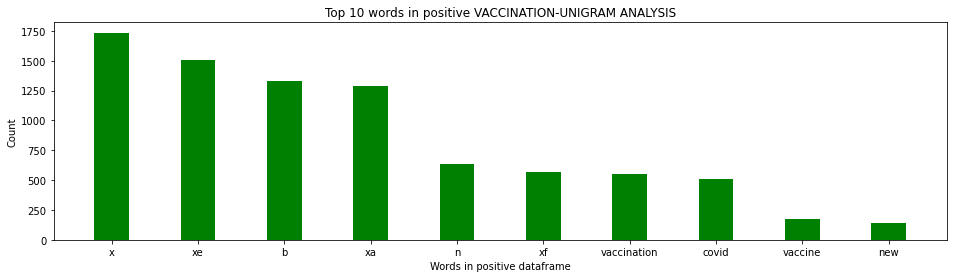

In [70]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive VACCINATION-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

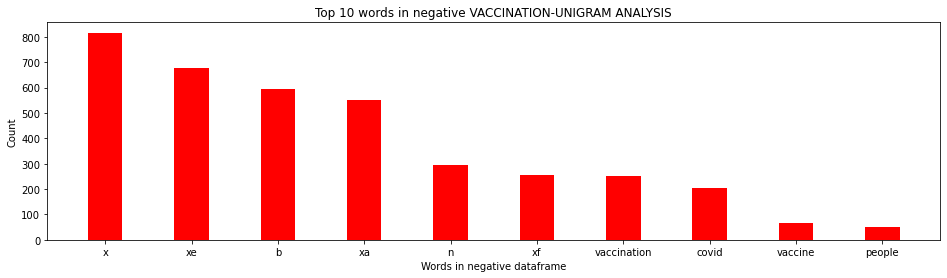

In [71]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative VACCINATION-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

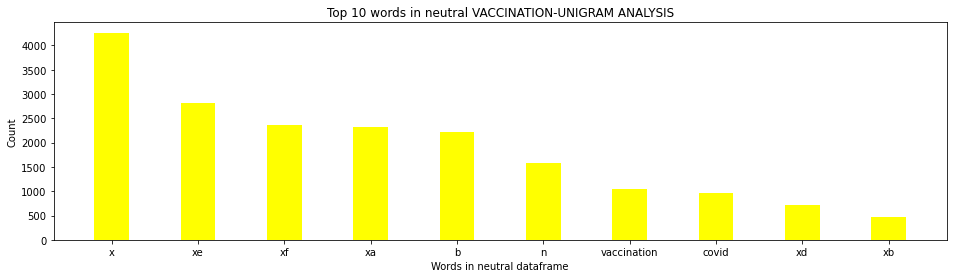

In [72]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral VACCINATION-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [73]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [74]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xbfalse', 'prophet', 'pope', 'francis', 'declares', 'covid', 'vaccines', 'morally', 'acceptable', 'necessary', 'great', 'good', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'trucking', 'troubles', 'nothing', 'new', 'fresh', 'produce', 'industry', 'recent', 'vaccination', 'mandates', 'gov', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'craigkellymp', 'moved', 'consensus', 'covid', 'vaccination', 'reduces', 'chances', 'becoming', 'severel', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dabawenyos', 'warned', 'particularly', 'cautious', 'face', 'covid', 'increase', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'qatar', 'contribute', 'p', 'million', 'worth', 'vaccines', 'philippines', 'n', 'n']
Sentence after removing stopwords: ['b', 'eu', 'turns', 'contracts', 'accessible', 'us', 'eu', 'experimenting', 'using', 'text', 'messages', 'smileys', 'xe', 'x', 'xa']
Sentence after r

Sentence after removing stopwords: ['b', 'india', 'top', 'states', 'districts', 'free', 'vaccination', 'slots', 'jan', 'pm', 'nsearch', 'slot', 'get', 'notification', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'well', 'done', 'karnataka', 'dhfwka', 'st', 'dose', 'coverage', 'large', 'state', 'truly', 'commendable', 'kudos', 'involved', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'human', 'got', 'devided', 'religion', 'colors', 'many', 'things', 'currently', 'covid', 'vaccination', 'xf', 'xf', 'xa', 'xba', 'xf', 'xf', 'xa', 'xba']
Sentence after removing stopwords: ['b', 'many', 'countries', 'indopacific', 'struggle', 'meet', 'vaccination', 'targets', 'india', 'could', 'spearhead', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'complete', 'first', 'dose', 'covid', 'vaccine', 'xf', 'xf', 'x', 'xe', 'n', 'covid', 'covidvaccine', 'vaccination']
Sentence after removing stopwords: ['b', 'truth', 'amazing', 'elixir', 'n', 'saturdaymotivation

Sentence after removing stopwords: ['b', 'policeonguard', 'perhaps', 'truckers', 'pick', 'choose', 'businesses', 'strong', 'vaccination', 'supporters', 'slo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'xe', 'x', 'xt', 'mild', 'underlying', 'medical', 'conditions', 'immunocompromised', 'late', 'pandemi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccination', 'update', 'n', 'n', 'first', 'dose', 'covid', 'vaccine', 'administered', 'eligible', 'population', 'n', 'n', 'india', 'xe', 'x', 'xs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'barking', 'news', 'aaronrogers', 'reconsiders', 'stance', 'covid', 'vaccination', 'realizing', 'winning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'study', 'suggests', 'two', 'paths', 'toward', 'super', 'immunity', 'covid', 'mdlinx', 'xe', 'x', 'xa', 'mdlinx', 'xe', 'x', 'xa', 'covidimmunity', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid

Sentence after removing stopwords: ['b', 'east', 'west', 'european', 'values', 'eu', 'cultural', 'political', 'preferences', 'psychological', 'mindset', 'impact', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'people', 'blab', 'myocarditis', 'risk', 'great', 'covid', 'point', 'utterly', 'destroys', 'argument', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'public', 'health', 'agency', 'canada', 'review', 'many', 'covid', 'vaccine', 'doses', 'needed', 'considered', 'fully', 'va', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rabies', 'n', 'n', 'xe', 'xad', 'xstill', 'kills', 'yearly', 'n', 'xe', 'xad', 'xends', 'life', 'person', 'every', 'minutes', 'n', 'xe', 'xad', 'xaffects', 'mostly', 'children', 'n', 'xe', 'xad', 'xis', 'prese', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'questions', 'employment', 'rights', 'employment', 'lawyer', 'samara', 'belitzky', 'live', 'join', 'us', 'get', 'xe', 'x', 'xa']
Sentence after removing stopwords:

Sentence after removing stopwords: ['b', 'xe', 'x', 'xayou', 'xe', 'x', 'xre', 'good', 'blues', 'musician', 'mislead', 'ericclapton', 'covid', 'misinformation', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pfizer', 'biontech', 'say', 'started', 'clinical', 'trial', 'test', 'new', 'version', 'vaccine', 'specifically', 'desi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'watch', 'sdm', 'srinagar', 'held', 'meeting', 'private', 'govt', 'schools', 'vaccination', 'drive', 'n', 'nwatch', 'full', 'video', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'something', 'free', 'customer', 'product', 'covid', 'vaccination', 'product', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'morning', 'xf', 'xf', 'xc', 'xa', 'eu', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'x', 'xba', 'germany', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xaa', 'nice', 'day', 'forget', 'war', 'covid', 'act', 'accordingly', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b

Sentence after removing stopwords: ['b', 'funny', 'vaccine', 'worshippers', 'never', 'ask', 'give', 'final', 'booster', 'skip', 'stuff', 'n', 'xf', 'xf', 'xa', 'xb', 'xe', 'x', 'xd', 'xe', 'x', 'x', 'xef', 'xb', 'xf', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'statement', 'status', 'n', 'osha', 'covid', 'vaccination', 'testing', 'emergency', 'temporary', 'standard', 'effective', 'jan', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'old', 'hpv', 'vaccination', 'expect', 'first', 'visit', 'gynecologist', 'type', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'balleraleit', 'happening', 'everywhere', 'people', 'classist', 'racist', 'bigoted', 'right', 'hateful', 'already', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'large', 'protest', 'vaccine', 'passports', 'central', 'stockholm', 'capital', 'sweden', 'n', 'protest', 'stockholm', 'sweden', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fringe', 'group', 'thinks', 'yel

Sentence after removing stopwords: ['b', 'spain', 'introduces', 'new', 'covid', 'vaccination', 'certificate', 'rules', 'international', 'arrivals', 'n', 'nthe', 'requirements', 'come', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lessons', 'pandemic', 'xe', 'x', 'x', 'using', 'primary', 'care', 'physicians', 'reach', 'unvaccinated', 'covid', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whoever', 'succeeds', 'australianopen', 'men', 'xe', 'x', 'xs', 'final', 'open', 'shut', 'australian', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wonderful', 'stato', 'day', 'wake', 'news', 'atlascorps', 'alumni', 'fayyazyaseen', 'leading', 'campa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xb', 'x', 'covid', 'numbers', 'xf', 'xf', 'xb', 'x', 'n', 'covid', 'data', 'pune', 'nwear', 'mask', 'amp', 'maintain', 'cab', 'amp', 'vaccination', 'maskuppune', 'n', 'new', 'cases', 'xe', 'xac', 'x', 'xef', 'xb', 'xf', 'n', 'xe', 

Sentence after removing stopwords: ['b', 'people', 'travelling', 'abroad', 'get', 'booster', 'shot', 'free', 'cost', 'showing', 'documents', 'vaccination', 'centres', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'top', 'states', 'districts', 'free', 'vaccination', 'slots', 'jan', 'nsearch', 'slot', 'get', 'notification', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'greenswelfares', 'gurmeetramrahim', 'incredible', 'work', 'dss', 'volunteers', 'grace', 'saint', 'dr', 'msg', 'xf', 'xf', 'x', 'xf', 'xf', 'xf', 'x', 'xf', 'xf', 'xf', 'x', 'xf', 'xf', 'xf', 'x', 'xf', 'n', 'vaccines', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'line', 'first', 'richmond', 'wants', 'review', 'vaccination', 'policy', 'doublevax', 'vaccination', 'covidns', 'nspoli', 'richmondcounty', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'first', 'powerful', 'tool', 'covid', 'vaccination', 'vaccination', 'far', 'important', 'xe', 'x', 'xa']
Sentence after r

Sentence after removing stopwords: ['b', 'good', 'morning', 'xf', 'xf', 'xc', 'xa', 'eu', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'x', 'xba', 'germany', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xaa', 'nice', 'day', 'forget', 'war', 'covid', 'act', 'accordingly', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'january', 'th', 'naci', 'provided', 'new', 'recommendations', 'amp', 'updated', 'guidelines', 'covid', 'vaccination', 'chi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hour', 'rt', 'pcr', 'covid', 'testing', 'nopen', 'sunday', 'friday', 'pm', 'npfizer', 'amp', 'moderna', 'vaccinations', 'available', 'fr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'seasonal', 'flu', 'vaccine', 'medical', 'centre', 'high', 'risk', 'developing', 'com', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'greece', 'safety', 'top', 'priority', 'tourism', 'season', 'approaches', 'n', 'n', 'healthnewsnextme', 'besafeeverywhereingreece', 'xe', 'x', 'xa']

Sentence after removing stopwords: ['b', 'cmoengland', 'please', 'step', 'call', 'charade', 'need', 'live', 'n', 'rip', 'children', 'far', 'child', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'live', 'bruxelles', 'vaccination', 'plandemic', 'nwo', 'billgates', 'number', 'people', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'important', 'vaccination', 'vs', 'nonvaccines', 'even', 'boosterdose', 'important', 'effects', 'cdc', 'information', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'exciting', 'paper', 'cell', 'today', 'alba', 'grifoni', 'alex', 'sette', 'shane', 'crotty', 'et', 'al', 'vaccination', 'allows', 'r', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'giving', 'information', 'union', 'health', 'minister', 'mansukh', 'mandaviya', 'said', 'percent', 'adult', 'population', 'india', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'parents', 'caregivers', 'young', 'children', 'reported', 'hitting', '

Sentence after removing stopwords: ['b', 'comparing', 'corona', 'covid', 'vaccination', 'based', 'great', 'breakthrough', 'technology', 'past', 'years', 'nazi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'find', 'register', 'year', 'old', 'children', 'covid', 'vaccine', 'mysejahtera', 'n', 'nvideo', 'guide', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'pdoocy', 'type', 'question', 'surprised', 'asked', 'yet', 'let', 'first', 'n', 'peterdoocy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'seandeveremd', 'hitweeties', 'craigaspencer', 'scotland', 'luxury', 'high', 'vaccination', 'rate', 'full', 'vacci', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'marshallsteven', 'cityofadelaide', 'surprised', 'many', 'people', 'think', 'completely', 'safe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'hilarious', 'vaccinated', 'shamed', 'unvaccinated', 'people', 'said', 'problem', 'blah', 'blah', 'blah', 'xe

Sentence after removing stopwords: ['b', 'eldsjal', 'spotify', 'supporting', 'joerogan', 'promote', 'anti', 'vaccine', 'bullshit', 'n', 'spotifydeleted', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'israel', 'test', 'positive', 'quarter', 'tests', 'return', 'positive', 'n', 'n', 'israel', 'coronavirus', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'blouse', 'vaccination', 'memes', 'covid']
Sentence after removing stopwords: ['b', 'kerpen', 'yes', 'covid', 'illness', 'comparatively', 'uncommon', 'children', 'vs', 'adults', 'get', 'sick', 'many', 'chi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'co', 'win', 'app', 'family', 'register', 'using', 'one', 'mobile', 'number', 'covid', 'jabs', 'n', 'cowin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pc', 'india', 'adult', 'population', 'fully', 'vaccinated', 'covid', 'n', 'n']
Sentence after removing stopwords: ['b', 'almost', 'one', 'five', 'canadian', 'trucke

Sentence after removing stopwords: ['b', 'variety', 'evangeline', 'enjoy', 'body', 'sovereignty', 'enjoy', 'watching', 'films', 'including', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looks', 'pretty', 'important', 'need', 'three', 'doses', 'either', 'infection', 'plus', 'two', 'doses', 'three', 'doses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mandatory', 'vaccination', 'comparable', 'mandatory', 'driving', 'one', 'side', 'road', 'saves', 'many', 'lives', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cervical', 'cancer', 'prevented', 'xc', 'xarecommended', 'vaccination', 'regular', 'screening', 'primary', 'method', 'preventio', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'omicron', 'ba', 'mutation', 'already', 'confirmed', 'countries', 'xe', 'x', 'x', 'coronavirus', 'prepared', 'us', 'time', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'evolution', 'amp', 'surge', 'driven', 'massvaccination', '

Sentence after removing stopwords: ['b', 'local', 'convenient', 'walk', 'flu', 'jab', 'service', 'available', 'pharmacy', 'offer', 'free', 'nhs', 'flu', 'jabs', 'well', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hpv', 'common', 'infection', 'spreads', 'sexual', 'activity', 'causes', 'almost', 'cases', 'cervical', 'ca', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'year', 'old', 'father', 'usa', 'removed', 'heatransplant', 'list', 'boston', 'hospital', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'proud', 'announce', 'labournet', 'joined', 'hands', 'britishasiantst', 'nsdcindia', 'rapidly', 'train', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'please', 'understand', 'mild', 'mean', 'mild', 'certain', 'could', 'life', 'ending', 'disease', 'bee', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gujarat', 'reports', 'fresh', 'covid', 'cases', 'deaths', 'past', 'hours', 'n', 'n', 'covidcases', 'xe', 'x', 'xa']
Sentence after 

Sentence after removing stopwords: ['b', 'xe', 'x', 'xre', 'pregnant', 'covid', 'vaccines', 'offer', 'best', 'protection', 'baby', 'n', 'nif', 'need', 'advice', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'welcome', 'unfreedom', 'new', 'yorker', 'covid', 'covid', 'covidresponse', 'korea', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'reports', 'lakh', 'new', 'cases', 'omicron', 'peak', 'cross', 'february', 'mohfwindia', 'n', 'n', 'india', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'global', 'nurse', 'shortage', 'top', 'according', 'n', 'ntherefore', 'enforcing', 'double', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'w', 'addition', 'new', 'labs', 'department', 'health', 'able', 'detect', 'vaccine', 'preventable', 'diseases', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'easy', 'decision', 'listen', 'spotify', 'always', 'listen', 'neilyoung', 'n', 'nstop', 'vaccine', 'xe', 'x', 'xa']
Sentence after removi

Sentence after removing stopwords: ['b', 'fokusza', 'h', 'sabc', 'south', 'africans', 'refuse', 'vaccination', 'covid', 'denied', 'certain', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'never', 'came', 'across', 'vaccine', 'would', 'protect', 'newly', 'created', 'diseases', 'like', 'joblossis', 'freedomlossis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'got', 'first', 'covidvaccine']
Sentence after removing stopwords: ['b', 'palma', 'hospital', 'activates', 'new', 'phase', 'contingency', 'plan', 'covid', 'covid', 'sonespaseshospital', 'covidvaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yes', 'covid', 'illness', 'comparatively', 'uncommon', 'children', 'vs', 'adults', 'get', 'sick', 'many', 'children', 'suf', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'us', 'cdc', 'reports', 'vaccination', 'remains', 'highly', 'effective', 'vs', 'covid', 'delta', 'omicron', 'variants', 'unvac', 'xe', 'x', 'xa']
Sentence after removing s

Sentence after removing stopwords: ['b', 'facts', 'n', 'nthey', 'safe', 'protective', 'course', 'happy', 'n', 'nyou', 'n', 'n', 'share', 'like', 'comment', 'youth', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'amid', 'snowfall', 'j', 'amp', 'k', 'health', 'department', 'carried', 'vaccination', 'drive', 'several', 'villages', 'situated', 'near', 'loc', 'bon', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'physicians', 'society', 'central', 'florida', 'calling', 'upon', 'public', 'officials', 'community', 'large', 'continue', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'naturalimmunity', 'superior', 'vaccination', 'delta', 'virus', 'variant', 'shows', 'new', 'cdc', 'study']
Sentence after removing stopwords: ['b', 'cdc', 'reports', 'natural', 'immunity', 'covid', 'times', 'strong', 'vaccination', 'mandatefreedom', 'novaxpassports']
Sentence after removing stopwords: ['b', 'ongoing', 'rd', 'wave', 'coronavirus', 'mild', 'impact', 'health', 'fully',

Sentence after removing stopwords: ['b', 'momentsindia', 'politicotab', 'xe', 'x', 'xc', 'vaccination', 'strategy', 'based', 'repeated', 'booster', 'original', 'vaccine', 'compositi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'done', 'rd', 'dosis', 'astra', 'zeneca', 'covid', 'vaccination', 'mexico', 'thank', 'wise', 'scientific', 'xe', 'x', 'xs']
Sentence after removing stopwords: ['b', 'coronavirus', 'numbers', 'getting', 'high', 'vaccination']
Sentence after removing stopwords: ['b', 'delhi', 'logs', 'new', 'covid', 'cases', 'positivity', 'rate', 'dips', 'n', 'delhi', 'covid', 'omicron', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'right', 'tell', 'year', 'old', 'child', 'get', 'vaccine', 'school', 'force', 'school', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mumbai', 'continues', 'path', 'recovery', 'great', 'sign', 'tpr', 'weeks', 'back', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yes', 'covid', 'illness', 'c

Sentence after removing stopwords: ['b', 'mommabearma', 'cnn', 'right', 'xe', 'x', 'xs', 'like', 'countries', 'high', 'vaccination', 'rates', 'also', 'hig', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'appointments', 'mostly', 'resume', 'normal', 'thursday', 'n', 'n']
Sentence after removing stopwords: ['b', 'ebay', 'store', 'amp', 'custom', 'decals', 'xf', 'xf', 'x', 'xc', 'positive', 'feedback', 'xf', 'xf', 'xa', 'x', 'ad', 'america', 'american', 'americans', 'usa', 'smallbusiness', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'amazing', 'possibilities', 'hiv', 'patients', 'thanks', 'mdohertyhiv', 'n', 'nlet', 'xe', 'x', 'xs', 'take', 'lesson', 'covid', 'amp', 'stathinking', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'great', 'news', 'yarrenytyarltere', 'community', 'xe', 'xd', 'xa', 'xef', 'xb', 'xf', 'staysafe', 'staywell', 'children', 'vaccination']
Sentence after removing stopwords: ['b', 'happy', 'republic', 'day', 'fellow

Sentence after removing stopwords: ['b', 'asked', 'reports', 'cases', 'myocarditis', 'israel', 'analyzed', 'amp', 'able', 'sta', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'congratulations', 'countrymen', 'important', 'achievement', 'fully', 'vaccinated', 'adults', 'country', 'u', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'spreading', 'message', 'nplease', 'get', 'touch', 'person', 'anyone', 'capable', 'enough', 'help', 'n', 'doctors', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'covid', 'vaccination', 'even', 'xe', 'x', 'xve', 'virus', 'learn', 'facts', 'protect', 'love', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pregnant', 'still', 'need', 'covid', 'vaccine', 'listen', 'katie', 'xe', 'x', 'xs', 'experience', 'vaccines', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'far', 'complaints', 'paid', 'quarantine', 'leave', 'workers', 'dole', 'n', 'n']
Sentence after removing stopwords: ['b', 'delicious', 'moret

Sentence after removing stopwords: ['b', 'fully', 'jabbed', 'boosted', 'still', 'caught', 'covid', 'really', 'xf', 'xf', 'xa', 'x', 'vaccine', 'covid', 'thejeremyvine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'really', 'enjoyable', 'regional', 'multidisciplinary', 'meeting', 'today', 'discuss', 'future', 'local', 'covid', 'vaccination', 'pr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'never', 'late', 'boostyourimmunity', 'first', 'second', 'booster', 'dose', 'covidvaccine', 'xf', 'xf', 'x', 'x', 'nlots', 'cap', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'read', 'anti', 'vax', 'ok', 'anti', 'mandate', 'xf', 'xf', 'x', 'x', 'pro', 'vax', 'people', 'park', 'biases', 'beliefs', 'moment', 'rea', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'adviced', 'states', 'review', 'amp', 'expedite', 'progress', 'ecrp', 'ii', 'strengthen', 'health', 'infrastructure', 'ensure', 'full', 'xe', 'x', 'xa']
Sentence after removing

Sentence after removing stopwords: ['b', 'xe', 'xa', 'x', 'xe', 'xa', 'xac', 'xe', 'xa', 'xbe', 'xe', 'xa', 'xb', 'xe', 'xa', 'xb', 'xe', 'xa', 'x', 'xe', 'xa', 'xb', 'xe', 'xa', 'xad', 'xe', 'xa', 'xbf', 'xe', 'xa', 'xa', 'xe', 'xa', 'xa', 'xe', 'xa', 'xaf', 'xe', 'xa', 'xaa', 'xe', 'xa', 'xc', 'xe', 'xa', 'x', 'xe', 'xa', 'xf', 'xe', 'xa', 'xbf', 'xe', 'xa', 'xad', 'tested', 'covid', 'positive', 'xe', 'xa', 'x', 'xe', 'xa', 'xbf', 'xe', 'xa', 'xb', 'xe', 'xa', 'xac', 'xe', 'xa', 'x', 'xe', 'xa', 'xf', 'xe', 'xa', 'x', 'xe', 'xa', 'xa', 'sharing', 'personal', 'experience', 'nvlog', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'freedomconvoy', 'n', 'freedomconvoycanada', 'begun', 'ottawa', 'truckers', 'way', 'peaceful', 'prot', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'egottweets', 'xe', 'x', 'xt', 'stop', 'highly', 'contagious', 'viral', 'respiratory', 'pathogen', 'never', 'past', 'never', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bpm', '

Sentence after removing stopwords: ['b', 'great', 'way', 'look', 'analyze', 'covid', 'data', 'keep', 'simple', 'covid', 'data', 'misinformation', 'vaccination']
Sentence after removing stopwords: ['b', 'expected', 'k', 'local', 'new', 'cases', 'k', 'capital', 'region', 'alone', 'k', 'seollal', 'icu', 'amp', 'deaths', 'still', 'conta', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'proud', 'home', 'country', 'chile', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xb', 'result', 'nothing', 'less', 'strong', 'public', 'health', 'system', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'variant', 'nnew', 'booster', 'jab', 'coming', 'n', 'n', 'booster', 'n', 'covid', 'n', 'covidvaccine', 'n', 'covid', 'n', 'boosterdose']
Sentence after removing stopwords: ['b', 'side', 'effects', 'getting', 'covid', 'vaccine', 'xe', 'x', 'xs', 'normal', 'sign', 'immune', 'system', 'respondin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'never', 'late', 

Sentence after removing stopwords: ['b', 'nhs', 'staff', 'throw', 'uniforms', 'refuse', 'take', 'doses', 'experimental', 'vaccines', 'study', 'completio', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whcos', 'stunning', 'predictable', 'three', 'vaccines', 'use', 'profoundly', 'effective', 'remarkably', 'cle', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'texmilton', 'tex', 'thoughts', 'aaronrodgers', 'testing', 'free', 'agency', 'know', 'two', 'anti', 'vaccination', 'probably', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'high', 'health', 'ceo', 'prof', 'ramneekhh', 'ahluwalia', 'accompanied', 'westerncapehealthmec', 'french', 'mbombo', 'visit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'week', 'spotlight', 'n', 'xf', 'xf', 'x', 'x', 'vaccination', 'effective', 'infection', 'neutralizing', 'variants', 'n', 'xf', 'xf', 'x', 'xapre', 'pandemic', 'rate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'measures', 'introduc

Sentence after removing stopwords: ['b', 'remember', 'poliomyelitis', 'polio', 'short', 'n', 'na', 'nephew', 'mine', 'one', 'last', 'victims', 'region', 'early', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'many', 'countries', 'indopacific', 'struggle', 'meet', 'vaccination', 'targets', 'india', 'could', 'spearhead', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xb', 'x', 'covid', 'numbers', 'xf', 'xf', 'xb', 'x', 'n', 'covid', 'pune', 'mask', 'amp', 'maintain', 'cab', 'amp', 'vaccination', 'maskuppune', 'n', 'new', 'cases', 'xe', 'xac', 'x', 'xef', 'xb', 'xf', 'n', 'active', 'xe', 'xac', 'x', 'xef', 'xb', 'xf', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mary', 'good', 'doc', 'rat', 'dr', 'docrat', 'covid', 'immunisation', 'vaccination']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xc', 'omicron', 'may', 'mild', 'many', 'elderly', 'unvaccinated', 'remain', 'vulnerable', 'could', 'bring', 'huge', 'impa', 'xe', 'x'

Sentence after removing stopwords: ['b', 'vaccination', 'policies', 'strong', 'high', 'income', 'countries', 'whereas', 'low', 'income', 'countries', 'weak', 'amp', 'limited', 'poli', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xcthe', 'government', 'certainly', 'oblivion', 'terms', 'early', 'treatment', 'xe', 'x', 'xd', 'mccullough', 'said', 'n', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'undated', 'repoby', 'correctional', 'association', 'new', 'york', 'cany', 'n', 'n', 'decarcerat', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'cases', 'spiking', 'countries', 'high', 'vaccination', 'rate', 'vaccine', 'vaccination', 'vaccinesideeffects']
Sentence after removing stopwords: ['b', 'cuddlefish', 'cdcgov', 'measures', 'general', 'public', 'mitigate', 'covid', 'transmission', 'think', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'roughly', 'million', 'workforce', 'us', 'n', 'million', 'cases', 'n', '

In [75]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

Sentence after removing stopwords: ['b', 'pure', 'evil', 'ishere', 'satan', 'g', 'vaccination', 'vaccinatie']
Sentence after removing stopwords: ['b', 'annoying', 'hopefully', 'jabs', 'make', 'mild', 'xe', 'x', 'xm', 'though', 'xe', 'x', 'xa', 'n', 'booster', 'omicron', 'covid', 'covidvaccine']
Sentence after removing stopwords: ['b', 'due', 'cold', 'climate', 'change', 'experiencing', 'people', 'usually', 'prone', 'flu', 'harmattan', 'season', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'louisiana', 'vaccine', 'stalemate', 'long', 'road', 'ahead', 'state', 'vaccination', 'rate', 'stagnated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pnp', 'active', 'cases', 'dropped', 'k', 'recoveries', 'n', 'n', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'begin', 'vaccinating', 'children', 'aged', 'coronavirus', 'february', 'end', 'xf', 'xf', 'x', 'x', 'n', 'nread', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ensure', 'v

Sentence after removing stopwords: ['b', 'disgusting', 'humanity', 'gone', 'people', 'whole', 'purpose', 'vaccination', 'save', 'lives', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covidgr', 'n', 'nthe', 'regular', 'briefing', 'national', 'vaccination', 'committee', 'held', 'every', 'monday', 'postponed', 'due', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'premierscottmoe', 'us', 'law', 'requiring', 'vaccination', 'foreign', 'truck', 'drivers', 'entering', 'country', 'go', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'austria', 'austriahasfallen', 'covid', 'vaccine', 'mandates', 'citizens', 'wakeup', 'forced', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'never', 'universalstudios', 'check', 'late', 'video', 'help', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'virus', 'links', 'coronavirus', 'coronavirus', 'covid', 'pandemic', 'unnecessary', 'deaths', 'vaccination', 'cdcchanges', 'xe', 'x', 'xa']
S

Sentence after removing stopwords: ['b', 'people', 'stupid', 'think', 'government', 'need', 'give', 'shot', 'track', 'literally', 'holding', 'mi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nj', 'gov', 'phil', 'murphy', 'said', 'getting', 'vaccinated', 'irresponsible', 'n', 'xe', 'x', 'xci', 'think', 'xe', 'x', 'xs', 'akin', 'drunk', 'driving', 'xe', 'x', 'xd', 'sai', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'forgot', 'wife', 'xe', 'x', 'xs', 'birthday', 'try', 'xe', 'x', 'xcsupply', 'chain', 'issues', 'xe', 'x', 'xd', 'excuse', 'n', 'n', 'covid', 'n', 'truckers', 'n', 'vaccination']
Sentence after removing stopwords: ['b', 'trying', 'get', 'number', 'pmoindia', 'issuing', 'fake', 'vaccination', 'certificates', 'n', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'masks', 'vaccination', 'protects', 'children', 'amp', 'vulnerable', 'populations', 'n', 'children', 'vaccination', 'masks', 'n', 'n', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xf', 'xb

Sentence after removing stopwords: ['b', 'covid', 'india', 'go', 'slow', 'boosters', 'say', 'experts', 'n', 'n', 'india', 'covid', 'corona', 'vaccines', 'vaccination']
Sentence after removing stopwords: ['b', 'nyugphbiostats', 'colleagues', 'working', 'nyugrossman', 'clinicians', 'remind', 'us', 'serious', 'non', 'lethal', 'consequence', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'maybe', 'staserious', 'education', 'myth', 'debunking', 'weak', 'effoso', 'far', 'vaccination', 'nomicron', 'wave', 'wake', 'ca', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'missing', 'something', 'anti', 'vax', 'protestors', 'still', 'protesting', 'american', 'federal', 'government', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'leaders', 'still', 'pushing', 'mandates', 'passes', 'criminal', 'point', 'vaccination', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'course', 'ample', 'room', 'improvement', 'remains', 'vaccination', 'coverage', 'regio

Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'two', 'years', 'pandemic', 'feel', 'much', 'hard', 'vaccines', 'saved', 'lives', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'wave', 'begun', 'malaysia', 'number', 'xc', 'xacovid', 'cases', 'country', 'expected', 'xc', 'xato', 'rise', 'xc', 'xasaid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nathanmackbrown', 'wish', 'nothing', 'ill', 'thoughts', 'prayers', 'vaccination']
Sentence after removing stopwords: ['b', 'two', 'dose', 'passpo', 'almost', 'worthless', 'ottawa', 'area', 'public', 'health', 'experts', 'would', 'like', 'see', 'province', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xs', 'late', 'get', 'st', 'nd', 'booster', 'covidvaccine', 'xf', 'xf', 'x', 'x', 'n', 'nbook', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'less', 'vaccination', 'deaths', 'africa', 'vaccination', 'deaths', 'developed', 'xe'

Sentence after removing stopwords: ['b', 'passionate', 'c', 'educators', 'conversation', 'n', 'ncelebrity', 'doctor', 'john', 'campbell', 'getting', 'masterclass', 'veteran', 'australi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'words', 'visit', 'sick', 'kid', 'hospital', 'unless', 'covidvaccine', 'beyond', 'sick', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'uptodate', 'adequate', 'vaccination', 'n', 'nstates', 'bad', 'covid', 'vaccination', 'rates', 'n', 'n']
Sentence after removing stopwords: ['b', 'read', 'newblogpost', 'medium', 'first', 'two', 'covid', 'jabs', 'made', 'ill', 'xe', 'x', 'xahere', 'xe', 'x', 'xs', 'went', 'back', 'third', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'york', 'times', 'changes', 'tune', 'xe', 'x', 'xadmits', 'unvaccinated', 'less', 'risk', 'vaccinated']
Sentence after removing stopwords: ['b', 'googlemaps', 'googlede', 'vaccination', 'center', 'technical', 'university', 'berlin', 'still', 'pending', 

Sentence after removing stopwords: ['b', 'app', 'onely', 'lets', 'stream', 'connect', 'people', 'based', 'music', 'taste', 'removes', 'spotify', 'integration', 'due', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'booster', 'dose', 'initiated', 'civil', 'administration', 'remote', 'villages', 'doda', 'n', 'staysafe', 'n', 'stayhealthy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fake', 'vaccination', 'cards', 'get', 'charged', 'felony', 'might', 'get', 'jail', 'time', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'albany', 'county', 'residents', 'received', 'least', 'first', 'dose', 'covid', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sunderland', 'boss', 'leejohnson', 'claims', 'covid', 'vaccine', 'could', 'behind', 'goalkeeper', 'leeburge', 'ruled', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'would', 'get', 'vaccination', 'vaccination', 'corona', 'survivable', 'xe', 'x', 'xa', 'saw', 'many', 'go

Sentence after removing stopwords: ['b', 'ontario', 'ndp', 'calling', 'investigation', 'gov', 'xe', 'x', 'xt', 'xe', 'x', 'xs', 'move', 'hand', 'private', 'covid', 'testing', 'firm', 'contra', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'health', 'ministry', 'experts', 'recommend', 'scrapping', 'green', 'pass', 'watch', 'also', 'related', 'interview', 'erro', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sad', 'see', 'mds', 'still', 'oppose', 'covid', 'vaccination', 'grounds', 'omicron', 'big', 'deal', 'waning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccine', 'dose', 'labelled', 'xe', 'x', 'xc', 'precautionary', 'booster', 'xe', 'x', 'xc', 'appears', 'confusing', 'red', 'herring', 'prospectus', 'amen', 'xf', 'xf', 'x', 'xf', 'vaccination']
Sentence after removing stopwords: ['b', 'new', 'york', 'times', 'changes', 'tune', 'xe', 'x', 'xadmits', 'unvaccinated', 'less', 'risk', 'vaccinated']
Sentence after removing stopwords: ['b', 'covid', 

Sentence after removing stopwords: ['b', 'sheba', 'medical', 'center', 'israel', 'launched', 'landmark', 'study', 'test', 'efficacy', 'fourth', 'dose', 'covid', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'stop', 'making', 'us', 'anger', 'distrust', 'fuelling', 'separation', 'amongst', 'us', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'time', 'scicomm', 'amp', 'healthliteracy', 'analysis', 'explains', 'well', 'behind', 'vaccination', 'however', 'n', 'nr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'piece', 'theatlantic', 'coins', 'term', 'xe', 'x', 'xcspike', 'zero', 'xe', 'x', 'xd', 'meaning', 'people', 'truly', 'immunologically', 'naive', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jab', 'job', 'story', 'behind', 'ccma', 'decision', 'dismissal', 'refusing', 'vaccination', 'unfair', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'disclosetv', 'fauci', 'mad', 'doctor', 'never', 'let', 'end', 

Sentence after removing stopwords: ['b', 'dougeyolfson', 'vaccination', 'xe', 'x', 'xt', 'work', 'omicron', 'little', 'cold', 'anyway']
Sentence after removing stopwords: ['b', 'covax', 'world', 'vaccination', 'programme', 'bringing', 'covidvaccines', 'every', 'single', 'person', 'earth', 'dedicated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccine', 'may', 'protect', 'everyone', 'n', 'ntrue', 'false', 'n', 'n', 'vaccineswork', 'vaccines', 'vaccination', 'covid']
Sentence after removing stopwords: ['b', 'virus', 'links', 'coronavirus', 'coronavirus', 'covid', 'pandemic', 'unnecessary', 'deaths', 'vaccination', 'cdcchanges', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'aaron', 'rodgers', 'mvp', 'xe', 'x', 'xamy', 'ass', 'nenjoy', 'season', 'jerking', 'joe', 'rogan', 'ya', 'dumb', 'ass', 'aaronrodgers', 'packers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'travel', 'vaccines', 'help', 'protect', 'rare', 'diseases', 'reduce', 'chan

Sentence after removing stopwords: ['b', 'long', 'lasting', 'cellular', 'immunity', 'coronavirus', 'following', 'infection', 'vaccination', 'implications', 'booster', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ministry', 'health', 'moh', 'urged', 'parents', 'children', 'aged', 'five', 'register', 'children', 'throug', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'walk', 'covidvaccine', 'clinics', 'today', 'sat', 'n', 'nbooster', 'aged', 'nboosters', 'aged', 'ndose', 'amp', 'vac', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ladowd', 'vulgar', 'friends', 'unfortunately', 'complicit', 'every', 'single', 'one', 'needles', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'moderna', 'executive', 'claims', 'fourth', 'vaccine', 'may', 'needed', 'fall', 'nby', 'black', 'health', 'matters', 'n']
Sentence after removing stopwords: ['b', 'unequal', 'distribution', 'vaccines', 'allows', 'high', 'levels', 'transmission', 'continue', 'vulnerable', 

Sentence after removing stopwords: ['b', 'fuck', 'seriously', 'going', 'hell', 'children', 'n', 'covid', 'n', 'covid', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'agency', 'decision', 'comes', 'less', 'two', 'weeks', 'u', 'supreme', 'coublocked', 'rule', 'osha', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'freewarrior', 'appropriations', 'people', 'suffered', 'murdered', 'holocaust', 'ideology', 'hate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'two', 'football', 'games', 'delayed', 'due', 'xe', 'x', 'xmedical', 'emergency', 'xe', 'x', 'x', 'uk', 'know', 'today', 'n', 'nthese', 'injured', 'players', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'long', 'term', 'side', 'effects', 'covidvaccine', 'fda', 'conduct', 'independent', 'research', 'drugs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'questioned', 'covidvaccine', 'day', 'one', 'nthat', 'refused', 'get', 'vaccinated', 'actively', '

In [76]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['b', 'call', 'delay', 'compulsory', 'covid', 'vaccines', 'nhs', 'staff', 'feel', 'like', 'vaccination', 'needs', 'mandate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccines', 'fertility', 'need', 'know', 'tarahaelle', 'via', 'medium', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'boostershots', 'n', 'uptodate', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'vaccination', 'january', 'th', 'n']
Sentence after removing stopwords: ['b', 'headed', 'towards', 'endemic', 'n', 'nhere', 'epidemiologists', 'immunologists', 'evolutionary', 'biologists', 'hav', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'overall', 'vaccinations', 'fallen', 'even', 'daily', 'case', 'numbers', 'rise', 'n', 'n', 'sachinmampatta', 'reports', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'list', 'cvc', 'n', 'kamrupmetropolitan', 'n', 'staysafe', 'n', 'largestvaccinationdrive', 'n', 'turnfortheteens', 'xe', 'x', 'xa'

Sentence after removing stopwords: ['b', 'conservs', 'speak', 'abortion', 'one', 'side', 'mouth', 'medicalfreedom', 'side', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'herd', 'immunity', 'nthis', 'place', 'n', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xb', 'bahamas', 'n', 'fully', 'vaccinated', 'nas', 'n', 'ntake', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tafrishaala', 'prime', 'time', 'n', 'n', 'snowstorm', 'us', 'hongkong', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'moral', 'responsibility', 'nto', 'bring', 'awareness', 'informative', 'covidexhibition', 'children', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'indiafightscorona', 'n', 'n', 'xf', 'xf', 'x', 'xd', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xf', 'lakh', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', '

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xdwitness', 'journey', 'covidwarriors', 'led', 'world', 'largestvaccinationdrive', 'n', 'n', 'wevaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'bolton', 'walk', 'covid', 'vaccination', 'clinics', 'week', 'ahead', 'plenty', 'choice', 'ndetails', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'clicks', 'earned', 'rm', 'vaccines', 'five', 'months', 'via', 'supermarketmag', 'clickssa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mairangi', 'medical', 'centre', 'staff', 'went', 'beyond', 'hosting', 'children', 'vaccination', 'clinic', 'weeke', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'two', 'days', 'register', 'vax', 'future', 'panel', 'discussion', 'equity', 'informed', 'pandemic', 'responses', 'building', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'covidiot', 'covid', 'covidiots', 'covid', 'covidvic', 'vaccinesideeffects', 'vaccinated'

Sentence after removing stopwords: ['b', 'th', 'booster', 'affect', 'people', 'israel', 'n', 'n', 'covid', 'cases', 'worldwide', 'n', 'ic', 'overwhelmed', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xawhooping', 'cough', 'also', 'called', 'pertussis', 'bacterial', 'infection', 'lungs', 'breathing', 'tubes', 'also', 'known', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'knocked', 'door', 'everyone', 'prepared', 'vaccination', 'preventive', 'measur', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ihavenotseen', 'vaccination', 'program', 'campaign', 'campaigns', 'like', 'teh', 'german', 'itsliketehnazis']
Sentence after removing stopwords: ['b', 'undoubtedly', 'something', 'fishy', 'going', 'xc', 'xawe', 'simply', 'told', 'truth', 'n', 'n']
Sentence after removing stopwords: ['b', 'anyone', 'else', 'find', 'weird', 'many', 'people', 'posting', 'medical', 'records', 'twitter', 'like', 'badge', 'ho', 'xe', 'x', 'xa']
Sentenc

Sentence after removing stopwords: ['b', 'xe', 'xa', 'xa', 'xef', 'xb', 'xf', 'video', 'english', 'n', 'covid', 'vaccination', 'n', 'franckentheo']
Sentence after removing stopwords: ['b', 'hazards', 'th', 'c', 'census', 'enumerator', 'renfrewshire', 'independent', 'april', 'notes', 'enu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thats', 'xf', 'xf', 'x', 'x', 'vaccination']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xt', 'remember', 'electing', 'doctors', 'xe', 'x', 'xcmsm', 'xe', 'x', 'xd', 'influencers', 'tell', 'listen', 'time', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'huffcongress', 'fourth', 'booster', 'covidvaccine']
Sentence after removing stopwords: ['b', 'poll', 'government', 'england', 'vaccineswork', 'vaccination', 'cast', 'vote', 'borisjohnsonresign', 'nationalvotersday', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'n', 'xf', 'xf', 'x', 'xfpray', 'victims', 'n', 'xe', 'x', 'xa', 'xef', 'xb', '

Sentence after removing stopwords: ['b', 'rural', 'bengaluru', 'covidvaccine', 'availability', 'nfree', 'slots', 'n', 'covishield', 'dose', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccination', 'lead', 'impotence', 'n', 'nvideo', 'adverseeffects', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xc', 'xd', 'global', 'covid', 'vaccine', 'rollout', 'n', 'n', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'estimate', 'n', 'nvaccine', 'doses', 'deployed', 'b', 'nthe', 'rollout', 'seems', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vcolizza', 'chpoletto', 'chiaresabbatini', 'lauradidom', 'n', 'medicalxpress', 'n', 'johnshopkins', 'familycare

Sentence after removing stopwords: ['b', 'menstrual', 'cups', 'market', 'vietnam', 'witness', 'rise', 'revenues', 'n', 'menstrual', 'cups', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jarrad', 'covid', 'shot', 'doc', 'rat', 'dr', 'docrat', 'covid', 'immunisation', 'vaccination']
Sentence after removing stopwords: ['b', 'sri', 'lankan', 'style', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xa', 'xe', 'xb', 'xa', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'xa', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xbb', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'xa', 'xe', 'xb', 'xaf', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'promote', 'booster', 'covidvaccination', 'drive', 'infectious', 'disease', 'hosp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'canada', 'gigantic', 'protest', 'truckers', 'requirement', 'vaccination', 'canada']
Sentence after removing stopwords: ['b', 'india', 'xe', 'x', 'xs', 'cumulative', 'covid', 'vaccination', 'covera

Sentence after removing stopwords: ['b', 'inquiring', 'apartment', 'asked', 'covid', 'vaccination', 'include', 'booster', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'joenbc', 'aaron', 'rogers', 'got', 'vaxxed', 'g', 'signal', 'would', 'helped', 'hear', 'coaches', 'sideline', 'n', 'n', 'g', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gmb', 'gbnews', 'vaccination', 'boosterjab', 'experiment', 'crucial', 'recipient', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'news', 'story', 'concerned', 'virus', 'justiss', 'goode', 'jun', 'medium', 'via', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tbt', 'partnered', 'cfufbaltimore', 'lbhealth', 'covid', 'vaccination', 'event', 'nflalumnihealth', 'ncheck', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'training', 'date', 'ff', 'training', 'n', 'nwhy', 'book', 'one', 'open', 'courses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'standing', 'tyra

Sentence after removing stopwords: ['b', 'saying', 'n', 'covid', 'covid', 'covidvaccine']
Sentence after removing stopwords: ['b', 'truckerconvoy', 'n', 'truckersforfreedom', 'n', 'truckersforfreedom', 'n', 'truckerforfreedom', 'n', 'truckyoutrudeau', 'n', 'truckers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'cases', 'world', 'deaths', 'n', 'recovered', 'n', 'nuk', 'deaths', 'rec', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'doctor', 'xc', 'xadetects', 'xc', 'xa', 'xe', 'x', 'xbmac', 'addresses', 'xc', 'xain', 'xc', 'xa', 'covid', 'xc', 'xa', 'vaccinated', 'individuals', 'xc', 'xa', 'xe', 'x', 'xbwith', 'bluetooth', 'applications', 'n', 'n', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'going', 'running', 'covid', 'vaccination', 'walk', 'clinic', 'bedminster', 'methodist', 'church', 'today', 'fro', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'keralahc', 'rejects', 'plea', 'seeking', 'remove', 'pmmodi', '

Sentence after removing stopwords: ['b', 'savethedate', 'next', 'community', 'nflalumnihealth', 'vaccination', 'awareness', 'amp', 'education', 'event', 'partners', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covidvaccine', 'valentinesday', 'covid', 'n', 'roses', 'red', 'nviolets', 'blue', 'ni', 'got', 'vaccines', 'nhow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'le', 'tabac', 'ressuscite', 'xf', 'xf', 'xa', 'xa', 'covid', 'propagande', 'vaccination']
Sentence after removing stopwords: ['b', 'jewel', 'covid', 'vaccine', 'experience', 'xf', 'xf', 'xa', 'xb', 'xf', 'xf', 'x', 'xaf', 'n', 'n', 'publichealthmatters', 'vaccinessavelives', 'children', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vacunateya', 'suffer', 'pandemic', 'fatigue', 'frontline', 'workers', 'still', 'treat', 'unvacci', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'saudi', 'arabia', 'fully', 'board', 'domestic', 'international', 'flights', 'n', 'travel

Sentence after removing stopwords: ['b', 'auspicious', 'occasion', 'republic', 'day', 'want', 'share', 'awork', 'representing', 'india', 'one', 'achivement', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'podcast', 'host', 'joerogan', 'clarifies', 'vaccination', 'comments', 'anti', 'vax', 'current', 'us', 'vicepresident', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'worldbank', 'expresses', 'concern', 'continuing', 'risk', 'covid', 'impact', 'angola', 'adopts', 'restrictive', 'measures', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gis', 'representation', 'covid', 'scenario', 'india', 'th', 'jan', 'prepared', 'csirneeri', 'ntotal', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'number', 'instances', 'covid', 'ncr', 'peaked', 'according', 'doh', 'secretary', 'n', 'n']
Sentence after removing stopwords: ['b', 'big', 'thank', 'stjohnpeople', 'week', 'suppoacross', 'communities', 'xe', 'x', 'xre', 'today', 'sup', 'xe', 'x',

Sentence after removing stopwords: ['b', 'vaccines', 'save', 'lives', 'covidvaccine', 'covidbooster', 'omicron']
Sentence after removing stopwords: ['b', 'morning', 'sheffield', 'covidvaccine', 'zest', 'community', 'centre', 'today']
Sentence after removing stopwords: ['b', 'triple', 'jabbed', 'booster', 'jabbed', 'xf', 'xf', 'x', 'x', 'n', 'ni', 'received', 'booster', 'jab', 'yesterday', 'north', 'turramurra', 'gp', 'clinic', 'n', 'nlook', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccination', 'update', 'day', 'n', 'n', 'india', 'xe', 'x', 'xs', 'cumulative', 'vaccination', 'coverage', 'crosses', 'crore', 'n', 'n', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'macadamiaman', 'brucehaigh', 'wombats', 'hint', 'interpret', 'nonscientists', 'omicron', 'bottom', 'row', 'compare', 'left', 'xe', 'x', 'xctwo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccinated', 'af', 'laser', 'engraved', 'necklace', 'swarovski', 'birthstone', '

Sentence after removing stopwords: ['b', 'preparedness', 'xf', 'xf', 'x', 'x', 'swift', 'emergency', 'response', 'n', 'nimpressed', 'work', 'redcrossbh', 'crveni', 'kriz', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'becomes', 'widespread', 'xe', 'x', 'xs', 'time', 'resume', 'regular', 'health', 'screenings', 'procedures', 'tests', 'person', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'australianopen', 'cancelling', 'unvaccinated', 'players', 'covid', 'covid', 'vaccination']
Sentence after removing stopwords: ['b', 'therecount', 'lot', 'people', 'rooting', 'us', 'vaccination', 'status', 'january', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'come', 'darwinshopping', 'today', 'pm', 'st', 'nd', 'booster', 'covidvaccine', 'xe', 'xac', 'x', 'xef', 'xb', 'xf', 'xe', 'xac', 'x', 'xef', 'xb', 'xf', 'xe', 'xac', 'x', 'xef', 'xb', 'xf', 'n', 'n', 'xe', 'xc', 'x', 'xef', 'xb', 'xf', 'xe', 'x', 'xa']
Sentence after rem

Sentence after removing stopwords: ['b', 'xe', 'x', 'xcmoderna', 'begins', 'next', 'phase', 'omicron', 'specific', 'booster', 'trial', 'study', 'finds', 'antibodies', 'remain', 'durable', 'xe', 'x', 'xd', 'via', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bbmp', 'bengaluru', 'covidvaccine', 'availability', 'nfree', 'slots', 'npaid', 'slots']
Sentence after removing stopwords: ['b', 'imagine', 'logic', 'applied', 'obese', 'people', 'take', 'care', 'n', 'n', 'vaccine', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'case', 'countries', 'vaccine', 'covidvaccine']
Sentence after removing stopwords: ['b', 'uf', 'faculty', 'leading', 'multistate', 'team', 'boost', 'covid', 'influenza', 'vaccination', 'rates', 'parts', 'country', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'justkeeprunin', 'gp', 'refused', 'discuss', 'questions', 'vaccination', 'xe', 'x', 'xt', 'go', 'private', 'hospital', 'although', 'xe', 'x', 'xa']
Sentence after remov

Sentence after removing stopwords: ['b', 'tirunelveli', 'municipal', 'corporation', 'commissioner', 'b', 'vishnu', 'chandran', 'ias', 'flagging', 'led', 'mobile', 'publicity', 'campaign', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xm', 'officially', 'fully', 'g', 'n', 'n', 'thirddose', 'sayatelahdivaksinasi', 'fullyvacinnated', 'covid', 'vaccine', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'calling', 'year', 'olds', 'looking', 'covid', 'vaccination', 'n', 'nyou', 'get', 'one', 'liskeard', 'methodist', 'chu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'paulmitchellab', 'dad', 'xe', 'x', 'xt', 'complain', 'years', 'displaced', 'persons', 'camp', 'germany', 'family', 'go', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'provincial', 'expanded', 'programme', 'immunization', 'epi', 'supervision', 'sindhhealthdpt', 'launching', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'big', 'fan', 'style', 'w

Sentence after removing stopwords: ['b', 'xf', 'xf', 'xc', 'xe', 'global', 'covid', 'vaccine', 'rollout', 'n', 'n', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'estimate', 'n', 'nvaccine', 'doses', 'deployed', 'b', 'nthe', 'rollout', 'see', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'history', 'repeating', 'covidvaccine', 'covidvariant']
Sentence after removing stopwords: ['b', 'lad', 'xf', 'xf', 'xf', 'xb', 'xf', 'xa', 'x', 'xa', 'xf', 'xa', 'x', 'xa', 'xf', 'xa', 'x', 'xb', 'xf', 'xa', 'x', 'xac', 'xf', 'xa', 'x', 'xb', 'xf', 'xa', 'x', 'xbf', 'xf', 'xf', 'x', 'xc', 'xf', 'xf', 'xf', 'xbd', 'n', 'n', 'joerogan', 'neilyoungisright', 'vaccination', 'alertlevelzero']
Sentence after removing 

Sentence after removing stopwords: ['b', 'recent', 'press', 'release', 'auckland', 'based', 'airline', 'announced', 'trial', 'digital', 'travel', 'pass', 'app', 'deve', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'update', 'th', 'jan', 'n', 'diprmeghalaya', 'n', 'nhmmeghalaya', 'n', 'districtekh']
Sentence after removing stopwords: ['b', 'fourth', 'covid', 'vaccination', 'shot', 'gives', 'improved', 'protection', 'infection', 'israel', 'says', 'n', 'via', 'bpolitics']
Sentence after removing stopwords: ['b', 'stefan', 'oelrich', 'president', 'bayer', 'pharmaceuticals', 'division', 'told', 'international', 'experts', 'world', 'health', 'summi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccine', 'programme', 'nhs', 'signs', 'xc', 'xam', 'deal', 'mobile', 'services', 'contract', 'covers', 'range', 'services', 'n', 'nread', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'loudefrogg', 'politicsforuk', 'lady', 'husband', 'vac

Sentence after removing stopwords: ['b', 'site', 'use', 'every', 'day', 'searching', 'continuously', 'answers', 'want', 'xe', 'x', 'xa', 'even', 'want', 'get', 'vaccinated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'stepping', 'shop', 'nremember', 'n', 'unitefightcorona', 'n', 'largestvaccinationdrive']
Sentence after removing stopwords: ['b', 'covid', 'covid', 'covidvaccine', 'vaccines', 'vaccineswork', 'n', 'bigpharma', 'n', 'nrequired', 'reading', 'everyone', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fauci', 'declines', 'predict', 'covid', 'vaccine', 'timetable', 'kids', 'via', 'ncpolicywatch', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'remember', 'faucifan', 'pfe', 'plan', 'inject', 'babies', 'three', 'shots', 'mrna', 'vaccine', 'rather', 'approvi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccination', 'update', 'n', 'india', 'xe', 'x', 'xs', 'cumulative', 'vaccination', 'coverage', 'crosses', 'crore', 'n

Sentence after removing stopwords: ['b', 'inquiry', 'employee', 'xe', 'x', 'xs', 'incapacity', 'requires', 'employer', 'meets', 'eye', 'n', 'nauthor', 'nombulelo', 'myeni', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'population', 'year', 'age', 'group', 'india', 'covered', 'one', 'dose', 'covidvaccine', 'per', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'cumulative', 'covid', 'vaccination', 'crossed', 'crore', 'mark', 'said', 'ministry', 'health', 'family', 'welfare', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yesterday', 'protests', 'bilbao', 'spain', 'basque', 'country', 'vaccination', 'mandate']
Sentence after removing stopwords: ['b', 'girlsreallyrule', 'son', 'asthma', 'covid', 'xe', 'x', 'xm', 'beyond', 'grateful', 'life', 'saving', 'vaccination', 'symp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'urban', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots']
Sentence after remov

Sentence after removing stopwords: ['b', 'indiafightscorona', 'n', 'n', 'xf', 'xf', 'x', 'xd', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xf', 'lakh', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xf', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xe', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xf', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xf', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xd', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 

Sentence after removing stopwords: ['b', 'sajidjavid', 'sack', 'k', 'nhs', 'staff', 'worked', 'throughout', 'pseudo', 'pandemic', 'get', 'immigrants', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'european', 'states', 'plan', 'ease', 'covid', 'curbs', 'others', 'seek', 'tighten', 'n', 'n', 'healthnewsnextme', 'beforeyourtravel', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'making', 'cowin', 'software', 'open', 'source', 'coordinated', 'country', 'xe', 'x', 'xs', 'vaccine', 'deployment', 'effort', 'india', 'announ', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'countries', 'cancel', 'covid', 'tests', 'quarantine', 'procedures', 'vaccinations', 'n', 'nhere', 'facts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hyderabad', 'xe', 'x', 'xs', 'bharatbiotech', 'n', 'nasal', 'covid', 'vaccine', 'received', 'phase', 'clinical', 'trials', 'approval', 'trials', 'evaluat', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', '

Sentence after removing stopwords: ['b', 'amid', 'spike', 'daily', 'covid', 'cases', 'health', 'minister', 'mansukh', 'mandaviya', 'directed', 'nine', 'states', 'union', 'territories', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jan', 'edward', 'jenner', 'physician', 'scientist', 'pioneered', 'use', 'vaccines', 'created', 'smallpox', 'vac', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'myocarditis', 'heartattack', 'covid', 'vaccination', 'killing', 'children', 'watch', 'listen', 'make', 'co', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hannahthibedeau', 'ontario', 'residents', 'said', 'yes', 'vaccination', 'know', 'protects', 'communi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cgdent', 'badn', 'call', 'deferral', 'mandatory', 'vaccination', 'survey', 'suggests', 'quarter', 'dental', 'nurses', 'fu', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'return', 'three', 'day', 'quarantine', 'international', 'immigrants', 

Sentence after removing stopwords: ['b', 'future', 'covid', 'boosters', 'looking', 'like', 'n', 'n', 'covid', 'vaccination', 'boosterdose']
Sentence after removing stopwords: ['b', 'drrobertmalone', 'covid', 'vaccination', 'n', 'n', 'xe', 'x', 'xcintegrity', 'dignity', 'community', 'xe', 'x', 'xd']
Sentence after removing stopwords: ['b', 'low', 'vaccination', 'rates', 'vaccine', 'hesitancy', 'distribution', 'barriers', 'topics', 'discuss', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kealohaming', 'senjoemanchin', 'senatorsinema', 'donlemon', 'davidaxelrod', 'without', 'vaccination', 'facemasks', 'healt', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'areas', 'encircled', 'granular', 'lock', 'infections', 'rise', 'number', 'people', 'infected', 'risen', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gullible', 'servility', 'index', 'measures', 'number', 'covid', 'injections', 'tolerate', 'realizing', 'product', 'xe', 'x', 'xa']
Sentence after remo

Sentence after removing stopwords: ['b', 'choose', 'nyou', 'n', 'n', 'saturdaymotivation', 'n', 'thinkbigsundaywithmarsha', 'n', 'peace', 'n', 'wisdom', 'n', 'inspiration', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'observation', 'people', 'refusing', 'vaccination', 'masks', 'ones', 'ensuring', 'forever', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covenetwork', 'canadian', 'doctors', 'prescribing', 'ivermectin', 'treat', 'covid', 'xe', 'x', 'xs', 'got', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xbhere', 'today', 'walk', 'covidvaccine', 'clinics', 'operating', 'walk', 'clinics', 'dose', 'dose', 'booster', 'vac', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'anyone', 'explain', 'uk', 'vaccination', 'service', 'aspirating', 'covid', 'injections', 'delivering', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mohfwindia', 'mansukhmandviya', 'tweet', 'bring', 'notice', 'mockery', 'thats', 'going', 'utt

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'n', 'xf', 'xf', 'x', 'xfpray', 'victims', 'n', 'xe', 'x', 'xa', 'xef', 'xb', 'xfstop', 'covid', 'xf', 'xf', 'x', 'x', 'vaccines', 'xe', 'x', 'xbc', 'xef', 'xb', 'xf', 'n', 'vaccine', 'vaccination', 'mandatoryvaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'covidvaccine', 'awareness', 'van', 'publicity', 'conducted', 'various', 'places', 'puducherry', 'along', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'worry', 'footballers', 'fans', 'collapse', 'today', 'vaccination', 'lead', 'ecg', 'kit', 'shove', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'point', 'reason', 'anyone', 'believe', 'superspreader', 'novakdjokovic', 'got', 'vaccination', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'reuters', 'thank', 'report', 'friends', 'n', 'n', 'happens', 'people', 'get', 'vaccinated', 'refusing', 'vaccination', 'e', 'xe', 'x', 'xa']
Sentence after removing 

Sentence after removing stopwords: ['b', 'biorxivpreprint', 'studying', 'effect', 'covid', 'mrna', 'vaccine', 'human', 'lung', 'carcinoma', 'epithelial', 'cells', 'using', 'raman', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covaxin', 'covishield', 'deserved', 'padmaaward', 'saving', 'lives', 'pandemic', 'ncongratulations', 'xf', 'xf', 'xe', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'govkathyhochul', 'stop', 'vaccinemandate', 'marginalized', 'group', 'naturalimmunity', 'coerce', 'ge', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'podcasts', 'n', 'njeremy', 'corbyn', 'jeremycorbyn', 'nwhy', 'oppose', 'vaccine', 'mandates', 'covid', 'passports', 'amp', 'big', 'pharma', 'xe', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cosmicray', 'tdsb', 'voted', 'favour', 'mandatory', 'vaccination', 'students', 'despite', 'risks', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'took', 'almost', 'years', 'pandemic', 'dis

Sentence after removing stopwords: ['b', 'tuckercarlson', 'cnni', 'nchild', 'abuse', 'vaccination', 'locations', 'netherlands', 'children', 'without', 'consent', 'thei', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xe', 'x', 'xf', 'xf', 'xe', 'xahappy', 'birthday', 'mzwakhe', 'ramatsebe', 'xf', 'xf', 'xe', 'xa', 'xf', 'xf', 'xe', 'x', 'n', 'n', 'nicaboys', 'xf', 'xf', 'x', 'xa', 'n', 'rajfc', 'xf', 'xf', 'x', 'xae', 'xf', 'xf', 'x', 'xb', 'n', 'rabahurter', 'xf', 'xf', 'x', 'x', 'xe', 'xd', 'xa', 'n', 'vaccination', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'xa', 'xe', 'x', 'xd', 'xf', 'xf', 'x', 'xa', 'xe', 'x', 'xd', 'xf', 'xf', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'xe', 'x', 'xs', 'cumulative', 'covid', 'vaccination', 'coverage', 'exceeds', 'cr', 'n', 'nmore', 'lakh', 'vaccine', 'doses', 'administered', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'schedule', 'daman']
Sentence after removing stopwords: ['b', 

Sentence after removing stopwords: ['b', 'robelamay', 'washington', 'state', 'trooper', 'rejected', 'covid', 'vaccine', 'mandate', 'died', 'disease', 'n', 'n', 'washington', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fully', 'vaccinated', 'individuals', 'show', 'low', 'ct', 'score', 'even', 'contract', 'covid', 'shows', 'study', 'doctors', 'institut', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'kannantheri', 'village', 'salem', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nytimes', 'article', 'april', 'last', 'year', 'shown', 'vonderleyen', 'albertbourla', 'exchanging', 'texts', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'aim', 'promoting', 'mass', 'vaccination', 'south', 'dum', 'dum', 'municipality', 'north', 'kolkata', 'announces', 'per', 'cent', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hugheseilir', 'drtoml

Sentence after removing stopwords: ['b', 'walked', 'walmaand', 'got', 'george', 'brand', 'booster', 'everyone', 'else', 'get', 'n', 'n', 'vaccination', 'canada']
Sentence after removing stopwords: ['b', 'rural', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots']
Sentence after removing stopwords: ['b', 'aashwasan', 'campaign', 'also', 'launched', 'khunti', 'jh', 'today', 'district', 'officials', 'began', 'presentation', 'abou', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sesamestreet', 'cnn', 'town', 'hall', 'declared', 'kids', 'got', 'vaccinated', 'rather', 'like', 'superheroes', 'kin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'listen', 'experts', 'get', 'vaccinated', 'please', 'n', 'n', 'vaccination', 'must', 'protection', 'covid', 'bhu', 'study', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'apologize', 'xe', 'x', 'xa', 'robertkennedyjr', 'xe', 'x', 'xa', 'rather', 'spreading', 'fud', '

Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'x', 'xf', 'xf', 'x', 'xa', 'vaccination', 'underdogs', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'x', 'xba', 'check', 'lhreports', 'interactive', 'map', 'read', 'ettaspin', 'analysis', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'narendramodi', 'friday', 'coviddeaths', 'goa', 'reported', 'unvaccinated', 'take', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'walk', 'book', 'covid', 'vaccination', 'week', 'southend', 'civic', 'centre', 'n', 'nmon', 'sun', 'jan', 'xe', 'x', 'x', 'pm', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jan', 'osha', 'provided', 'notice', 'withdrawing', 'covid', 'vaccination', 'weekly', 'testing', 'emergency', 'tem', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dccc', 'political', 'deafness', 'makes', 'want', 'restrict', 'women', 'abortions', 'even', 'spite', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'owns', 'cdc', 'makes', 'rules', 'cd

Sentence after removing stopwords: ['b', 'need', 'herd', 'immunity', 'nthis', 'place', 'n', 'xf', 'xf', 'x', 'xac', 'xf', 'xf', 'x', 'xb', 'greece', 'n', 'fully', 'vaccinated', 'nas', 'n', 'ntake', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'booster', 'shot', 'availability', 'ntwin', 'cities', 'n', 'isbtoday', 'boosterdose', 'vaccination', 'covid', 'vaccine', 'islamabad']
Sentence after removing stopwords: ['b', 'come', 'speak', 'nhs', 'nhsjobs', 'nhs', 'mandatefreedom', 'mandates', 'ukpolitics', 'london', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'blue', 'dog', 'repo', 'governmentza', 'n', 'spreading', 'message', 'languages', 'ensure', 'people', 'understand', 'tha', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'heather', 'cox', 'richardson', 'lettersfromanamerican', 'biden', 'xc', 'xbs', 'styear', 'usfederalgovt', 'goplawmakers', 'radicalizing', 'suppor', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hospital', 'requiring', 'per

Sentence after removing stopwords: ['b', 'yeah', 'xf', 'xf', 'x', 'x', 'vaccinezvous', 'vaccination', 'vax', 'vaccine', 'covidvaccine', 'covid', 'data', 'datascience', 'science', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'individuals', 'lab', 'tests', 'proving', 'coronavirus', 'infection', 'wait', 'three', 'months', 'recovery', 'rec', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'raps', 'thread', 'thoughts', 'going', 'back', 'school', 'covid', 'covid', 'covidaus', 'covidvic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'qr', 'code', 'search', 'xe', 'x', 'xa', 'xe', 'x', 'xm', 'fed', 'n', 'santeqc', 'sends', 'onthealth', 'xe', 'x', 'xa', 'ontario', 'sends', 'quebec', 'canada', 'sends', 'xe', 'x', 'xa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'towards', 'end', 'last', 'year', 'conducted', 'vaccination', 'drive', 'collaboration', 'maunanimalwelfaresociety', 'targ', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bbmp'

Sentence after removing stopwords: ['b', 'vaccines', 'enough', 'says', 'pfizer', 'ceo', 'means', 'xf', 'xf', 'xa', 'x', 'covid', 'covidtesting', 'n', 'covid', 'covid', 'covidvic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'msnbc', 'foxnews', 'needs', 'remove', 'tuckercarlson', 'channel', 'spreading', 'misinformation', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccination', 'india', 'crosses', 'crore', 'mark', 'covid', 'vaccine', 'vaccination', 'indiafightscorona']
Sentence after removing stopwords: ['b', 'care', 'home', 'staff', 'wolverhampton', 'thanked', 'getting', 'covidvaccine', 'xe', 'x', 'x', 'enabling', 'continue', 'thei', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'malaysia', 'health', 'ministry', 'giving', 'us', 'expired', 'covid', 'vaccines', 'n', 'nhere', 'facts']
Sentence after removing stopwords: ['b', 'today', 'edition', 'ofccp', 'week', 'review', 'unpacks', 'california', 'paydata', 'reporting', 'port

Sentence after removing stopwords: ['b', 'xe', 'x', 'xcthe', 'world', 'surpasses', 'billion', 'vaccine', 'doses', 'administered', 'gaps', 'persist', 'gets', 'shots', 'xe', 'x', 'xd', 'via', 'nytimes', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'moral', 'responsibility', 'nto', 'bring', 'awareness', 'informative', 'covidexhibition', 'children', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'via', 'nytimes', 'also', 'points', 'irrationally', 'side', 'conservative', 'ideologues', 'xe', 'x', 'x', 'callous', 'disregard', 'serio', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'banegaswasthindia', 'january', 'india', 'administered', 'crore', 'covid', 'vaccine', 'shots', 'xe', 'x', 'xs', 'look', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'please', 'join', 'us', 'feb', 'learn', 'omicron', 'variant', 'amp', 'vaccination', 'invited', 'experts', 'answer', 'ques', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dc', 'ku

Sentence after removing stopwords: ['b', 'nstsports', 'coach', 'markusanfang', 'banned', 'football', 'one', 'year', 'fined', 'euros', 'us', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xa', 'xef', 'xb', 'xfstop', 'covid', 'xf', 'xf', 'x', 'x', 'vaccines', 'xe', 'x', 'xbc', 'xef', 'xb', 'xf', 'n', 'vaccine', 'vaccination', 'mandatoryvaccination', 'vaccinepasspo']
Sentence after removing stopwords: ['b', 'risk', 'considered', 'context', 'benefits', 'covid', 'vaccination', 'n', 'n']
Sentence after removing stopwords: ['b', 'boosters', 'usarmy', 'pan', 'coronavirus', 'vaccine', 'could', 'wipe', 'covid', 'pandemics']
Sentence after removing stopwords: ['b', 'time', 'third', 'vaccination', 'india', 'corona', 'vaccination', 'n', 'puducherry']
Sentence after removing stopwords: ['b', 'rural', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'n', 'covishield', 'dose', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'parental', 'vacc

Sentence after removing stopwords: ['b', 'plus', 'point', 'increased', 'vaccination', 'infection', 'strengthening', 'defenses', 'covid', 'let', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'pmoindia', 'narendramodi', 'mohfwindia', 'mansukhmandviya', 'pushkardhami', 'zeebusiness', 'fakevaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'biorxivcellbio', 'studying', 'effect', 'covid', 'mrna', 'vaccine', 'human', 'lung', 'carcinoma', 'epithelial', 'cells', 'using', 'raman', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ex', 'maha', 'hm', 'gave', 'list', 'officials', 'transfer', 'posting', 'says', 'ed', 'charge', 'sheet', 'politics', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xa', 'spotify', 'xe', 'x', 'xa', 'must', 'take', 'responsibility', 'xe', 'x', 'xs', 'content', 'n', 'nanti', 'climatechange', 'anti', 'vaccination', 'rhetoric', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['nan']
Sent

Sentence after removing stopwords: ['b', 'vaccination', 'schedule', 'daman']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xaa', 'walk', 'covidvaccine', 'clinic', 'taking', 'place', 'today', 'fri', 'jan', 'middleton', 'health', 'centre', 'middleton', 'shopping', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'greenswelfares', 'gurmeetramrahim', 'vaccination', 'camp', 'utmost', 'need', 'hour', 'kudos', 'volunteers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'drlorileeoates', 'hell', 'yeah', 'vaccination', 'rate', 'definitely', 'something', 'brag', 'go', 'newfoundland', 'wish', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'joebiden', 'bring', 'back', 'mask', 'mandate', 'people', 'dying', 'covid', 'maskup', 'omicronvariant', 'covidvaccine', 'politics']
Sentence after removing stopwords: ['b', 'cronewomanchane', 'charlieangusndp', 'erinotoole', 'staggering', 'amount', 'amount', 'money', 'harnessed', 'c', 'xe', 'x', 'xa']
Sentence af

Sentence after removing stopwords: ['b', 'truckers', 'convoy', 'mainstream', 'media', 'blackout', 'vaccination', 'mandates', 'truckerconvoy']
Sentence after removing stopwords: ['b', 'stinnettlena', 'religion', 'earth', 'opposes', 'vaccine', 'listen', 'check', 'side', 'co', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'study', 'published', 'american', 'journal', 'epidemiology', 'asserts', 'covid', 'vaccination', 'appear', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'drop', 'st', 'nd', 'rd', 'dose', 'dates', 'locations', 'thread', 'n', 'npfizer', 'ages', 'age', 'drop', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'job', 'vacancy', 'vaccination', 'administration', 'suppo', 'lancshospitals', 'n', 'n', 'xe', 'xf', 'xb', 'closing', 'n', 'nread', 'apply', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fullboat', 'iagovernor', 'google', 'tandyleather', 'iowademocrats', 'deidredejear', 'toddforiowa', 'potus', 'iapublichealth', 'xe', 'x', 'xa'

Sentence after removing stopwords: ['b', 'sms', 'received', 'pravin', 'singh', 'freelance', 'journalist', 'said', 'father', 'vaccinated', 'second', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'foxandfriends', 'stevedoocy', 'stop', 'spreading', 'lies', 'saying', 'people', 'dying', 'unvaccinated', 'steve', 'lyi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'card', 'lost', 'damaged', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xf', 'xbc', 'vaccination', 'covid']
Sentence after removing stopwords: ['b', 'vaccination', 'works']
Sentence after removing stopwords: ['b', 'cbcnews', 'evidence', 'found', 'selenium', 'replace', 'sulphur', 'atom', 'cysteine', 'essential', 'virus', 'binding', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'updates', 'missed', 'days', 'nvisit', 'us', 'n', 'n']
Sentence after removing stopwords: ['b', 'whatever', 'side', 'ni', 'think', 'agree', 'canadian', 'qanon', 'shaman', 'moose', 'antlers', 'inap', 'xe', 'x', '

Sentence after removing stopwords: ['b', 'podcasts', 'n', 'njeremy', 'corbyn', 'jeremycorbyn', 'nwhy', 'oppose', 'vaccine', 'mandates', 'covid', 'passports', 'amp', 'big', 'pharma', 'xe', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dad', 'mom', 'got', 'precautiondose', 'vaccination', 'covishield', 'spandan', 'lifefull', 'today', 'afternoon', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dear', 'god', 'nsource', 'thread', 'n', 'n', 'covidvaccine', 'covid', 'vaccinedeath', 'vaccineinjuries']
Sentence after removing stopwords: ['b', 'evaluating', 'effectiveness', 'vaccination', 'case', 'fatality', 'rate', 'covid', 'infection', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dccc', 'democrat', 'democrats', 'business', 'interfering', 'private', 'medical', 'decisions', 'period', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'prior', 'studies', 'shown', 'covid', 'infection', 'alter', 'menstrualcycle', 'study', 'shows'

Sentence after removing stopwords: ['b', 'want', 'reach', 'endemic', 'levels', 'covid', 'assoumoumd', 'emphasizes', 'global', 'vaccination', 'chance', 'r', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'n', 'xf', 'xf', 'x', 'x', 'doses', 'administered', 'n', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'fully', 'vaccinated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'xc', 'x', 'hialeah', 'xf', 'xf', 'xa', 'xa', 'monday', 'january', 'ncovid', 'pop', 'vaccination', 'event', 'ndaisy', 'rosa', 'buildings', 'n', 'w', 'th', 'place', 'nhialeah', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'got', 'jabbed', 'today', 'n', 'vaccination']
Sentence after removing stopwords: ['b', 'kellda', 'yep', 'check', 'reviews', 

Sentence after removing stopwords: ['b', 'cvaccinebot', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb', 'vaccine', 'rollout', 'netherlands', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb', 'n', 'n', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'estimate', 'n', 'nnumber', 'doses', 'administ', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dream', 'study', 'abroad', 'canada', 'everything', 'need', 'know', 'canada', 'hub', 'internationa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'urban', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots']
Sentence after removing stopwords: ['b', 'xe', 'xc', 'x', 'key', 'biscayne', 'xf', 'xf', 'xa', 'xa', 't

Sentence after removing stopwords: ['b', 'bbmp', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'n', 'covishield', 'dose', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rajasthanagainstcovidvaccinemandates', 'xe', 'x', 'xt', 'want', 'mandatoryvaccination', 'vaccinemandate', 'vaccination']
Sentence after removing stopwords: ['b', 'boom', 'boosted', 'xf', 'xf', 'xa', 'x', 'xf', 'xf', 'xa', 'x', 'xf', 'xf', 'xa', 'x', 'n', 'covid', 'covid', 'covidnfld', 'covidvaccine', 'nlpoli', 'covidconvoy', 'vaccinated', 'vaccineswork', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'findings', 'undermine', 'course', 'current', 'vaccination', 'strategies', 'underline', 'potential', 'need', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'covid', 'total', 'vaccine', 'doses', 'administered', 'country', 'world', 'n', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pandemic', 'fought', 'global', '

In [77]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

 

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [78]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_bigrampositive.csv",mode='w',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_bigramnegative.csv",mode='w',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_bigramneutral.csv",mode='w',index=False,header=False)

In [79]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_bigram_combine.csv",mode='a',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_bigram_combine.csv",mode='a',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_bigram_combine.csv",mode='a',index=False,header=False)

In [80]:
df4=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_bigram_combine.csv",header=None,names=["bigram","repetation"])
#np.random.seed(df4.head(20)0))

df4.shape

(72431, 2)

In [81]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

 

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

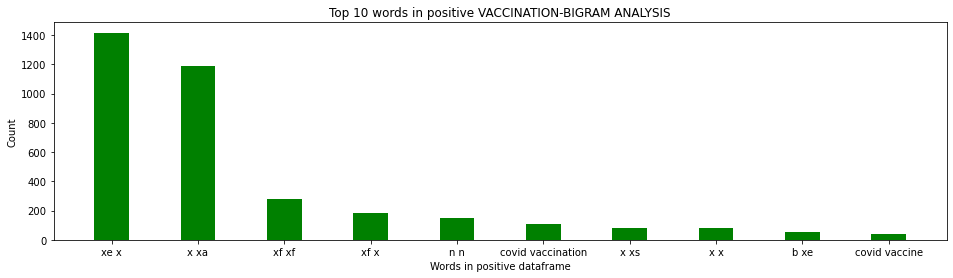

In [82]:
plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)

plt.xlabel("Words in positive dataframe")

plt.ylabel("Count")

plt.title("Top 10 words in positive VACCINATION-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()

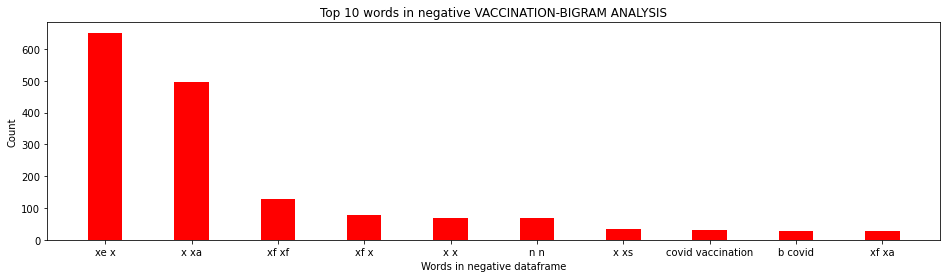

In [83]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative VACCINATION-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

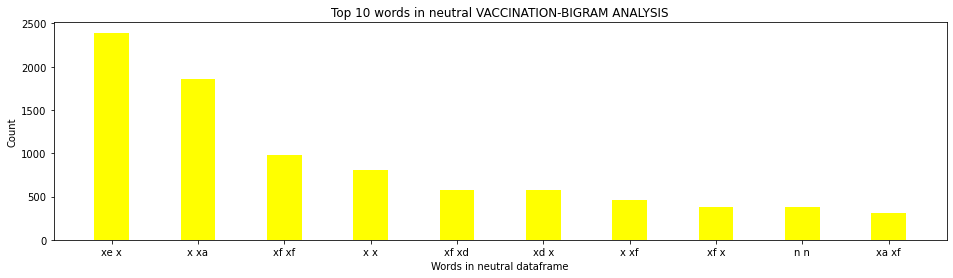

In [84]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral VACCINATION-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

#top 10 bigram neutral | n-grams


In [85]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'xbfalse', 'prophet', 'pope', 'francis', 'declares', 'covid', 'vaccines', 'morally', 'acceptable', 'necessary', 'great', 'good', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'trucking', 'troubles', 'nothing', 'new', 'fresh', 'produce', 'industry', 'recent', 'vaccination', 'mandates', 'gov', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'craigkellymp', 'moved', 'consensus', 'covid', 'vaccination', 'reduces', 'chances', 'becoming', 'severel', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dabawenyos', 'warned', 'particularly', 'cautious', 'face', 'covid', 'increase', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'qatar', 'contribute', 'p', 'million', 'worth', 'vaccines', 'philippines', 'n', 'n']
Sentence after removing stopwords: ['b', 'eu', 'turns', 'contracts', 'accessible', 'us', 'eu', 'experimenting', 'using', 'text', 'messages', 'smileys', 'xe', 'x', 'xa']
Sentence after r

Sentence after removing stopwords: ['b', 'free', 'covid', 'vaccines', 'today', 'san', 'marcos', 'xe', 'x', 'xt', 'wait', 'see', 'xf', 'xf', 'x', 'x', 'covid', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'would', 'love', 'see', 'qualifications', 'posted', 'front', 'statements', 'covid', 'vaccination', 'maskup']
Sentence after removing stopwords: ['b', 'know', 'hpv', 'human', 'papillomavirus', 'vaccination', 'initially', 'considered', 'cost', 'effective', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'top', 'states', 'districts', 'free', 'vaccination', 'slots', 'jan', 'pm', 'nsearch', 'slot', 'get', 'notification', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'well', 'done', 'karnataka', 'dhfwka', 'st', 'dose', 'coverage', 'large', 'state', 'truly', 'commendable', 'kudos', 'involved', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'human', 'got', 'devided', 'religion', 'colors', 'many', 'things', 'currently', 'covi

Sentence after removing stopwords: ['b', 'day', 'covid', 'rough', 'still', 'feeling', 'great', 'tremfya', 'shot', 'due', 'end', 'week', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xb', 'x', 'covid', 'numbers', 'xf', 'xf', 'xb', 'x', 'n', 'covid', 'pune', 'mask', 'amp', 'maintain', 'cab', 'amp', 'vaccination', 'maskuppune', 'n', 'new', 'cases', 'xe', 'xac', 'x', 'xef', 'xb', 'xf', 'n', 'active', 'xe', 'xac', 'x', 'xef', 'xb', 'xf', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'happy', 'second', 'dose', 'booked', 'young', 'tomorrow', 'going', 'great', 'way', 'stathe', 'weekend', 'vaccination', 'kids', 'bcpoli']
Sentence after removing stopwords: ['b', 'aotearoa', 'new', 'zealand', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xbf', 'vaccination', 'xf', 'xf', 'x', 'x', 'performance', 'th', 'feb', 'rd', 'jan', 'months', 'compared', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'policeonguard', 'perhaps', 'truckers', 'pick', 'choose', 'business

Sentence after removing stopwords: ['b', 'polio', 'eradication', 'nnow', 'countries', 'wild', 'poliovirus', 'transmission', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xab', 'amp', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xb', 'n', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xab', 'xf', 'xf', 'x', 'xb', 'paralysed', 'du', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'east', 'west', 'european', 'values', 'eu', 'cultural', 'political', 'preferences', 'psychological', 'mindset', 'impact', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'people', 'blab', 'myocarditis', 'risk', 'great', 'covid', 'point', 'utterly', 'destroys', 'argument', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'public', 'health', 'agency', 'canada', 'review', 'many', 'covid', 'vaccine', 'doses', 'needed', 'considered', 'fully', 'va', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rabies', 'n', 'n', 'xe', 'xad', 'xstill', 'kills', 'yearly', 'n', 'xe', 'xad', 'xends', 'life', 'p

Sentence after removing stopwords: ['b', 'malaysia', 'received', 'first', 'batch', 'pfizer', 'covid', 'vaccine', 'doses', 'kids', 'years', 'age', 'n', 'ndetails', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'boostershots', 'nusa', 'make', 'progress', 'uptodate', 'vaccination', 'xf', 'xf', 'xe', 'x', 'nlast', 'week', 'week', 'adequate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'many', 'clients', 'staff', 'may', 'vaccinated', 'may', 'still', 'undecided', 'chosen', 'get', 'fo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'africa', 'unicef', 'launches', 'first', 'ever', 'u', 'repochallenge', 'boost', 'covid', 'vaccine', 'uptake', 'africa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wow', 'really', 'shows', 'great', 'job', 'ireland', 'done', 'protecting', 'people', 'vaccination', 'nwell', 'done', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'another', 'great', 'achievement', 'n', 'n', 'population', 'vac

Sentence after removing stopwords: ['b', 'high', 'quality', 'potent', 'cbda', 'please', 'retweet', 'like', 'n', 'n', 'adoptmegiveaways', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'u', 'system', 'university', 'illinois', 'springfield', 'uis', 'created', 'new', 'protocols', 'upcoming', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'huge', 'neilyoung', 'joerogan', 'vaccination']
Sentence after removing stopwords: ['b', 'got', 'booster', 'nepean', 'sportsplex', 'super', 'efficient', 'friendly', 'friendly', 'service', 'chance', 'get', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'news', 'early', 'data', 'indicate', 'vaccines', 'still', 'protect', 'omicron', 'xe', 'x', 'xs', 'sister', 'variant', 'ba', 'drewqjoseph', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'homecareassn', 'today', 'written', 'secretary', 'state', 'health', 'social', 'care', 'call', 'regulatio', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'amazing

Sentence after removing stopwords: ['b', 'lessons', 'pandemic', 'xe', 'x', 'x', 'using', 'primary', 'care', 'physicians', 'reach', 'unvaccinated', 'covid', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whoever', 'succeeds', 'australianopen', 'men', 'xe', 'x', 'xs', 'final', 'open', 'shut', 'australian', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'wonderful', 'stato', 'day', 'wake', 'news', 'atlascorps', 'alumni', 'fayyazyaseen', 'leading', 'campa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xb', 'x', 'covid', 'numbers', 'xf', 'xf', 'xb', 'x', 'n', 'covid', 'data', 'pune', 'nwear', 'mask', 'amp', 'maintain', 'cab', 'amp', 'vaccination', 'maskuppune', 'n', 'new', 'cases', 'xe', 'xac', 'x', 'xef', 'xb', 'xf', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'deserve', 'bharatratna', 'n', 'n', 'pmoindia', 'rashtrapatibhvn', 'rssorg', 'amitshah', 'n', 'blsanthosh', 'npls', 'award', 'bharatratna', 'best', 'm

Sentence after removing stopwords: ['b', 'neil', 'young', 'demands', 'spotify', 'remove', 'music', 'xe', 'x', 'xfalse', 'information', 'vaccines', 'xe', 'x', 'x', 'via', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'wave', 'upswing', 'india', 'immunity', 'resulting', 'substantial', 'adult', 'vaccination', 'coverage', 'amp', 'widespr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'apparently', 'getting', 'vaxxed', 'also', 'choking', 'hazard', 'n', 'n', 'greenbay', 'ers', 'aaronrodgers', 'vaccination']
Sentence after removing stopwords: ['b', 'narelleford', 'daughter', 'lives', 'works', 'switzerland', 'xe', 'x', 'xa', 'problem', 'getting', 'xe', 'x', 'xre', 'xe', 'x', 'xac', 'xe', 'x', 'xa', 'available', 'everywhe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lakh', 'new', 'covid', 'infections', 'india', 'witnesses', 'marginal', 'drop', 'cases', 'yesterday', 'indiablooms', 'first', 'p', 'xe', 'x', 'xa']
Sentence after removing stopwords

Sentence after removing stopwords: ['b', 'hour', 'rt', 'pcr', 'covid', 'testing', 'nopen', 'sunday', 'friday', 'pm', 'npfizer', 'amp', 'moderna', 'vaccinations', 'available', 'fr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'get', 'seasonal', 'flu', 'vaccine', 'medical', 'centre', 'high', 'risk', 'developing', 'com', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'greece', 'safety', 'top', 'priority', 'tourism', 'season', 'approaches', 'n', 'n', 'healthnewsnextme', 'besafeeverywhereingreece', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'must', 'see', 'video', 'n', 'hours', 'xe', 'x', 'xt', 'get', 'know', 'nshocking', 'bcse', 'already', 'knew', 'good', 'nwat', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bedford', 'borough', 'council', 'offering', 'free', 'taxi', 'services', 'take', 'bedford', 'borough', 'covid', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'variants', 'increasing', 'uncertainty', '

Sentence after removing stopwords: ['b', 'important', 'vaccination', 'vs', 'nonvaccines', 'even', 'boosterdose', 'important', 'effects', 'cdc', 'information', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'exciting', 'paper', 'cell', 'today', 'alba', 'grifoni', 'alex', 'sette', 'shane', 'crotty', 'et', 'al', 'vaccination', 'allows', 'r', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'giving', 'information', 'union', 'health', 'minister', 'mansukh', 'mandaviya', 'said', 'percent', 'adult', 'population', 'india', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'parents', 'caregivers', 'young', 'children', 'reported', 'hitting', 'pandemic', 'rock', 'bottom', 'unsure', 'g', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'intranasal', 'spike', 'vaccine', 'booster', 'leverages', 'existing', 'immunity', 'generated', 'primary', 'vaccination', 'elicit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ruptly', 'live', 'stream'

Sentence after removing stopwords: ['b', 'comparing', 'corona', 'covid', 'vaccination', 'based', 'great', 'breakthrough', 'technology', 'past', 'years', 'nazi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'find', 'register', 'year', 'old', 'children', 'covid', 'vaccine', 'mysejahtera', 'n', 'nvideo', 'guide', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'pdoocy', 'type', 'question', 'surprised', 'asked', 'yet', 'let', 'first', 'n', 'peterdoocy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'seandeveremd', 'hitweeties', 'craigaspencer', 'scotland', 'luxury', 'high', 'vaccination', 'rate', 'full', 'vacci', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'marshallsteven', 'cityofadelaide', 'surprised', 'many', 'people', 'think', 'completely', 'safe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'hilarious', 'vaccinated', 'shamed', 'unvaccinated', 'people', 'said', 'problem', 'blah', 'blah', 'blah', 'xe

Sentence after removing stopwords: ['b', 'good', 'decision', 'tack', 'sverige', 'vaccination', 'covid']
Sentence after removing stopwords: ['b', 'eldsjal', 'spotify', 'supporting', 'joerogan', 'promote', 'anti', 'vaccine', 'bullshit', 'n', 'spotifydeleted', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'israel', 'test', 'positive', 'quarter', 'tests', 'return', 'positive', 'n', 'n', 'israel', 'coronavirus', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'blouse', 'vaccination', 'memes', 'covid']
Sentence after removing stopwords: ['b', 'kerpen', 'yes', 'covid', 'illness', 'comparatively', 'uncommon', 'children', 'vs', 'adults', 'get', 'sick', 'many', 'chi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'co', 'win', 'app', 'family', 'register', 'using', 'one', 'mobile', 'number', 'covid', 'jabs', 'n', 'cowin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pc', 'india', 'adult', 'population', 'fully', 'vaccinated', 

Sentence after removing stopwords: ['b', 'thanks', 'millions', 'canadians', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xa', 'chose', 'covidvaccine', 'nthanks', 'healthcareworkers', 'go', 'work', 'every', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'healthcare', 'worker', 'interested', 'views', 'vaccination', 'covid', 'please', 'complete', 'r', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'interesting', 'xf', 'xf', 'x', 'x', 'thread', 'xf', 'xf', 'x', 'x', 'n', 'n', 'covidtesting', 'covidvaccine', 'pandemic', 'mitigation', 'vaccinationrates', 'rural', 'urban']
Sentence after removing stopwords: ['b', 'pfizer', 'biontech', 'statrials', 'new', 'omicron', 'specific', 'jab', 'covid', 'coronavirus', 'omicron', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'srinagar', 'heritage', 'tour', 'buses', 'ready', 'attract', 'tourists', 'n', 'travelnews', 'tourist', 'tourism', 'srinagar', 'tour', 'jk', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'test

Sentence after removing stopwords: ['b', 'th', 'covid', 'vaccine', 'amp', 'co', 'win', 'portal', 'putin', 'amp', 'hong', 'kong', 'news', 'britain', 'russia', 'china', 'n', 'nsubscribe', 'scrabbl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'stewpetersshow', 'vax', 'victims', 'overflow', 'morgues', 'bodies', 'fill', 'morgues', 'overflow', 'refrigerated', 'trailers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'aotearoa', 'new', 'zealand', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xbf', 'vaccination', 'xf', 'xf', 'x', 'x', 'performance', 'th', 'feb', 'rd', 'jan', 'months', 'compared', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'interesting', 'story', 'impact', 'trucker', 'vaccination', 'policy', 'canada', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xa', 'bias', 'assuming', 'need', 'xe', 'x', 'xc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'make', 'sure', 'u', 'survive', 'stealth', 'omicron', 'omicron', 'vaccination', 'dont', 

Sentence after removing stopwords: ['b', 'cdcsays', 'naturalimmunity', 'good', 'vaccination', 'msm', 'glossed', 'right', 'next', 'say', 'nee', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'time', 'first', 'second', 'covid', 'jab', 'booster', 'get', 'weekend', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'time', 'end', 'general', 'booster', 'campaigns', 'cases', 'severe', 'covid', 'booster', 'dose', 'cohorts', 'primary', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'awesome', 'another', 'survivor', 'vaccination', 'preventable', 'disease', 'acts', 'jrs', 'nonsense', 'survived', 'stay', 'mont', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'study', 'x', 'risk', 'myocarditis', 'covid', 'vaccination', 'israel', 'national', 'news', 'arutz', 'sheva']
Sentence after removing stopwords: ['b', 'live', 'children', 'india', 'shown', 'modern', 'scientific', 'thinking', 'vaccination', 'program', 'xe', 'x', 'xa']
Sentence after removing stopwo

Sentence after removing stopwords: ['b', 'electricsoul', 'joyannreid', 'right', 'trump', 'fools', 'xe', 'x', 'xa', 'fooled', 'trump', 'got', 'vaccination', 'xe', 'x', 'xs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'rarity', 'added', 'pixel', 'bean', 'generator', 'proud', 'vaccinated', 'n', 'vaccine', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fokusza', 'h', 'sabc', 'south', 'africans', 'refuse', 'vaccination', 'covid', 'denied', 'certain', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'nhsfife', 'shared', 'week', 'available', 'covid', 'drop', 'vaccination', 'clinics', 'still', 'rece', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'snopes', 'xe', 'x', 'xt', 'really', 'matter', 'context', 'walensky', 'says', 'anything', 'nit', 'xe', 'x', 'xs', 'lie', 'xe', 'x', 'xt', 'told', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'th', 'jab', 'done', 'today', 'im', 'immunosuppresed', 'marks',

Sentence after removing stopwords: ['b', 'covid', 'vaccines', 'available', 'lagoon', 'hospitals', 'safe', 'effective', 'n', 'ntake', 'ownership', 'safety', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'family', 'health', 'pato', 'stop', 'covid', 'january', 'wear', 'tight', 'fitting', 'mask', 'get', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'real', 'parents', 'really', 'marylandpublicschools', 'protectthekids', 'covidvaccine']
Sentence after removing stopwords: ['b', 'heading', 'k', 'daily', 'local', 'new', 'cases', 'today', 'probably', 'well', 'k', 'seollal', 'incheon', 'st', 'time', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'top', 'states', 'districts', 'free', 'vaccination', 'slots', 'jan', 'pm', 'nsearch', 'slot', 'get', 'notification', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'facts', 'n', 'nthey', 'safe', 'protective', 'course', 'happy', 'n', 'nyou', 'n', 'n', 'share', 'like', 'comment', 'youth',

Sentence after removing stopwords: ['b', 'first', 'dose', 'progress', 'xf', 'xf', 'x', 'x', 'n', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'n', 'n', 'nsecond', 'dose', 'progress', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'n', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xb', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'momentsindia', 'politicotab', 'xe', 'x', 'xc', 'vaccination', 'strategy', 'based', 'repeated', 'booster', 'original', 'vaccine', 'compositi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'done', 'rd', 'dosis', 'astra', 'zeneca', 'covid', 'vaccination', 'mexico', 'thank', 'wise', 'scie

Sentence after removing stopwords: ['b', 'india', 'achieved', 'vaccination', 'adults', 'feat', 'indians', 'proud', 'congratulations', 'healthc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mommabearma', 'cnn', 'right', 'xe', 'x', 'xs', 'like', 'countries', 'high', 'vaccination', 'rates', 'also', 'hig', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'appointments', 'mostly', 'resume', 'normal', 'thursday', 'n', 'n']
Sentence after removing stopwords: ['b', 'ebay', 'store', 'amp', 'custom', 'decals', 'xf', 'xf', 'x', 'xc', 'positive', 'feedback', 'xf', 'xf', 'xa', 'x', 'ad', 'america', 'american', 'americans', 'usa', 'smallbusiness', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'amazing', 'possibilities', 'hiv', 'patients', 'thanks', 'mdohertyhiv', 'n', 'nlet', 'xe', 'x', 'xs', 'take', 'lesson', 'covid', 'amp', 'stathinking', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'great', 'news', 'yarrenytyarltere', 'community', 'x

Sentence after removing stopwords: ['b', 'covid', 'vaccination', 'going', 'teenagers', 'yrs', 'old', 'youths', 'hurry', 'guys', 'hero', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'far', 'good', 'lessons', 'coronavirus', 'pandemic', 'n', 'n', 'coronavirus', 'coronavirusupdates', 'vaccination']
Sentence after removing stopwords: ['b', 'rare', 'complication', 'anti', 'sarscov', 'vaccination', 'septic', 'arthritis', 'sternoclavicular', 'joint', 'mediasti', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vital', 'yalesph', 'information', 'yaleemd', 'showing', 'covidvaccine', 'reduction', 'sarscov', 'transmission', 'household', 'co', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'booster', 'dose', 'drive', 'launched', 'nurseries', 'tied', 'special', 'people', 'n', 'n', 'kuwait', 'vaccine', 'vaccination', 'n', 'n']
Sentence after removing stopwords: ['b', 'covidvaccine', 'killing', 'people', 'lot', 'people', 'nbanned', 'dr', 'tells', 'real', 'story']
Sent

Sentence after removing stopwords: ['b', 'truckers', 'across', 'country', 'heading', 'ottawa', 'major', 'protest', 'mandatory', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'neilyoung', 'joerogan', 'old', 'man', 'meme', 'know', 'coming', 'bothered', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'know', 'whole', 'cell', 'pertussis', 'vaccine', 'failed', 'give', 'full', 'protection', 'disease', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'drzax', 'wow', 'maybe', 'xe', 'x', 'xscientists', 'xe', 'x', 'x', 'actually', 'know', 'trust', 'regarding', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ridiculous', 'experienced', 'impacts', 'covid', 'within', 'florida', 'department', 'health', 'various', 'counties', 'en', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cabinet', 'division', 'announced', 'set', 'restrictions', 'curb', 'spread', 'covid', 'effective', 'january', 'xe', 'x', 'xa']
Sentence after removing stopwor

Sentence after removing stopwords: ['b', 'full', 'vaccination', 'doses', 'full', 'protection', 'multisystem', 'inflammatory', 'syndrome', 'children', 'mis', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'wave', 'upswing', 'india', 'immunity', 'resulting', 'substantial', 'adult', 'vaccination', 'coverage', 'amp', 'widespr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'eurosurveillanc', 'new', 'issue', 'eurosurveillance', 'published', 'n', 'n', 'publichealth', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'congratulations', 'jimmyg', 'replacing', 'dr', 'fauci', 'aaronrodgers', 'least', 'favorite', 'italian', 'n', 'n', 'aaronrodgers', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'discussion', 'topic', 'including', 'vaccination', 'violence']
Sentence after removing stopwords: ['b', 'picture', 'worth', 'thousand', 'words', 'hang', 'everyone', 'heading', 'right', 'direction', 'get', 'covid', 'xe', 'x', 'xa']
Sentence 

Sentence after removing stopwords: ['b', 'happy', 'first', 'vaccination', 'anniversary', 'shout', 'astrazeneca', 'generation', 'xf', 'xf', 'xa', 'xb']
Sentence after removing stopwords: ['b', 'vaccines', 'work', 'chaos', 'around', 'us', 'seems', 'like', 'perfect', 'time', 'revisit', 'wonderful', 'artic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccinate', 'remain', 'safe', 'covid', 'please', 'find', 'list', 'vaccination', 'centres', 'today', 'th', 'january', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dammit', 'dang', 'like', 'friends', 'covid', 'right', 'covid', 'omicron', 'getvaccinatednow', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'findings', 'two', 'new', 'studies', 'us', 'norway', 'reassuring', 'changes', 'menstrual', 'cycle', 'occur', 'fol', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'many', 'countries', 'indopacific', 'struggle', 'meet', 'vaccination', 'targets', 'india', 'could', 'spearhead', 

Sentence after removing stopwords: ['b', 'health', 'minister', 'says', 'situation', 'remain', 'control', 'due', 'high', 'vaccination', 'rate', 'n', 'n', 'mnow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccinations', 'end', 'discrimination', 'covid', 'patients', 'china', 'new', 'evidence', 'recovered', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yes', 'covid', 'illness', 'comparatively', 'uncommon', 'children', 'vs', 'adults', 'get', 'sick', 'many', 'children', 'suf', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'covid', 'successfully', 'implemented', 'lka', 'mark', 'milestone', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'reports', 'new', 'covid', 'cases', 'deaths', 'recoveries', 'last', 'hours', 'n', 'nactive', 'case', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'first', 'dose', 'vaccination', 'coverage', 'second', 'dose', 'coverage', 'country', 'far', 'lakh', 'eligible

Sentence after removing stopwords: ['b', 'jammuandkashmir', 'health', 'department', 'team', 'collaboration', 'army', 'conduct', 'vaccination', 'drive', 'villages', 'near', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'anyone', 'notice', 'half', 'population', 'thinks', 'research', 'right', 'wing', 'conspiracy', 'theory', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tedcruz', 'looks', 'like', 'difference', 'people', 'per', 'million', 'different', 'statistically', 'would', 'nice', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'obligation', 'health', 'sector', 'action', 'agreed', 'vaccination', 'refusers', 'flood', 'newspapers', 'job', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'blk', 'presents', 'xe', 'x', 'xcvax', 'thang', 'xe', 'x', 'xd', 'ft', 'juvenile', 'mannie', 'fresh', 'mia', 'x', 'via', 'youtube', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'act', 'vaccination', 'update', 'nmonday', 'january', 'n',

Sentence after removing stopwords: ['b', 'new', 'zealand', 'pm', 'jacinda', 'ardern', 'cancels', 'wedding', 'due', 'omicron', 'surge', 'n', 'newzealand', 'pm', 'omicron', 'covid', 'vaccination', 'n']
Sentence after removing stopwords: ['b', 'cnbc', 'new', 'ba', 'covid', 'variant', 'times', 'contagious', 'omicron', 'already', 'circulating', 'almost', 'half', 'us', 'new', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'expect', 'busy', 'vaccination', 'training', 'january', 'nationwide', 'open', 'courses', 'month', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'live', 'look', 'abrahamlincoln', 'today', 'washingtondc', 'n', 'n', 'donotcomply', 'defeatthemandates', 'freedomrally', 'covidiot', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'still', 'booster', 'st', 'nd', 'dose', 'covidvaccine', 'important', 'come', 'forward', 'soon', 'n', 'ndr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'malaysia', 'health', 'minister', 'khairykj', 'recommend

In [86]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['b', 'pure', 'evil', 'ishere', 'satan', 'g', 'vaccination', 'vaccinatie']
Sentence after removing stopwords: ['b', 'annoying', 'hopefully', 'jabs', 'make', 'mild', 'xe', 'x', 'xm', 'though', 'xe', 'x', 'xa', 'n', 'booster', 'omicron', 'covid', 'covidvaccine']
Sentence after removing stopwords: ['b', 'due', 'cold', 'climate', 'change', 'experiencing', 'people', 'usually', 'prone', 'flu', 'harmattan', 'season', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'louisiana', 'vaccine', 'stalemate', 'long', 'road', 'ahead', 'state', 'vaccination', 'rate', 'stagnated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pnp', 'active', 'cases', 'dropped', 'k', 'recoveries', 'n', 'n', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'begin', 'vaccinating', 'children', 'aged', 'coronavirus', 'february', 'end', 'xf', 'xf', 'x', 'x', 'n', 'nread', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ensure', 'v

Sentence after removing stopwords: ['b', 'never', 'universalstudios', 'check', 'late', 'video', 'help', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'virus', 'links', 'coronavirus', 'coronavirus', 'covid', 'pandemic', 'unnecessary', 'deaths', 'vaccination', 'cdcchanges', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'thing', 'stupid', 'vaccinated', 'people', 'unfriending', 'unvaccinated', 'people', 'n', 'nis', 'n', 'nunvaccinated', 'people', 'unfriend', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bharatrao', 'sambitswaraj', 'circulating', 'fake', 'narrative', 'toolkit', 'socialmedia', 'distorting', 'image', 'india', 'cul', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'strange', 'n', 'n', 'pandemicfatigue', 'n', 'postpandemic', 'n', 'covidvaccine', 'n', 'paradoxlive']
Sentence after removing stopwords: ['b', 'late', 'stats', 'vichealth', 'revealing', 'surprise', 'unvaccinated', 'people', 'make', 'majo', 'xe', 'x', 'xa']
Sentence 

Sentence after removing stopwords: ['b', 'nj', 'gov', 'phil', 'murphy', 'said', 'getting', 'vaccinated', 'irresponsible', 'n', 'xe', 'x', 'xci', 'think', 'xe', 'x', 'xs', 'akin', 'drunk', 'driving', 'xe', 'x', 'xd', 'sai', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'forgot', 'wife', 'xe', 'x', 'xs', 'birthday', 'try', 'xe', 'x', 'xcsupply', 'chain', 'issues', 'xe', 'x', 'xd', 'excuse', 'n', 'n', 'covid', 'n', 'truckers', 'n', 'vaccination']
Sentence after removing stopwords: ['b', 'trying', 'get', 'number', 'pmoindia', 'issuing', 'fake', 'vaccination', 'certificates', 'n', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'masks', 'vaccination', 'protects', 'children', 'amp', 'vulnerable', 'populations', 'n', 'children', 'vaccination', 'masks', 'n', 'n', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xf', 'xbd', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xf', 'xbd', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xf', 'xbd']
Sentence after removing stopwords: ['b', 'aaron', 'rodgers', 'righ

Sentence after removing stopwords: ['b', 'course', 'ample', 'room', 'improvement', 'remains', 'vaccination', 'coverage', 'region', 'completed', 'least', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'know', 'xe', 'x', 'xm', 'late', 'party', 'joe', 'rogan', 'dr', 'malone', 'xf', 'xf', 'xa', 'xaf', 'anyone', 'explain', 'listen', 'dr', 'h', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'always', 'carry', 'vaccination', 'certificate', 'negative', 'covid', 'test', 'travelling', 'per', 'airline', 'rules', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccine', 'vaccinesideeffects', 'vaccination', 'vaccinedeaths', 'vaccinepassports', 'vaccineswork', 'n', 'nthe', 'long', 'term', 'effects', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dr', 'roger', 'hodkinson', 'gig', 'got', 'number', 'n', 'n', 'late', 'public', 'get', 'grips', 'much', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'xa', 'boosterdose', 'vaccination'

Sentence after removing stopwords: ['b', 'omicron', 'wave', 'begun', 'malaysia', 'number', 'xc', 'xacovid', 'cases', 'country', 'expected', 'xc', 'xato', 'rise', 'xc', 'xasaid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'nathanmackbrown', 'wish', 'nothing', 'ill', 'thoughts', 'prayers', 'vaccination']
Sentence after removing stopwords: ['b', 'two', 'dose', 'passpo', 'almost', 'worthless', 'ottawa', 'area', 'public', 'health', 'experts', 'would', 'like', 'see', 'province', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xe', 'x', 'xs', 'late', 'get', 'st', 'nd', 'booster', 'covidvaccine', 'xf', 'xf', 'x', 'x', 'n', 'nbook', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'less', 'vaccination', 'deaths', 'africa', 'vaccination', 'deaths', 'developed', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'people', 'disappointed', 'ceo', 'carhartt', 'mandating', 'workers', 'covid', 'vaccination', 'justice']

Sentence after removing stopwords: ['b', 'words', 'visit', 'sick', 'kid', 'hospital', 'unless', 'covidvaccine', 'beyond', 'sick', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'uptodate', 'adequate', 'vaccination', 'n', 'nstates', 'bad', 'covid', 'vaccination', 'rates', 'n', 'n']
Sentence after removing stopwords: ['b', 'read', 'newblogpost', 'medium', 'first', 'two', 'covid', 'jabs', 'made', 'ill', 'xe', 'x', 'xahere', 'xe', 'x', 'xs', 'went', 'back', 'third', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'york', 'times', 'changes', 'tune', 'xe', 'x', 'xadmits', 'unvaccinated', 'less', 'risk', 'vaccinated']
Sentence after removing stopwords: ['b', 'googlemaps', 'googlede', 'vaccination', 'center', 'technical', 'university', 'berlin', 'still', 'pending', 'since', 'weeks', 'googl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'starkly', 'increases', 'pregnancy', 'complications', 'including', 'stillbirths', 'among', 'unvaccinated', 'sc

Sentence after removing stopwords: ['b', 'fake', 'vaccination', 'cards', 'get', 'charged', 'felony', 'might', 'get', 'jail', 'time', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'albany', 'county', 'residents', 'received', 'least', 'first', 'dose', 'covid', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sunderland', 'boss', 'leejohnson', 'claims', 'covid', 'vaccine', 'could', 'behind', 'goalkeeper', 'leeburge', 'ruled', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'would', 'get', 'vaccination', 'vaccination', 'corona', 'survivable', 'xe', 'x', 'xa', 'saw', 'many', 'got', 'really', 'sick', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'confused', 'help', 'understand', 'brooklyn', 'sf', 'mandatory', 'vaccine', 'mandates', 'inside', 'places', 'like', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xcaverage', 'number', 'americans', 'receiving', 'booster', 'shots', 'daily', 'cut', 'half', 'december', 'peak',

Sentence after removing stopwords: ['b', 'examine', 'cognitivedissonance', 'nit', 'late', 'getvaccinated', 'scicomm', 'sciencecommunication', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'infection', 'may', 'low', 'long', 'covid', 'symptoms', 'study', 'n', 'n', 'vaccination', 'infection', 'covidsymptoms', 'yespunjab', 'n', 'n']
Sentence after removing stopwords: ['b', 'three', 'jabs', 'green', 'tick', 'likely', 'victoria', 'says', 'premier', 'andrews', 'n', 'xf', 'xf', 'x', 'x', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ontario', 'ndp', 'calling', 'investigation', 'gov', 'xe', 'x', 'xt', 'xe', 'x', 'xs', 'move', 'hand', 'private', 'covid', 'testing', 'firm', 'contra', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'health', 'ministry', 'experts', 'recommend', 'scrapping', 'green', 'pass', 'watch', 'also', 'related', 'interview', 'erro', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sad', 'see', 'mds', 'still'

Sentence after removing stopwords: ['b', 'us', 'continues', 'bad', 'hit', 'country', 'n', 'n', 'coronavirusupdates', 'coronaviruspandemic', 'covid', 'vaccination', 'n']
Sentence after removing stopwords: ['b', 'globally', 'late', 'vaccination', 'rate', 'per', 'day', 'includes', 'people', 'getting', 'first', 'sho', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'new', 'york', 'times', 'changes', 'tune', 'xe', 'x', 'xadmits', 'unvaccinated', 'less', 'risk', 'vaccinated']
Sentence after removing stopwords: ['b', 'update', 'wife', 'week', 'apart', 'tested', 'negative', 'yesterday', 'first', 'time', 'week', 'though', 'seeme', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'idiots', 'n', 'ndoes', 'include', 'employers', 'n', 'nnew', 'bill', 'would', 'make', 'crime', 'ask', 'someone', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'whitehouse', 'still', 'stockpiles', 'need', 'pushed', 'americans', 'even', 'effectiveness', 'minimal', 'xe', 'x', '

Sentence after removing stopwords: ['b', 'people', 'aged', 'self', 'schedule', 'boosterdose', 'covidvaccine', 'n', 'nfind', 'link', 'artic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'michaelcvo', 'johnrich', 'maybe', 'learn', 'spell', 'xe', 'x', 'xcisrael', 'xe', 'x', 'xd', 'spouting', 'someone', 'xe', 'x', 'xcfuckin', 'wrong', 'xe', 'x', 'xd', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'make', 'bad', 'person', 'every', 'person', 'xe', 'x', 'xs', 'covidvaccine', 'catches', 'covid', 'make', 'feel', 'vi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'auschwitzmuseum', 'bkopernikus', 'oneunderscore', 'disturbing', 'ease', 'terms', 'like', 'genocide', 'get', 'used', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'find', 'chilling', 'holocaustmemorialday', 'protection', 'disabled', 'people', 'covid', 'uk', 'b', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fake', 'news', 'nthat', 'lots', 'stupied', 'brain', 'washed', 'ppl'

Sentence after removing stopwords: ['b', 'evil', 'cuck', 'never', 'stop', 'xf', 'xf', 'xb', 'x', 'coz', 'agenda', 'kill', 'population', 'xe', 'x', 'xs', 'calm', 'storm', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'late', 'issue', 'given', 'extent', 'asymptomatic', 'infection', 'caused', 'omicronvariant', 'restrictions', 'mobility', 'amp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'update', 'n', 'n', 'xf', 'xf', 'x', 'x', 'cr', 'vaccine', 'doses', 'administered', 'far', 'n', 'n', 'xf', 'xf', 'x', 'xindia', 'active', 'caseload', 'currently', 'stand', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccine', 'xe', 'xc', 'x', 'nbooster', 'last', 'week', 'xe', 'xc', 'x', 'n', 'negative', 'antigens', 'week', 'including', 'day', 'pcr', 'xe', 'xc', 'x', 'n', 'randoxofficial', 'pcr', 'travel', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'watch', 'video', 'health', 'dept', 'facilitate', 'covid', 'vaccination', 'drive', 'j', 'k', 'b

Sentence after removing stopwords: ['b', 'opinion', 'high', 'cost', 'disparaging', 'naturalimmunity', 'covid', 'vaccines', 'wasted', 'xe', 'x', 'xt', 'need', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cnn', 'drug', 'cartels', 'hypocrite', 'media', 'peddling', 'lie', 'misleading', 'people', 'endless', 'pandemic', 'covid', 'nonsense', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'criminal', 'nhsmandate', 'pressurises', 'people', 'get', 'vaccinated', 'vaccination', 'known', 'cause', 'injurie', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'baseballfirst', 'halfmykingdom', 'news', 'blood', 'clots', 'common', 'nw', 'birth', 'control', 'xe', 'x', 'xa', 'nand', 'covid', 'n', 'nif', 'xe', 'x', 'xre', 'wo', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'breaking', 'unvaccinated', 'people', 'children', 'years', 'allowed', 'delhi', 'republic', 'day', 'parade', 'n', 'delhi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['

In [87]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['b', 'call', 'delay', 'compulsory', 'covid', 'vaccines', 'nhs', 'staff', 'feel', 'like', 'vaccination', 'needs', 'mandate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccines', 'fertility', 'need', 'know', 'tarahaelle', 'via', 'medium', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'boostershots', 'n', 'uptodate', 'xf', 'xf', 'x', 'xba', 'xf', 'xf', 'x', 'xb', 'vaccination', 'january', 'th', 'n']
Sentence after removing stopwords: ['b', 'headed', 'towards', 'endemic', 'n', 'nhere', 'epidemiologists', 'immunologists', 'evolutionary', 'biologists', 'hav', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'overall', 'vaccinations', 'fallen', 'even', 'daily', 'case', 'numbers', 'rise', 'n', 'n', 'sachinmampatta', 'reports', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'list', 'cvc', 'n', 'kamrupmetropolitan', 'n', 'staysafe', 'n', 'largestvaccinationdrive', 'n', 'turnfortheteens', 'xe', 'x', 'xa'

Sentence after removing stopwords: ['b', 'vaccination', 'centers', 'open', 'n', 'covid', 'coronavirus', 'srilanka', 'deltavariant', 'vaccinationdrivesl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'countries', 'fully', 'vaccinated', 'indians', 'travel', 'n', 'travelupdates', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'union', 'health', 'minister', 'shri', 'mansukhmandviya', 'reviews', 'public', 'health', 'preparedness', 'covid', 'vaccination', 'progres', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'conservs', 'speak', 'abortion', 'one', 'side', 'mouth', 'medicalfreedom', 'side', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'herd', 'immunity', 'nthis', 'place', 'n', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xb', 'bahamas', 'n', 'fully', 'vaccinated', 'nas', 'n', 'ntake', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tafrishaala', 'prime', 'time', 'n', 'n', 'snowstorm', 'us', 'hongkong', 'xe', 'x'

Sentence after removing stopwords: ['b', 'mdlhenning', 'currently', 'applying', 'doses', 'sarscov', 'vaccine', 'children', 'yo', 'coronavac', 'w', 'interval', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'looked', 'states', 'lg', 'state', 'mask', 'mandates', 'pt', 'difference', 'vaccines', 'rate', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'recently', 'caught', 'miltonpark', 'based', 'company', 'emergexvaccines', 'learning', 'team', 'xe', 'x', 'xs', 'work', 'tr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lot', 'vaccination', 'opportunities', 'week', 'n', 'nwe', 'vaccinations', 'amp', 'boosters', 'pm', 'w', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'comedian', 'actor', 'louieanderson', 'die', 'covid', 'vaccine', 'booster', 'dose', 'n', 'nhere', 'facts', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jarrad', 'doc', 'rat', 'dr', 'docrat', 'covid', 'immunisation', 'vaccination']
Sentence after removing stopwords: ['b

Sentence after removing stopwords: ['b', 'xf', 'xf', 'xc', 'xe', 'global', 'covid', 'vaccine', 'rollout', 'n', 'n', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xf', 'xf', 'xf', 'xa', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'xe', 'xac', 'xc', 'estimate', 'n', 'nvaccine', 'doses', 'deployed', 'b', 'nthe', 'rollout', 'see', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'theage', 'greghuntmp', 'lisavisentin', 'xe', 'x', 'xt', 'enough', 'vaccines', 'vaccinate', 'children', 'enough', 'go', 'around', 'le', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'unvaccinated', 'man', 'denied', 'heatransplant', 'boston', 'hospital', 'let', 'die', 'say', 'suppocovid', 'mandates', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'government', 'global', 'fascistic', 'm

Sentence after removing stopwords: ['b', 'since', 'vaccination', 'children', 'began', 'nilgiris', 'district', 'administered', 'vaccine', 'doses', 'student', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'updates', 'n', 'covid', 'omicronvariant', 'coronavirus', 'coronavirusupdates', 'vaccination', 'newssting', 'n', 'n']
Sentence after removing stopwords: ['b', 'italy', 'ease', 'covid', 'restrictions', 'europeanunion', 'countries', 'feb', 'travellers', 'need', 'greenpass', 'showi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'urban', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'n', 'covishield', 'dose', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gauteng', 'weekend', 'public', 'vaccination', 'sites', 'n', 'na', 'total', 'public', 'vaccination', 'sites', 'operational', 'gauteng', 'pr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'xa', 'xa', 'xef', 'xb', 'xf', 'video', 'english', 'n', 'co

Sentence after removing stopwords: ['b', 'pfizer', 'launches', 'study', 'omicron', 'specific', 'covid', 'vaccine', 'know', 'risk', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'recommendations', 'simplified', 'pneumococcal', 'vaccination']
Sentence after removing stopwords: ['b', 'itsinurface', 'almost', 'poisons', 'medicine', 'packageinse', 'packageinserts', 'n', 'np', 'kn', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccine', 'drive', 'girls', 'occasion', 'nationalgirlchildday', 'vaccination', 'bjp', 'maharashtra', 'girishcharde', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rural', 'bengaluru', 'covidvaccine', 'availability', 'nfree', 'slots', 'n', 'covishield', 'dose', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccination', 'lead', 'impotence', 'n', 'nvideo', 'adverseeffects', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xc', 'xd', 'global', 'covid', 'vaccine', 'rollout', 'n', 'n'

Sentence after removing stopwords: ['b', 'v', 'punjabi', 'grill', 'family', 'run', 'restaurant', 'known', 'indian', 'delicacies', 'since', 'january', 'scores', 'peop', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'parties', 'amp', 'get', 'together', 'wait', 'vaccination', 'xf', 'xf', 'x', 'x', 'n', 'n', 'xe', 'xb', 'xe', 'xe', 'xb', 'xa', 'xe', 'xb', 'xd', 'xe', 'xb', 'xb', 'xe', 'xb', 'xaf', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'vaccination', 'xe', 'xb', 'xe', 'xe', 'xb', 'xf', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xd', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'x', 'xbc', 'xef', 'xb', 'xf', 'n', 'nkeep', 'following', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'menstrual', 'cups', 'market', 'vietnam', 'witness', 'rise', 'revenues', 'n', 'menstrual', 'cups', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'jarrad', 'covid', 'shot', 'doc', 'rat', 'dr', 'docrat'

Sentence after removing stopwords: ['b', 'indirect', 'protection', 'children', 'sars', 'cov', 'infection', 'parental', 'vaccination', 'sciencemagazine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'covid', 'vaccination', 'update', 'jan', 'pm', 'nview']
Sentence after removing stopwords: ['nan']
Sentence after removing stopwords: ['b', 'data', 'around', 'county', 'state', 'xe', 'xe', 'xa', 'xef', 'xb', 'xf', 'buckscountynews', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'conversation', 'omicron', 'regarding', 'pandemic', 'even', 'preparing', 'next', 'one', 'dr', 'da', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'abcnews', 'back', 'schools', 'policy', 'longcovidkids', 'infected', 'recover', 'become', 'infected', 'take', 'pic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'program', 'israel', 'succeded', 'reducing', 'transmission', 'sarscov', 'virus', 'hospitalis', 'xe', 'x', 'xa']
Sentence after removing stopw

Sentence after removing stopwords: ['b', 'book', 'covidvaccine', 'booster', 'appointment', 'online', 'vaccination', 'centres', 'offering', 'online', 'book', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccines', 'save', 'lives', 'covidvaccine', 'covidbooster', 'omicron']
Sentence after removing stopwords: ['b', 'xc', 'xa', 'billion', 'xc', 'xadoses', 'xc', 'xahave', 'administered', 'across', 'xc', 'xa', 'xc', 'xacountries', 'according', 'data', 'collected', 'bloomberg', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'coronavirus', 'ethiopia', 'united', 'states', 'shares', 'additional', 'doses', 'pfizer', 'vaccine', 'ethiopia', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'comparing', 'vaccine', 'mandate', 'holocaust', 'need', 'educate', 'self', 'declared', 'f', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccination', 'stats']
Sentence after removing stopwords: ['b', 'governments', 'world', 'ended', 'dealing', 'covid', 'pan

Sentence after removing stopwords: ['b', 'get', 'booster', 'dose', 'eligible', 'n', 'nbook', 'slot', 'simpleekare', 'ncontact', 'us', 'n', 'n', 'n', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'covid', 'vaccination', 'awareness', 'vehicle', 'flagged', 'pheo', 'mo', 'purusottampur', 'create', 'awareness', 'e', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'hi', 'carhartt', 'fyi', 'thinking', 'upgrading', 'wardrobe', 'get', 'jacket', 'clothes', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'head', 'med', 'mapharmacy', 'borehamwood', 'st', 'nd', 'booster', 'jab', 'nwith', 'pfizer', 'moderna', 'astrazenica', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'breaking', 'covid', 'centre', 'reviews', 'situation', 'states', 'ut', 'n', 'n', 'mansukhmandviya', 'reviews', 'public', 'health', 'preparedness', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ever', 'attended', 'football', 'match', 'paramedics', 'deal', 'medical',

Sentence after removing stopwords: ['b', 'podcast', 'host', 'joerogan', 'clarifies', 'vaccination', 'comments', 'anti', 'vax', 'current', 'us', 'vicepresident', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'worldbank', 'expresses', 'concern', 'continuing', 'risk', 'covid', 'impact', 'angola', 'adopts', 'restrictive', 'measures', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gis', 'representation', 'covid', 'scenario', 'india', 'th', 'jan', 'prepared', 'csirneeri', 'ntotal', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'number', 'instances', 'covid', 'ncr', 'peaked', 'according', 'doh', 'secretary', 'n', 'n']
Sentence after removing stopwords: ['b', 'big', 'thank', 'stjohnpeople', 'week', 'suppoacross', 'communities', 'xe', 'x', 'xre', 'today', 'sup', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'helpful', 'infographic', 'made', 'dr', 'fawley', 'comparing', 'symptoms', 'associated', 'covid', 'infection', 'compared', 'xe'

Sentence after removing stopwords: ['b', 'indiafightscorona', 'n', 'n', 'xf', 'xf', 'x', 'xd', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xf', 'lakh', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xf', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xe', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xf', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xf', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xd', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 

Sentence after removing stopwords: ['b', 'november', 'already', 'vaccinated', 'covishield', 'vaccination', 'covidvaccine']
Sentence after removing stopwords: ['b', 'elon', 'musk', 'praises', 'boasts', 'anti', 'vaccine', 'rally', 'canada', 'n', 'canada', 'elonmusk', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'oshadol', 'withdrawn', 'vaccination', 'testing', 'ets', 'next', 'employers', 'employees', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'omicron', 'shows', 'time', 'update', 'covid', 'vaccines', 'variant', 'specific', 'boosters', 'could', 'build', 'prior', 'immun', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'job', 'vacancy', 'vaccination', 'administration', 'suppo', 'lancshospitals', 'n', 'n', 'xe', 'xf', 'xb', 'closing', 'n', 'nread', 'apply', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'vaccination', 'nadministration', 'suppo', 'closes', 'matron', 'theatres', 'closes', 'xe', 'x', 'xa']
Sentence after re

Sentence after removing stopwords: ['b', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'xe', 'x', 'x', 'n', 'xf', 'xf', 'x', 'x', 'doses', 'administered', 'n', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'x', 'x', 'fully', 'vaccinated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'us', 'sends', 'million', 'covid', 'vaccine', 'doses', 'bangladesh']
Sentence after removing stopwords: ['b', 'coming', 'n', 'n', 'lies', 'vaccination']
Sentence after removing stopwords: ['b', 'get', 'vaccinated', 'comfoof', 'home', 'healthathomes', 'download', 'app', 'n', 'n']
Sentence after removing stopwords: ['b', 'aaronrodgers', 'vaccinations', 'nothing', 'aaronrodgers', 'vaccination', 'greenbay', 'newqb', 'findawinner']
Sentence after removing stopwords: ['b', 'comedy', 'writes', 'vaccination']
Sentence after removing stopwo

Sentence after removing stopwords: ['b', 'xe', 'x', 'xt', 'risk', 'get', 'flu', 'jab', 'protect', 'around', 'getting', 'flu', 'vaccination', 'offer', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'total', 'doses', 'covid', 'vaccines', 'donated', 'city', 'government', 'makati', 'five', 'local', 'government', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'build', 'immunity', 'beat', 'covid', 'n', 'lungsrlife', 'n', 'n', 'covid', 'omicron', 'virus', 'covid', 'wuhan', 'covidvaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'ntf', 'exec', 'coordinate', 'lgus', 'procuring', 'vaccines', 'pharmacies', 'n', 'n', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dana', 'white', 'schools', 'journalist', 'covid', 'treatments', 'n', 'n', 'fauciliedmillionsdied', 'fauci', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tirunelveli', 'municipal', 'corporation', 'commissioner', 'b', 'vishnu', 'chandran', 'ias', 'flagging', 'l

Sentence after removing stopwords: ['b', 'living', 'global', 'totalitarianism', 'n', 'questions', 'covid', 'tribe', 'vaccination']
Sentence after removing stopwords: ['b', 'central', 'government', 'likely', 'issue', 'advisory', 'soon', 'reopening', 'schools', 'n', 'n', 'covid', 'vaccination', 'n']
Sentence after removing stopwords: ['b', 'urban', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots']
Sentence after removing stopwords: ['b', 'got', 'booster', 'nwith', 'continuous', 'efforts', 'battle', 'covid', 'sis', 'frontline', 'workers', 'taken', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'go', 'n', 'covidiot', 'vaccination', 'covid', 'covid', 'covid', 'coronavirus', 'omicroninindia', 'coronavirusupdates']
Sentence after removing stopwords: ['b', 'going', 'anywhere', 'weekend', 'convoy', 'actually', 'makes', 'ottawacity', 'one', 'else', 'e', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'spotify', 'another', 'anti', 'covid',

Sentence after removing stopwords: ['b', 'xe', 'xb', 'xc', 'xe', 'xb', 'xaf', 'xe', 'xb', 'xa', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'xb', 'xe', 'xb', 'xbf', 'xe', 'xb', 'xa', 'xe', 'xb', 'xbe', 'xe', 'xb', 'xa', 'xe', 'xb', 'xb', 'xe', 'xb', 'xad', 'xe', 'xb', 'xbe', 'xe', 'xb', 'x', 'xe', 'xb', 'xd', 'xe', 'xb', 'xb', 'xe', 'xb', 'x', 'xe', 'xb', 'xa', 'xe', 'xb', 'xd', 'xe', 'xb', 'xb', 'xe', 'xb', 'xb', 'xe', 'xb', 'xd', 'xe', 'xb', 'xaf', 'xe', 'xb', 'xbe', 'xe', 'xb', 'xaa', 'xe', 'xb', 'xd', 'xe', 'xb', 'xa', 'xe', 'xb', 'xbf', 'xe', 'xb', 'xaf', 'xe', 'xb', 'xb', 'xe', 'xb', 'xd', 'xe', 'xb', 'xb', 'xe', 'xb', 'xbf', 'xe', 'xb', 'xa', 'xe', 'xb', 'xbf', 'xe', 'xb', 'xa', 'xe', 'xb', 'xbe', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'x', 'xe', 'xb', 'xa', 'xe', 'xb', 'x', 'xe', 'xb', 'x', 'xe', 'xb', 'xb', 'xe', 'xb', 'xb', 'xe', 'xb', 'xbf', 'xe', 'xb', 'xa', 'xe', 'xb', 'xd', 'xe', 'xb', 'xb', 'xe', 'xb', 'xb', 'xe', 'xb', 'xbf', 'xe', 'xb', 'x',

Sentence after removing stopwords: ['b', 'masked', 'wonder', 'next', 'covid', 'shot', 'go', 'employer', 'inevitably', 'makes', 'get', 'one', 'xe', 'x', 'xm', 'expecting', 'signi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'follow', 'money', 'covidvaccine']
Sentence after removing stopwords: ['b', 'obtain', 'covid', 'coronavirus', 'test', 'n', 'n', 'sarscov', 'diagnostic', 'antigen', 'vaccination', 'infection', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rat', 'debacle', 'like', 'echo', 'xe', 'x', 'xa', 'scottmorrisonmp', 'xe', 'x', 'xa', 'covid', 'vaccine', 'procurement', 'amp', 'vaccination', 'rollout', 'stil', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'lawfulrebellin', 'tdsb', 'voted', 'favour', 'mandatory', 'vaccination', 'students', 'despite', 'risks', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'irish', 'government', 'announces', 'fully', 'lift', 'covid', 'restrictions', 'n', 'omicron', 'vaccination', 'xe', 'x', 'xa']
Se

Sentence after removing stopwords: ['b', 'dont', 'open', 'school', 'untill', 'vaccination', 'children', 'done', 'fully', 'n', 'novaccinationnoschool', 'n', 'nbut', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'singular', 'focus', 'covid', 'vaccination', 'disrupted', 'routine', 'immunization', 'programs', 'around', 'world', 'according', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'us', 'donates', 'million', 'covid', 'vaccines', 'nations', 'biden', 'administration', 'n']
Sentence after removing stopwords: ['b', 'aashwasan', 'campaign', 'also', 'begins', 'phased', 'launch', 'assam', 'starting', 'today', 'encourage', 'activecasefinding', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'urban', 'bengaluru', 'covidvaccine', 'availability', 'nfree', 'slots', 'npaid', 'slots', 'n', 'covishield', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'back', 'london', 'sunday', 'th', 'feb', 'vaccination', 'training', 'still', 'places', 'left', 'gr

Sentence after removing stopwords: ['b', 'closing', 'ggv', 'campus', 'done', 'corona', 'vaccination', 'survey', 'amp', 'awareness', 'n', 'youth', 'coronavirus', 'nss', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'violates', 'basic', 'democratic', 'values', 'sc', 'quashes', 'maha', 'bjp', 'mlas', 'one', 'year', 'suspension']
Sentence after removing stopwords: ['b', 'need', 'learn', 'india', 'folks', 'n', 'nin', 'country', 'india', 'whatsapp', 'message', 'number', 'pdf', 'vacci', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'anti', 'vaxxer', 'called', 'fauci', 'power', 'tripping', 'lying', 'freak', 'backed', 'trump', 'called', 'vaccines', 'bull', 'shid', 'amp', 'told', 'pe', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'reduced', 'neutralization', 'omicron', 'variant', 'fully', 'immunized', 'adolescents', 'bntb', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'want', 'thank', 'boycotting', 'crying', 'snowflakes', 'bringing', '

Sentence after removing stopwords: ['b', 'bbmp', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots']
Sentence after removing stopwords: ['b', 'covid', 'pace', 'vaccination', 'slowing', 'among', 'kids', 'age', 'group', 'know', 'details', 'n', 'n', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'grameenfoundationindia', 'covidvaccineawarenesscampaign', 'ngrameen', 'foundation', 'india', 'running', 'vaccination', 'uptake', 'pr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'people', 'seeking', 'vaccination', 'montreal', 'booster', 'today', 'appointment', 'palais', 'de', 'congr', 'xc', 'xas', 'r', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'one', 'done', 'covid', 'vaccine', 'n', 'n']
Sentence after removing stopwords: ['b', 'intention', 'receive', 'covid', 'vaccine', 'china', 'insights', 'protection', 'motivation', 'theory', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'met', 'people', 'wo

Sentence after removing stopwords: ['b', 'world', 'rejecting', 'vaccination', 'mandates', 'munich', 'germany', 'protest']
Sentence after removing stopwords: ['b', 'join', 'us', 'solidarity', 'afternoon', 'stand', 'health', 'covidvaccine', 'protest', 'tamu']
Sentence after removing stopwords: ['b', 'justintrudeau', 'truckersforfreedom', 'vaccination', 'corruption', 'vonderleyden', 'davosagenda', 'killersdavospendemie', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'seatbelt', 'work', 'driver', 'wear', 'n', 'ngood', 'thing', 'works', 'n', 'n', 'vaccination']
Sentence after removing stopwords: ['b', 'burundi', 'ssme', 'campaign', 'coupled', 'vaccination', 'measles', 'rubella', 'officially', 'launched', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'check', 'dezzie', 'renae', 'video', 'tiktok', 'vaccination', 'mandates', 'neither', 'protect', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'connecticut', 'gov', 'nedlamont', 'xe', 'x', 'xs', 'administration

Sentence after removing stopwords: ['b', 'justintrudeau', 'gotten', 'covid', 'booster', 'others', 'want', 'get', 'calgary', 'drop', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'indiafightscorona', 'n', 'n', 'xf', 'xf', 'x', 'xd', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xf', 'lakh', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xf', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xe', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xf', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', '

Sentence after removing stopwords: ['b', 'words', 'needed', 'vaccination', 'boosterjab', 'data']
Sentence after removing stopwords: ['b', 'vaccination', 'camp', 'pancholia', 'school', 'exclusively', 'school', 'children', 'yrs', 'n', 'largestvaccinationdrive']
Sentence after removing stopwords: ['nan']
Sentence after removing stopwords: ['b', 'vaccinate', 'children', 'n', 'vaccination', 'n', 'n']
Sentence after removing stopwords: ['b', 'drtomlinsonep', 'mjb', 'grumpyolddoc', 'mancunianmedic', 'fitterhappieraj', 'xe', 'x', 'xm', 'following', 'fear', 'narrative', 'al', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'would', 'like', 'ask', 'covidvaccine', 'necessary', 'children', 'need', 'scientifically', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'myocarditis', 'association', 'covid', 'vaccines', 'nthe', 'myocarditis', 'disease', 'began', 'resonate', 'among', 'people', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'campaign', 'continuo

Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'gandhi', 'nagar', 'krishnagiri', 'aw', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'watch', 'scientists', 'explain', 'creating', 'universal', 'covid', 'vaccine', 'cnn', 'n', 'n', 'vaccination', 'covidvaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rural', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots']
Sentence after removing stopwords: ['b', 'indiafightscorona', 'n', 'n', 'xf', 'xf', 'x', 'xd', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xf', 'lakh', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xf', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'x', 'xf

Sentence after removing stopwords: ['b', 'covid', 'cases', 'world', 'deaths', 'n', 'recovered', 'n', 'nuk', 'deaths', 'rec', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'forget', 'flu', 'covid', 'avoid', 'twindemic', 'amp', 'flurona', 'cdcgov', 'says', 'flu', 'kills', 'k', 'us', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mandatory', 'vaccination', 'mistake', 'people', 'need', 'accept', 'responsibility', 'comes', 'choice', 'either', 'wa', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'today', 'mark', 'completion', 'year', 'since', 'started', 'covid', 'vaccination', 'campaign', 'sri', 'lanka', 'n', 'nby', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'xf', 'xf', 'xa', 'xe', 'back', 'streets', 'blackburndarwen', 'next', 'week', 'please', 'let', 'family', 'frien', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'twitter', 'allow', 'follow', 'science', 'follow', 'n', 'nbecause', 'one', 'named', 'thescience', 'xe'

Sentence after removing stopwords: ['b', 'vaccination', 'key', 'protect', 'child', 'getting', 'communicable', 'diseases', 'polio', 'measles', 'mumps', 'rub', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sarahpalinusa', 'covid', 'second', 'time', 'still', 'refuses', 'vaccinate', 'guess', 'limit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'rcpinews', 'national', 'immunisation', 'advisory', 'committee', 'niac', 'released', 'updated', 'chapter', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'medrxivpreprint', 'evaluating', 'effectiveness', 'vaccination', 'case', 'fatality', 'rate', 'covid', 'infection', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'governortomwolf', 'hiring', 'back', 'nurses', 'fired', 'taking', 'vaccination']
Sentence after removing stopwords: ['b', 'covaxin', 'covishield', 'granted', 'market', 'approval', 'india', 'conditions', 'apply', 'dailynews', 'news', 'newsupdates', 'xe', 'x', 'xa

Sentence after removing stopwords: ['b', 'sars', 'cov', 'omicron', 'variant', 'neutralization', 'mrna', 'booster', 'vaccination', 'nejm']
Sentence after removing stopwords: ['b', 'led', 'mobile', 'van', 'publicity', 'covid', 'covidvaccine', 'awareness', 'fob', 'dharmapuri', 'ernapuram', 'village', 'salem', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'israeli', 'experts', 'recommend', 'fourth', 'vaccine', 'dose', 'everyone', 'n', 'n', 'israel', 'covid', 'vaccination', 'n', 'n']
Sentence after removing stopwords: ['b', 'creating', 'advocacy', 'calendar', 'st', 'link', 'plus', 'washington', 'legislative', 'priorities', 'vaccination', 'amp', 'testing', 'req', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'paof', 'tri', 'pfi', 'club', 'along', 'wearing', 'mask', 'washing', 'sanitizing', 'hands', 'avoiding', 'crowded', 'areas', 'ho', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'want', 'trump', 'run', 'yes', 'n', 'n', 'texas', 'abortion', 'law', 'favor'

Sentence after removing stopwords: ['b', 'xe', 'x', 'xt', 'risk', 'get', 'flu', 'jab', 'protect', 'around', 'getting', 'flu', 'vaccination', 'offer', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'walked', 'walmaand', 'got', 'george', 'brand', 'booster', 'everyone', 'else', 'get', 'n', 'n', 'vaccination', 'canada']
Sentence after removing stopwords: ['b', 'rural', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots']
Sentence after removing stopwords: ['b', 'aashwasan', 'campaign', 'also', 'launched', 'khunti', 'jh', 'today', 'district', 'officials', 'began', 'presentation', 'abou', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sesamestreet', 'cnn', 'town', 'hall', 'declared', 'kids', 'got', 'vaccinated', 'rather', 'like', 'superheroes', 'kin', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'listen', 'experts', 'get', 'vaccinated', 'please', 'n', 'n', 'vaccination', 'must', 'protection', 'covid', 'bhu', 'study',

Sentence after removing stopwords: ['b', 'nomore', 'vaccinemandates', 'n', 'vaccinepassports', 'avoid', 'victims', 'vaccinedeaths', 'vaccinesideeffects', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'urban', 'bengaluru', 'covidvaccine', 'availability', 'nfree', 'slots', 'npaid', 'slots', 'n', 'covishield', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'need', 'know', 'vaccination', 'pregnancy', 'n', 'n', 'kanvasrisaihospital', 'kanvahospital', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'qr', 'ed', 'n', 'nmade', 'cd', 'octanerender', 'photoshop', 'nmore', 'vaccination', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'continues', 'fight', 'covid', 'landmark', 'achievements', 'n', 'xc', 'xa', 'nto', 'date', 'crore', 'vaccine', 'doses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'xa', 'x', 'xf', 'xf', 'x', 'xa', 'vaccination', 'underdogs', 'xf', 'xf', 'x', 'xaa', 'xf', 'xf', 'x', 'xba', 

Sentence after removing stopwords: ['b', 'sallyrmelb', 'conservatively', 'million', 'covid', 'deaths', 'worldwide', 'officially', 'recorded', 'million', 'vaccination']
Sentence after removing stopwords: ['b', 'would', 'suggest', 'removing', 'barriers', 'accessing', 'vaccines', 'address', 'concerns', 'individuals', 'appr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'research', 'shows', 'vaccination', 'pregnancy', 'leads', 'antibodies', 'transferred', 'baby', 'covid', 'pandemic', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'recent', 'djokovic', 'episode', 'might', 'baffled', 'publichealth', 'professionals', 'highlights', 'systemic', 'issue', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fourthdose', 'n', 'boostershots', 'n', 'nonly', 'usa', 'uptodate', 'vaccination', 'n', 'nnew', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'variants', 'non', 'way', 'n', 'ntake', 'step', 'delay', 'n', 'n', 'vaccination', 'n', 'boostup']
Sentence afte

Sentence after removing stopwords: ['b', 'covid', 'cases', 'world', 'deaths', 'n', 'recovered', 'n', 'nuk', 'deaths', 'rec', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'bbmp', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots']
Sentence after removing stopwords: ['b', 'ya', 'follow', 'mandates', 'still', 'get', 'fired', 'vaccination', 'vaccinemandate', 'n']
Sentence after removing stopwords: ['b', 'deezebby', 'talkradio', 'please', 'stop', 'virtuesignalling', 'others', 'xe', 'x', 'xve', 'chosen', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'n', 'n', 'germany', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xaa', 'n', 'n', 'n', 'mannheim', 'xe', 'x', 'xc', 'covid', 'xe', 'x', 'xd', 'mandatory', 'vaccination', 'n', 'nin', 'hun', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'stalin', 'bats', 'seats', 'women', 'leaders', 'urban', 'local', 'body', 'polls', 'covidvaccine', 'xe', 'x', 'xa']
Sentence after removing stopword

Sentence after removing stopwords: ['b', 'australian', 'government', 'dfat', 'still', 'needs', 'provide', 'covid', 'vaccines', 'xf', 'xf', 'x', 'xa', 'xf', 'xf', 'x', 'xbaembassies', 'asia', 'enable', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dear', 'hyderabad', 'convenient', 'vaccination', 'booster', 'shots', 'senior', 'citizens', 'car', 'drive', 'thru', 'xf', 'xf', 'xa', 'x', 'xf', 'xf', 'x', 'x', 'avail', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'walk', 'amp', 'bookable', 'covid', 'vaccination', 'appointments', 'week', 'thurrock', 'community', 'hospital', 'n', 'nmon', 'sun', 'jan', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pediatric', 'vaccine', 'ph', 'concentrate', 'pfizer', 'moderna', 'n', 'n']
Sentence after removing stopwords: ['b', 'caused', 'level', 'hesitation', 'among', 'vaccinated', 'inadequate', 'monitoring', 'adverse', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'zero', 'reason', 'use', 'qr', 'check', 'nther

Sentence after removing stopwords: ['b', 'xe', 'x', 'xa', 'xef', 'xb', 'xfstop', 'covid', 'xf', 'xf', 'x', 'x', 'vaccines', 'xe', 'x', 'xbc', 'xef', 'xb', 'xf', 'n', 'vaccine', 'vaccination', 'mandatoryvaccination', 'vaccinepasspo']
Sentence after removing stopwords: ['b', 'paof', 'vaccine', 'education', 'campaign', 'dartmouthhitch', 'partnered', 'manchester', 'lebanon', 'concord', 'amp', 'nashua', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cvim', 'penn', 'state', 'hold', 'covid', 'vaccination', 'clinic', 'jan', 'penn', 'state', 'university', 'n']
Sentence after removing stopwords: ['b', 'nothing', 'free', 'taxes', 'paid', 'supplies', 'tax', 'dollars', 'xe', 'x', 'xve', 'transferred', 'billions', 'poor', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'person', 'dies', 'rabies', 'want', 'vaccine', 'rabies', 'increasing', 'us', 'rabies', 'vaccines', 'vaccineswork', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'satlokchannel', 'vaccination', 'schedu

Sentence after removing stopwords: ['b', 'vaccination', 'india', 'achieved', 'n', 'nawesome', 'n', 'covidvaccine']
Sentence after removing stopwords: ['b', 'drtedros', 'health', 'stays', 'vegan', 'diet', 'people', 'plantbased', 'diet', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'urban', 'bengaluru', 'covidvaccine', 'availability', 'pm', 'nfree', 'slots', 'npaid', 'slots', 'n', 'covishield', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'newprofilepic', 'ni', 'still', 'wear', 'mask', 'n', 'covid', 'maskup', 'savelives', 'vaccination', 'protectothers']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xs', 'cult', 'antivaxxers', 'covidvaccine']
Sentence after removing stopwords: ['b', 'matthaneysf', 'please', 'work', 'londonbreed', 'ensure', 'exception', 'kyrieirving', 'xe', 'x', 'xs', 'vaccination', 'st', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'one', 'way', 'sociopathic', 'goons', 'refuse', 'vaccination', 'costing', 'rest', 'us', 

Sentence after removing stopwords: ['b', 'watch', 'visuals', 'shared', 'online', 'sunday', 'morning', 'showed', 'health', 'department', 'team', 'travelling', 'snow', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'follow', 'masses', 'covid', 'nonvaccines', 'ukraine', 'covidaus', 'amsterdam', 'vaccination', 'vaccines', 'covidtesting']
Sentence after removing stopwords: ['b', 'pressure', 'mexico', 'xe', 'x', 'xs', 'health', 'system', 'continues', 'rise', 'daily', 'covid', 'cases', 'surge', 'vaccination', 'rates', 'lag', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'puddingbrain', 'joebiden', 'bans', 'truckers', 'xe', 'x', 'xt', 'getting', 'vaccination', 'proven', 'work', 'let', 'xe', 'x', 'xs', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'future', 'vaccination', 'n', 'n', 'future', 'vaccination']
Sentence after removing stopwords: ['b', 'currently', 'candidates', 'nout', 'candidates', 'phase', 'n', 'coronavirus', 'covid', 'covid', 'vaccine', 'xe', 'x

Sentence after removing stopwords: ['b', 'ny', 'govkathyhochul', 'said', 'yesterday', 'xe', 'x', 'xs', 'extending', 'state', 'policy', 'requiring', 'wear', 'facemasks', 'coverings', 'al', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'channel', 'documents', 'adverse', 'reactions', 'covid', 'jab', 'vaccine', 'reactions', 'n', 'n', 'novaccinepassports', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'explosivenicka', 'mstrixter', 'annaloren', 'doritmi', 'awithonelison', 'regina', 'veritasever', 'carlsmythe', 'mcfunny', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccine', 'debacle', 'looms', 'africa', 'shape', 'african', 'startups', 'medical', 'landscape', 'n', 'vaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'says', 'get', 'covidvaccine']
Sentence after removing stopwords: ['b', 'infection', 'omicron', 'like', 'booster', 'post', 'vaccination', 'serving', 'hybrid', 'immunity', 'covid', 'nmany', 'xe', 'x', 'xa']
Sentence after 

Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'n', 'xf', 'xf', 'x', 'xfpray', 'victims', 'n', 'xe', 'x', 'xa', 'xef', 'xb', 'xfstop', 'covid', 'xf', 'xf', 'x', 'x', 'vaccines', 'xe', 'x', 'xbc', 'xef', 'xb', 'xf', 'n', 'vaccine', 'vaccination', 'mandatoryvaccination', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'oregonian', 'xe', 'x', 'xt', 'oregonian', 'differentiate', 'xe', 'x', 'xcwith', 'xe', 'x', 'xd', 'covid', 'xe', 'x', 'xcfrom', 'xe', 'x', 'xd', 'vaccination', 'patients', 'outnumber', 'unvac', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'currently', 'candidates', 'nout', 'candidates', 'phase', 'n', 'coronavirus', 'covid', 'covid', 'vaccine', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'truckers', 'convoy', 'mainstream', 'media', 'blackout', 'vaccination', 'mandates', 'truckerconvoy']
Sentence after removing stopwords: ['b', 'stinnettlena', 'religion', 'earth', 'opposes', 'vaccine', 'listen', 'check', 'side', 'co', 'xe',

Sentence after removing stopwords: ['b', 'exclusive', 'sanjay', 'dangi', 'authum', 'wellness', 'climate', 'ai', 'big', 'trends', 'startups', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sms', 'received', 'pravin', 'singh', 'freelance', 'journalist', 'said', 'father', 'vaccinated', 'second', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'foxandfriends', 'stevedoocy', 'stop', 'spreading', 'lies', 'saying', 'people', 'dying', 'unvaccinated', 'steve', 'lyi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'vaccination', 'card', 'lost', 'damaged', 'xf', 'xf', 'x', 'x', 'xf', 'xf', 'xf', 'xbc', 'vaccination', 'covid']
Sentence after removing stopwords: ['b', 'vaccination', 'works']
Sentence after removing stopwords: ['b', 'cbcnews', 'evidence', 'found', 'selenium', 'replace', 'sulphur', 'atom', 'cysteine', 'essential', 'virus', 'binding', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'updates', 'missed', 'days', 'nvisit', 'us', 'n', 'n'

Sentence after removing stopwords: ['b', 'massvaccination', 'smartvaccination', 'targeted', 'vaccination', 'speed', 'sars', 'cov', 'adaptation', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'today', 'pm', 'covidvaccine', 'mouselcoomb']
Sentence after removing stopwords: ['b', 'bbmp', 'bengaluru', 'covidvaccine', 'availability', 'nfree', 'slots', 'n', 'covishield', 'dose', 'dose', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'podcasts', 'n', 'njeremy', 'corbyn', 'jeremycorbyn', 'nwhy', 'oppose', 'vaccine', 'mandates', 'covid', 'passports', 'amp', 'big', 'pharma', 'xe', 'x', 'x', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'reaching', 'vaccination', 'rates', 'age', 'range', 'begin', 'decline', 'vaccination', 'omicron']
Sentence after removing stopwords: ['b', 'ryanschuiling', 'tenmonthbaby', 'rollingstone', 'mattferrytn', 'covid', 'consensus', 'exists', 'actual', 'publichealth', 'thru', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'cov

Sentence after removing stopwords: ['b', 'freedomrideblog', 'zerocovid', 'wistful', 'chesire', 'cat', 'simper', 'something', 'never', 'actually', 'covid', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'salute', 'healthcareworkers', 'amp', 'pride', 'india', 'indianarmypeoplesarmy', 'xf', 'xf', 'x', 'xae', 'xf', 'xf', 'x', 'xb', 'xf', 'xf', 'x', 'xc', 'n', 'nbaramulla', 'jammu', 'amp', 'kashmi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'india', 'xe', 'x', 'xs', 'cumulative', 'covid', 'vaccination', 'coverage', 'exceeds', 'cr', 'nnews', 'covaxin', 'covid', 'coronavirus', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'antibody', 'response', 'permutations', 'vaccination', 'infection', 'via', 'medicalxpress', 'covid', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'likeliness', 'contracting', 'covid', 'coronavirus', 'multiple', 'times', 'n', 'n', 'covid', 'sarscov', 'infection', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b',

Sentence after removing stopwords: ['b', 'covid', 'cases', 'world', 'deaths', 'n', 'recovered', 'n', 'nuk', 'deaths', 'rec', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'listen', 'n', 'n', 'juliahb', 'tells', 'still', 'catch', 'pass', 'covid', 'vaccination', 'n', 'nlisten', 'resp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'kidsvaccine', 'universalvaccine', 'covaxin', 'vaccigen', 'liminalbio', 'xe', 'xc', 'xa', 'xe', 'xc', 'xa', 'xe', 'xc', 'xa', 'n', 'covid', 'vaccine', 'ocugen', 'canada', 'nfuture', 'looks', 'b', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'chrissieeveyou', 'perpetuating', 'bs', 'lied', 'cast', 'blame', 'others', 'taken', 'responsibility', 'actio', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'problems', 'vaccines', 'pose', 'must', 'confronted', 'urgently', 'jean', 'marc', 'sabatier']
Sentence after removing stopwords: ['b', 'provincial', 'expanded', 'programme', 'immunization', 'epi', 'supervision', 'sindhheal

Sentence after removing stopwords: ['b', 'macanghoill', 'longcovidkids', 'forget', 'ventilation', 'key', 'covidisairborne', 'amp', 'invest', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'massvaccination', 'smartvaccination', 'targeted', 'vaccination', 'speed', 'sars', 'cov', 'adaptation', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xab', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xaf', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xd', 'xf', 'xd', 'x', 'xab', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xc', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xb', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xf', 'xd', 'x', 'x', 'xf', 'xd', 'x', 'xa', 'xe', 'x', 'xe', 'xf', 'xd', 'x', 'xa', 'xf', 

In [88]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [89]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_trigram_positive.csv",mode='w',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_trigram_negative.csv",mode='w',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_trigram_neutral.csv",mode='w',index=False,header=False)

In [90]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_trigram_combine.csv",mode='a',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_trigram_combine.csv",mode='a',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_trigram_combine.csv",mode='a',index=False,header=False)

In [91]:
df5=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\vaccine\vaccine results\VACCINATION_trigram_combine.csv",header=None,names=["trigram","repetation"])
#np.random.seed(0))
#df5.head(20)
df5.shape

(123379, 2)

In [92]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [93]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

In [94]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

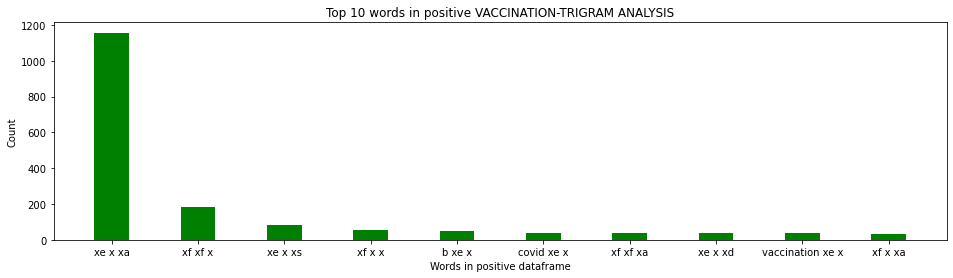

In [95]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive VACCINATION-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")

plt.show()

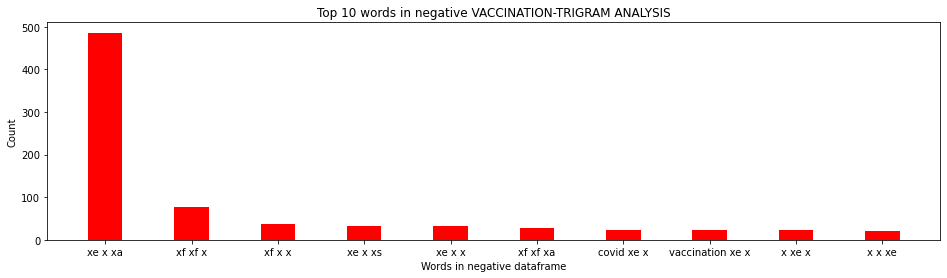

In [96]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative VACCINATION-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

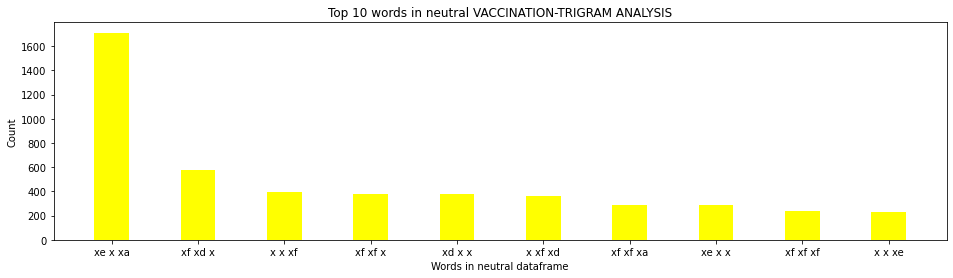

In [97]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral VACCINATION-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()